In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

In [2]:
plt.style.use('/data/user/boiger_r/aerosol/aerosol_code1/postprocessing/PLOTS_PAPER/plot_style.txt')


In [3]:
directory = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_bim_AAE/'

df = pd.read_csv(f'{directory}results_summary_all.csv')  

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'data_file', 'batch_size',
       'learning_rate', 'n_blocks', 'n_depth', 'n_width', 'weight_x',
       'weight_y',
       ...
       'MAPE%_dvar_sph_frac', 'explained_variance_dvar_sph_frac',
       'preprocessor_x', 'preprocessor_y', 'P11', 'P12', '450', '532', '630',
       'Wo0'],
      dtype='object', length=150)

In [5]:
df.iloc[0]['data_file']

'/data/user/boiger_r/aerosol/aerosol_data/raw_data_bimodal_AAE/pre_log_ts-0.2_wl-450-532-630_sc-None_qoi-ScatteringData_21_55/training_dataset.hdf5'

In [6]:
wmape_err_col = []
for col in df.columns:
    if 'wMAPE' in col:
        print(col)
        wmape_err_col.append(col)

wMAPE_qoi_P11_mean
wMAPE_qoi_P12_mean
wMAPE_qoi_P11_mean_exp
wMAPE_qoi_mean_exp
wMAPE_dvar_V
wMAPE_dvar_R_fine
wMAPE_dvar_R_coarse
wMAPE_dvar_GSD_fine
wMAPE_dvar_GSD_coarse
wMAPE_dvar_n_fine
wMAPE_dvar_n_coarse
wMAPE_dvar_k_532_fine
wMAPE_dvar_k_532_coarse
wMAPE_dvar_k_630_fine
wMAPE_dvar_k_630_coarse
wMAPE_dvar_k_450_fine
wMAPE_dvar_k_450_coarse


In [7]:
rel_err_col = []
for col in df.columns:
    if 'rel_error' in col:
        print(col)
        rel_err_col.append(col)

rel_error95%_qoi_P11_max
rel_error95%_qoi_P12_max
rel_error95%_qoi_P11_max_exp
rel_error95%_dvar_V
rel_error95%_dvar_R_fine
rel_error95%_dvar_R_coarse
rel_error95%_dvar_GSD_fine
rel_error95%_dvar_GSD_coarse
rel_error95%_dvar_n_fine
rel_error95%_dvar_n_coarse
rel_error95%_dvar_k_532_fine
rel_error95%_dvar_k_532_coarse
rel_error95%_dvar_k_630_fine
rel_error95%_dvar_k_630_coarse
rel_error95%_dvar_k_450_fine
rel_error95%_dvar_k_450_coarse
rel_error95%_dvar_AAE_fine
rel_error95%_dvar_AAE_coarse
rel_error95%_dvar_sph_frac


In [8]:
abs_err_col = []
for col in df.columns:
    if 'abs_error' in col:
        print(col)
        abs_err_col.append(col)

abs_error95%_qoi_P11_max
abs_error95%_qoi_P12_max
abs_error95%_qoi_P11_max_exp
abs_error95%_dvar_V
abs_error95%_dvar_R_fine
abs_error95%_dvar_R_coarse
abs_error95%_dvar_GSD_fine
abs_error95%_dvar_GSD_coarse
abs_error95%_dvar_n_fine
abs_error95%_dvar_n_coarse
abs_error95%_dvar_k_532_fine
abs_error95%_dvar_k_532_coarse
abs_error95%_dvar_k_630_fine
abs_error95%_dvar_k_630_coarse
abs_error95%_dvar_k_450_fine
abs_error95%_dvar_k_450_coarse
abs_error95%_dvar_AAE_fine
abs_error95%_dvar_AAE_coarse
abs_error95%_dvar_sph_frac


In [9]:
df['abs_error95%_qoi_P12_max']

0     0.03
1     0.02
2     0.02
3     0.02
4     0.01
5     0.02
6     0.02
7     0.03
8     0.00
9     0.01
10    0.00
11    0.00
12    0.00
13    0.00
14    0.00
15    0.00
16    0.01
17    0.01
18    0.01
19    0.02
20    0.02
21    0.02
Name: abs_error95%_qoi_P12_max, dtype: float64

In [10]:
df['rel_error95%_qoi_P11_max']

0     0.33
1     0.30
2     0.24
3     0.25
4     0.18
5     0.31
6     0.30
7     0.26
8     0.25
9     0.00
10    0.12
11    0.12
12    0.11
13    0.24
14    0.15
15    0.18
16    0.00
17    0.00
18    0.00
19    0.00
20    0.00
21    0.00
Name: rel_error95%_qoi_P11_max, dtype: float64

In [11]:
df['rel_error95%_qoi_P11_max_exp']

0     8.09
1     7.76
2     5.38
3     5.53
4     4.12
5     7.44
6     7.84
7     6.45
8     6.42
9     0.00
10    3.06
11    3.07
12    2.79
13    5.06
14    3.72
15    3.80
16    0.00
17    0.00
18    0.00
19    0.00
20    0.00
21    0.00
Name: rel_error95%_qoi_P11_max_exp, dtype: float64

In [12]:
df['Numbers'] = [3,3,1,1,1,2,2,2,3,3,1,1,1,2,2,2,1,1,1,2,2,2]
df['Numbers_order'] = [7,7,2,1,3,5,4,6,7,7,2,1,3,4,6,5,2,1,3,4,6,5]

In [13]:
legend_elements = [Line2D([0], [0], color='b', lw=2, label='P11'),
                   Line2D([0], [0], color='r', lw=2, label='P12'),
                   Line2D([0], [0], color='g', lw=2, label='P11, P12'),
                   Line2D([0], [0], color='brown', lw=2, label='P11, P12, all angles'),
                   Line2D([0], [0], marker = '|',color='k', lw=2, label='630',linestyle="None"),
                   Line2D([0], [0], marker = 'x',color='k', lw=2, label='532',linestyle="None"),
                   Line2D([0], [0], marker = '_',color='k', label='450',linestyle="None"),
                   Line2D([0], [0], marker = '*',color='k', label='450, 532',linestyle="None"),
                   Line2D([0], [0], marker = 's',color='k', label='450, 630',linestyle="None"),
                   Line2D([0], [0], marker = 'P',color='k', label='532, 630',linestyle="None"),
                   Line2D([0], [0], marker = 'o',color='k', label='450, 532, 630',linestyle="None"),

]

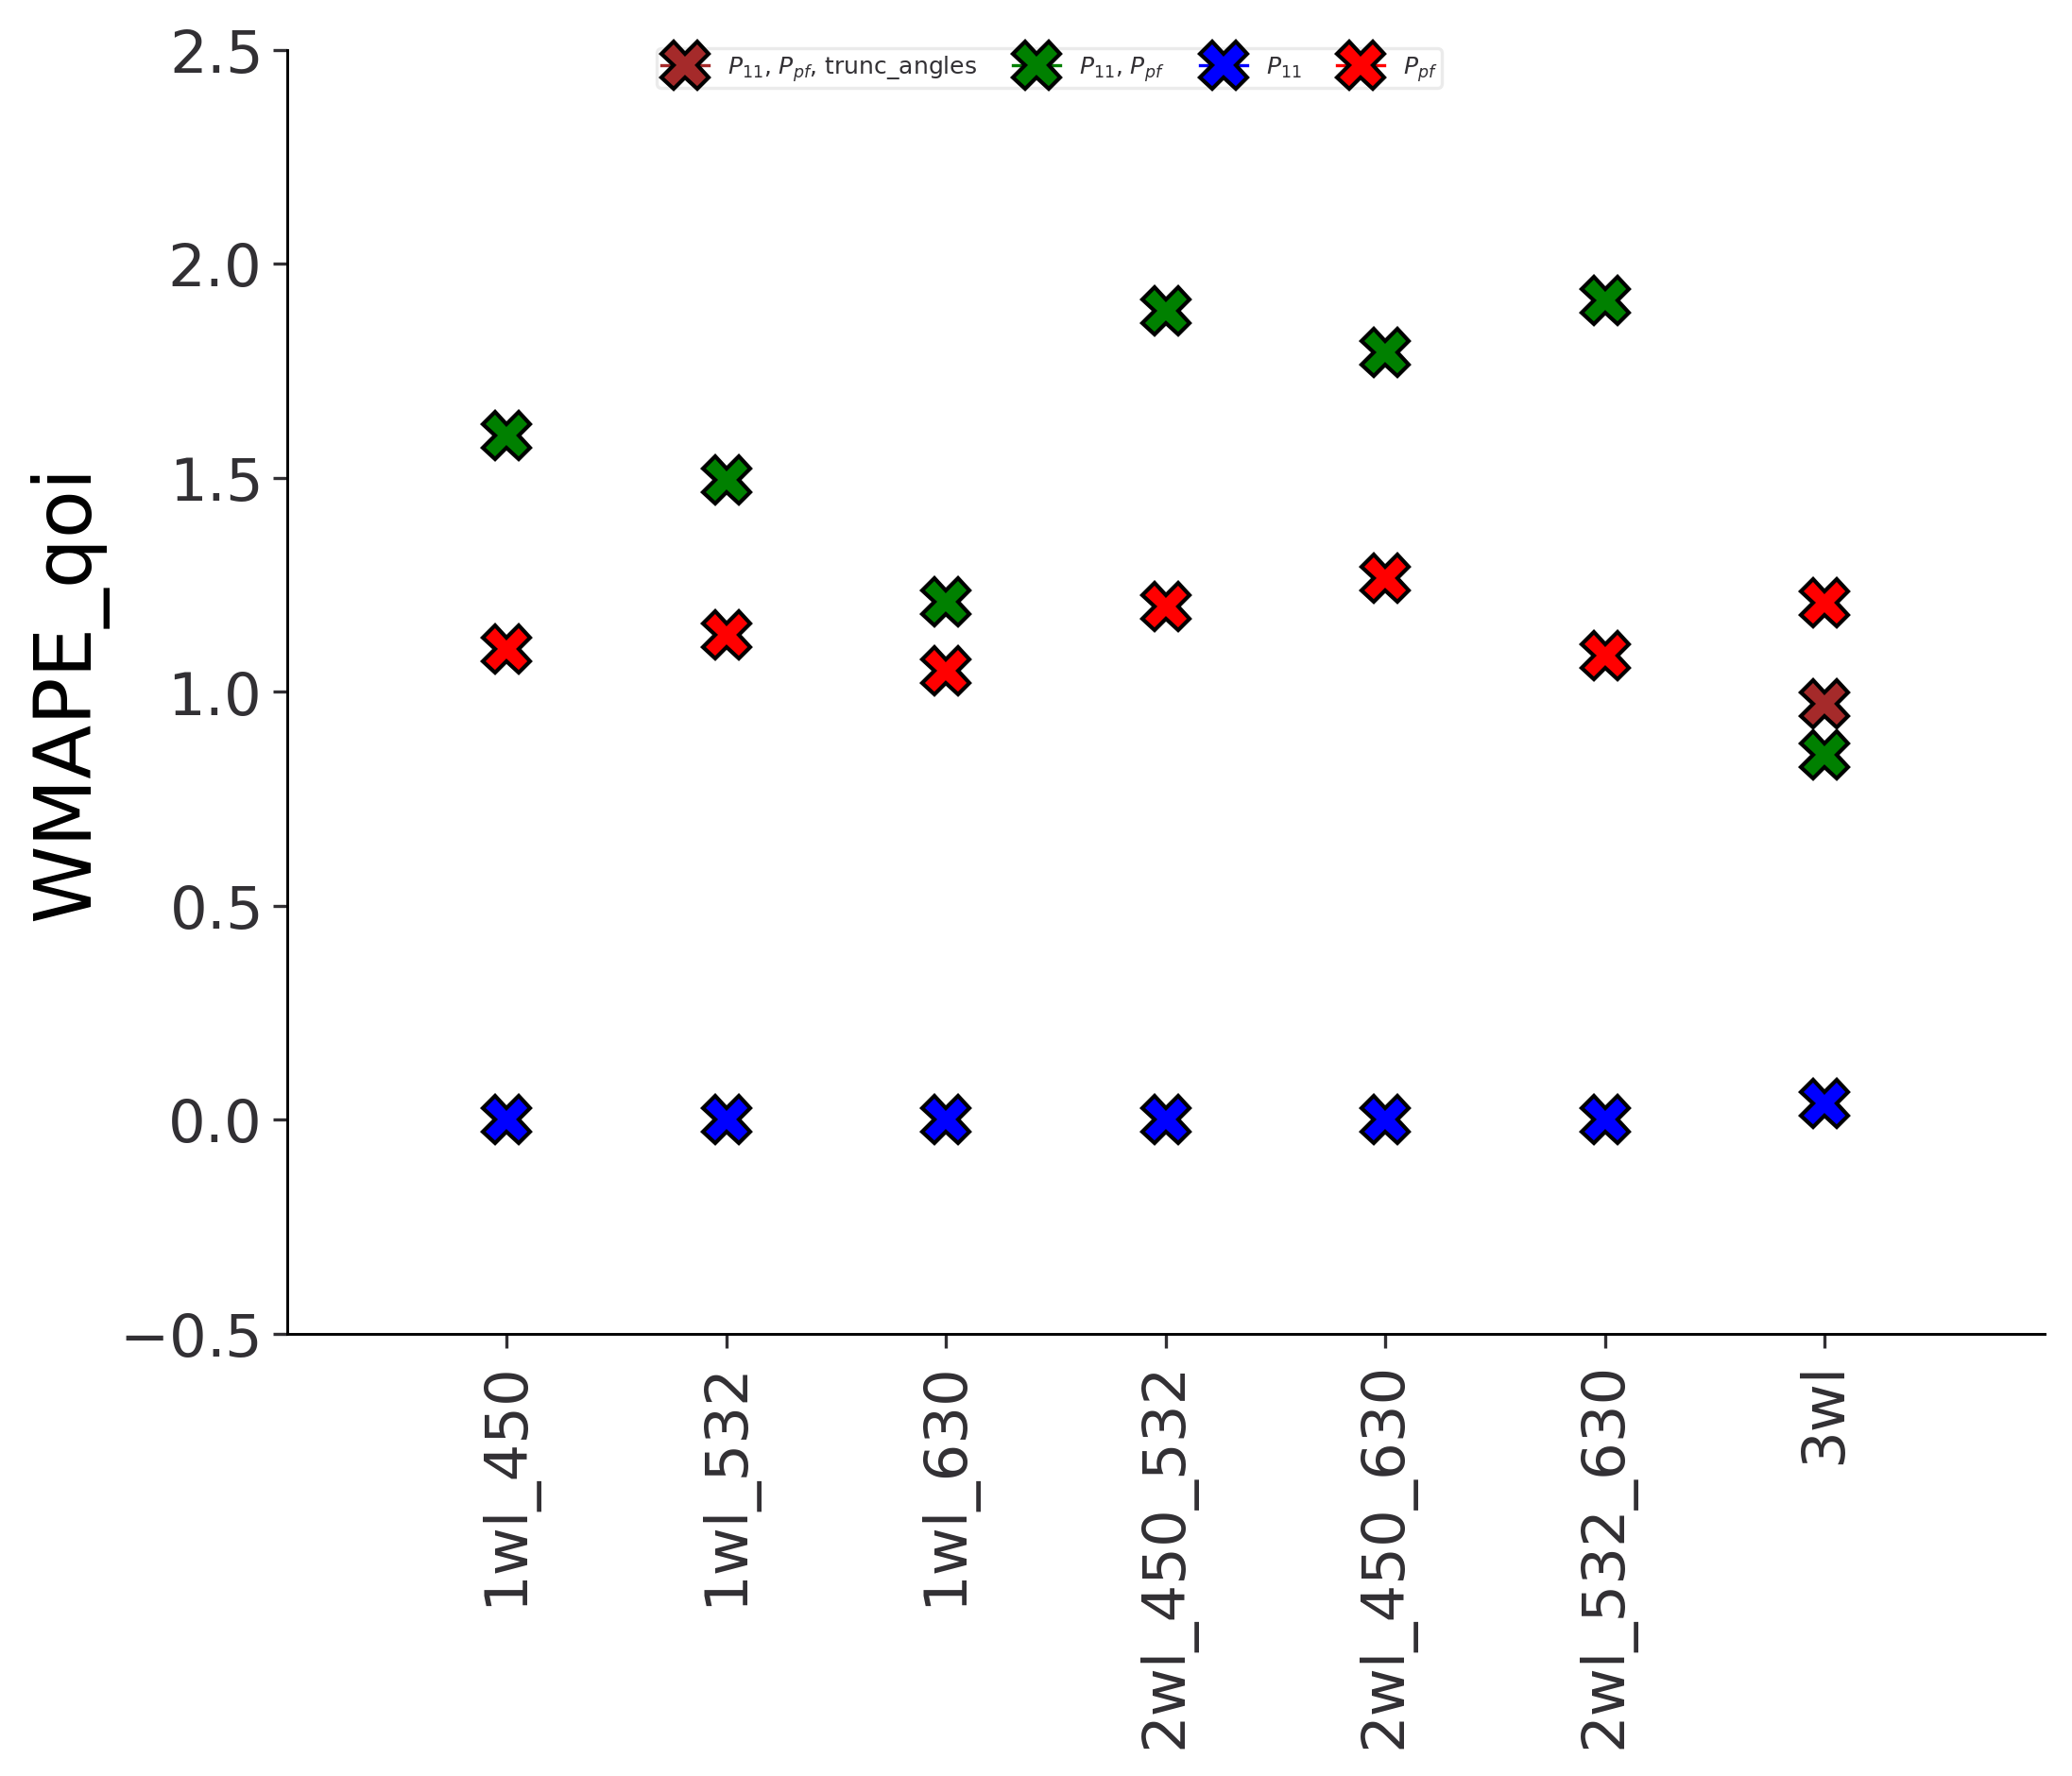

In [14]:
fig,ax = plt.subplots(figsize = (8,6))
for i in range(len(df)):
    
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
                legend1 = '$P_{11}$, $P_{pf}$, trunc_angles'
            else:
                color1 = 'green'
                legend1 = '$P_{11}$, $P_{pf}$'
        else:
            color1 = 'blue'
            legend1 = '$P_{11}$'
    else:
        color1 = 'red'
        legend1 = '$P_{pf}$'
        
    if i in [0,1,8,19]:
        plt.plot(df['Numbers_order'][i], df['wMAPE_qoi_P11_mean'][i],marker = 'X', color = color1, markersize = 12, label = legend1)
    else:
        plt.plot(df['Numbers_order'][i], df['wMAPE_qoi_P12_mean'][i],marker = 'X', color = color1, markersize = 12)
    

ax.legend(bbox_to_anchor=(0.664, 1.01),ncol=len(df.columns))
#plt.legend(['P11','P_{pf}','both'])
xlabel = ('1wl_450', '1wl_532','1wl_630','2wl_450_532','2wl_450_630','2wl_532_630', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 15,rotation='vertical')
ax.set_ylabel('WMAPE_qoi',fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=15)


In [14]:
df['r2_val_qoi_mean']

0     0.996853
1     0.997066
2     0.998016
3     0.998078
4     0.998333
5     0.996702
6     0.996479
7     0.996367
8     0.997919
9     0.996100
10    0.998629
11    0.998164
12    0.998787
13    0.997998
14    0.998276
15    0.997917
16    0.996999
17    0.997014
18    0.996944
19    0.996401
20    0.995686
21    0.995933
Name: r2_val_qoi_mean, dtype: float64

In [15]:
df

Unnamed: 0  Unnamed: 0.1  \
0            0             0   
1            0             0   
2            0             0   
3            0             0   
4            0             0   
5            0             0   
6            0             0   
7            0             0   
8            0             0   
9            0             0   
10           0             0   
11           0             0   
12           0             0   
13           0             0   
14           0             0   
15           0             0   
16           0             0   
17           0             0   
18           0             0   
19           0             0   
20           0             0   
21           0             0   

                                            data_file  batch_size  \
0   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
1   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
2   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
3   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
4   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
5   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
6   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
7   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
8   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
9   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
10  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
11  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
12  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
13  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
14  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
15  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
16  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
17  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
18  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
19  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
20  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
21  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   

    learning_rate  n_blocks  n_depth  n_width  weight_x  weight_y  ...  \
0         0.00009         3        2       92       146       350  ...   
1         0.00009         3        2       92       138       350  ...   
2         0.00009         3        2       92       142       350  ...   
3         0.00009         3        2       92       142       350  ...   
4         0.00009         3        2       92       142       350  ...   
5         0.00009         3        2       92       138       350  ...   
6         0.00009         3        2       92       146       350  ...   
7         0.00009         3        2       92       146       350  ...   
8         0.00009         3        2       92       138       350  ...   
9         0.00009         3        2       92       146       350  ...   
10        0.00009         3        2       92       138       350  ...   
11        0.00009         3        2       92       146       350  ...   
12        0.00009         3        2       92       146       350  ...   
13        0.00009         3        2       92       146       350  ...   
14        0.00009         3        2       92       142       350  ...   
15        0.00009         3        2       92       138       350  ...   
16        0.00009         3        2       92       142       350  ...   
17        0.00009         3        2       92       142       350  ...   
18        0.00009         3        2       92       142       350  ...   
19        0.00009         3        2       92       142       350  ...   
20        0.00009         3        2       92       138       350  ...   
21        0.00009         3        2       92      

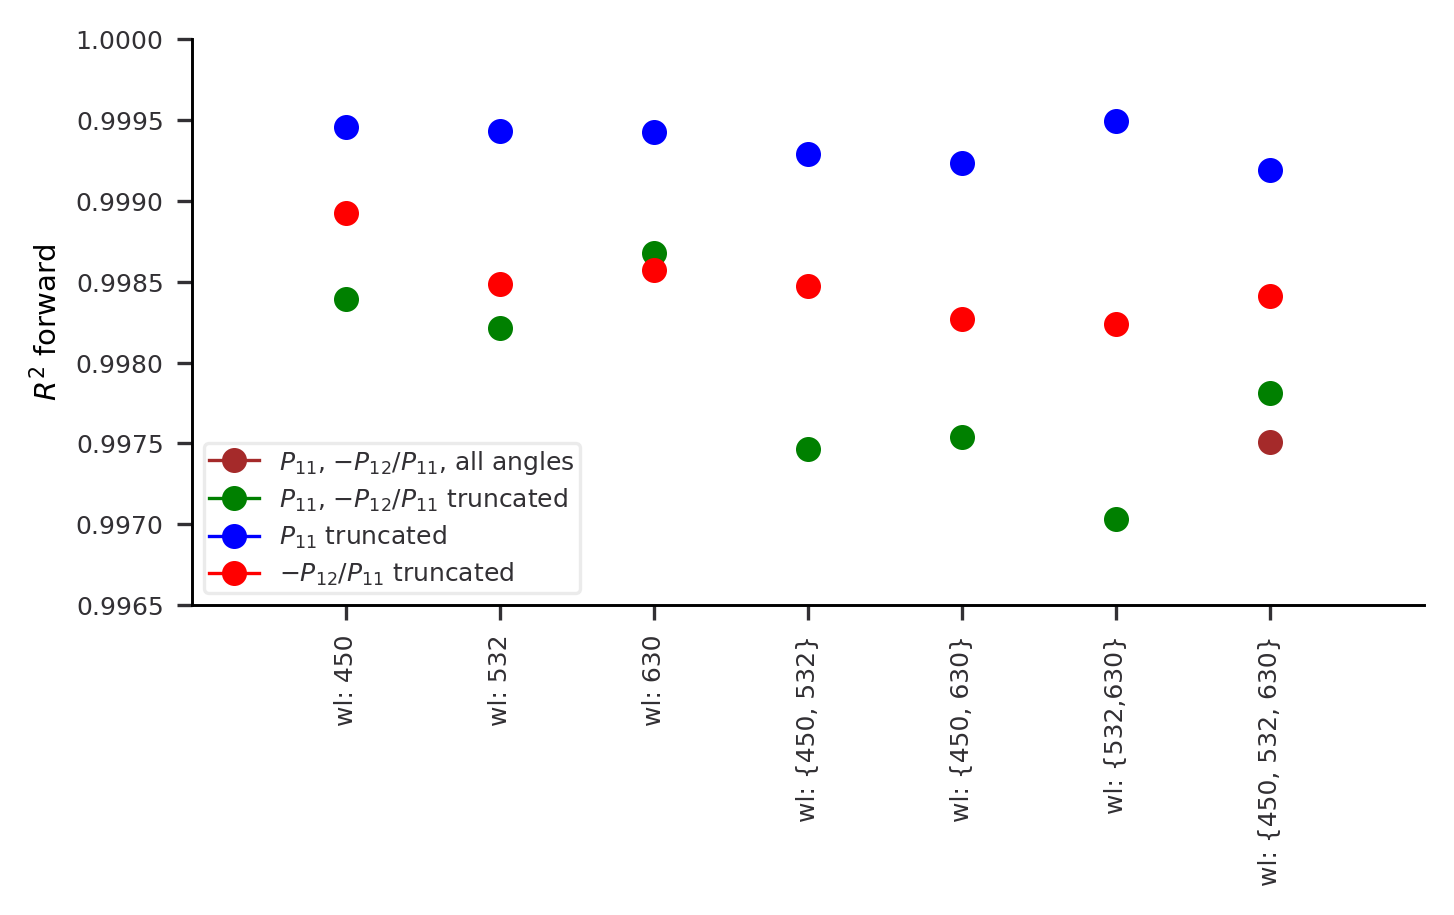

In [17]:
fig,ax = plt.subplots(figsize = (5.3,2.5))
for i in range(len(df)):
    
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
                legend1 = '$P_{11}$, $-P_{12}/P_{11}$, all angles'
            else:
                color1 = 'green'
                legend1 = '$P_{11}$, $-P_{12}/P_{11}$ truncated'
        else:
            color1 = 'blue'
            legend1 = '$P_{11}$ truncated'
    else:
        color1 = 'red'
        legend1 = '$-P_{12}/P_{11}$ truncated'
        
    if i in [0,1,8,19]:
        plt.plot(df['Numbers_order'][i], df['r2_test_qoi_mean'][i],marker = 'o', color = color1, markersize = 5,markerfacecolor =  color1, markeredgecolor =color1, label = legend1)
    else:
        plt.plot(df['Numbers_order'][i], df['r2_test_qoi_mean'][i],marker = 'o', color = color1, markersize = 5,markerfacecolor = color1, markeredgecolor= color1)
    

ax.legend(loc='lower left')
#plt.legend(['P11','P_{pf}','both'])
xlabel = ('wl: 450', 'wl: 532','wl: 630','wl: {450, 532}','wl: {450, 630}','wl: {532,630}', 'wl: {450, 532, 630}')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, rotation='vertical')
ax.set_ylabel('$R^2$ forward')
ax.tick_params(axis='both', which='major')
fig.savefig(f'{directory}/r2_test_qoi_bim_AAE.jpg',bbox_inches='tight')

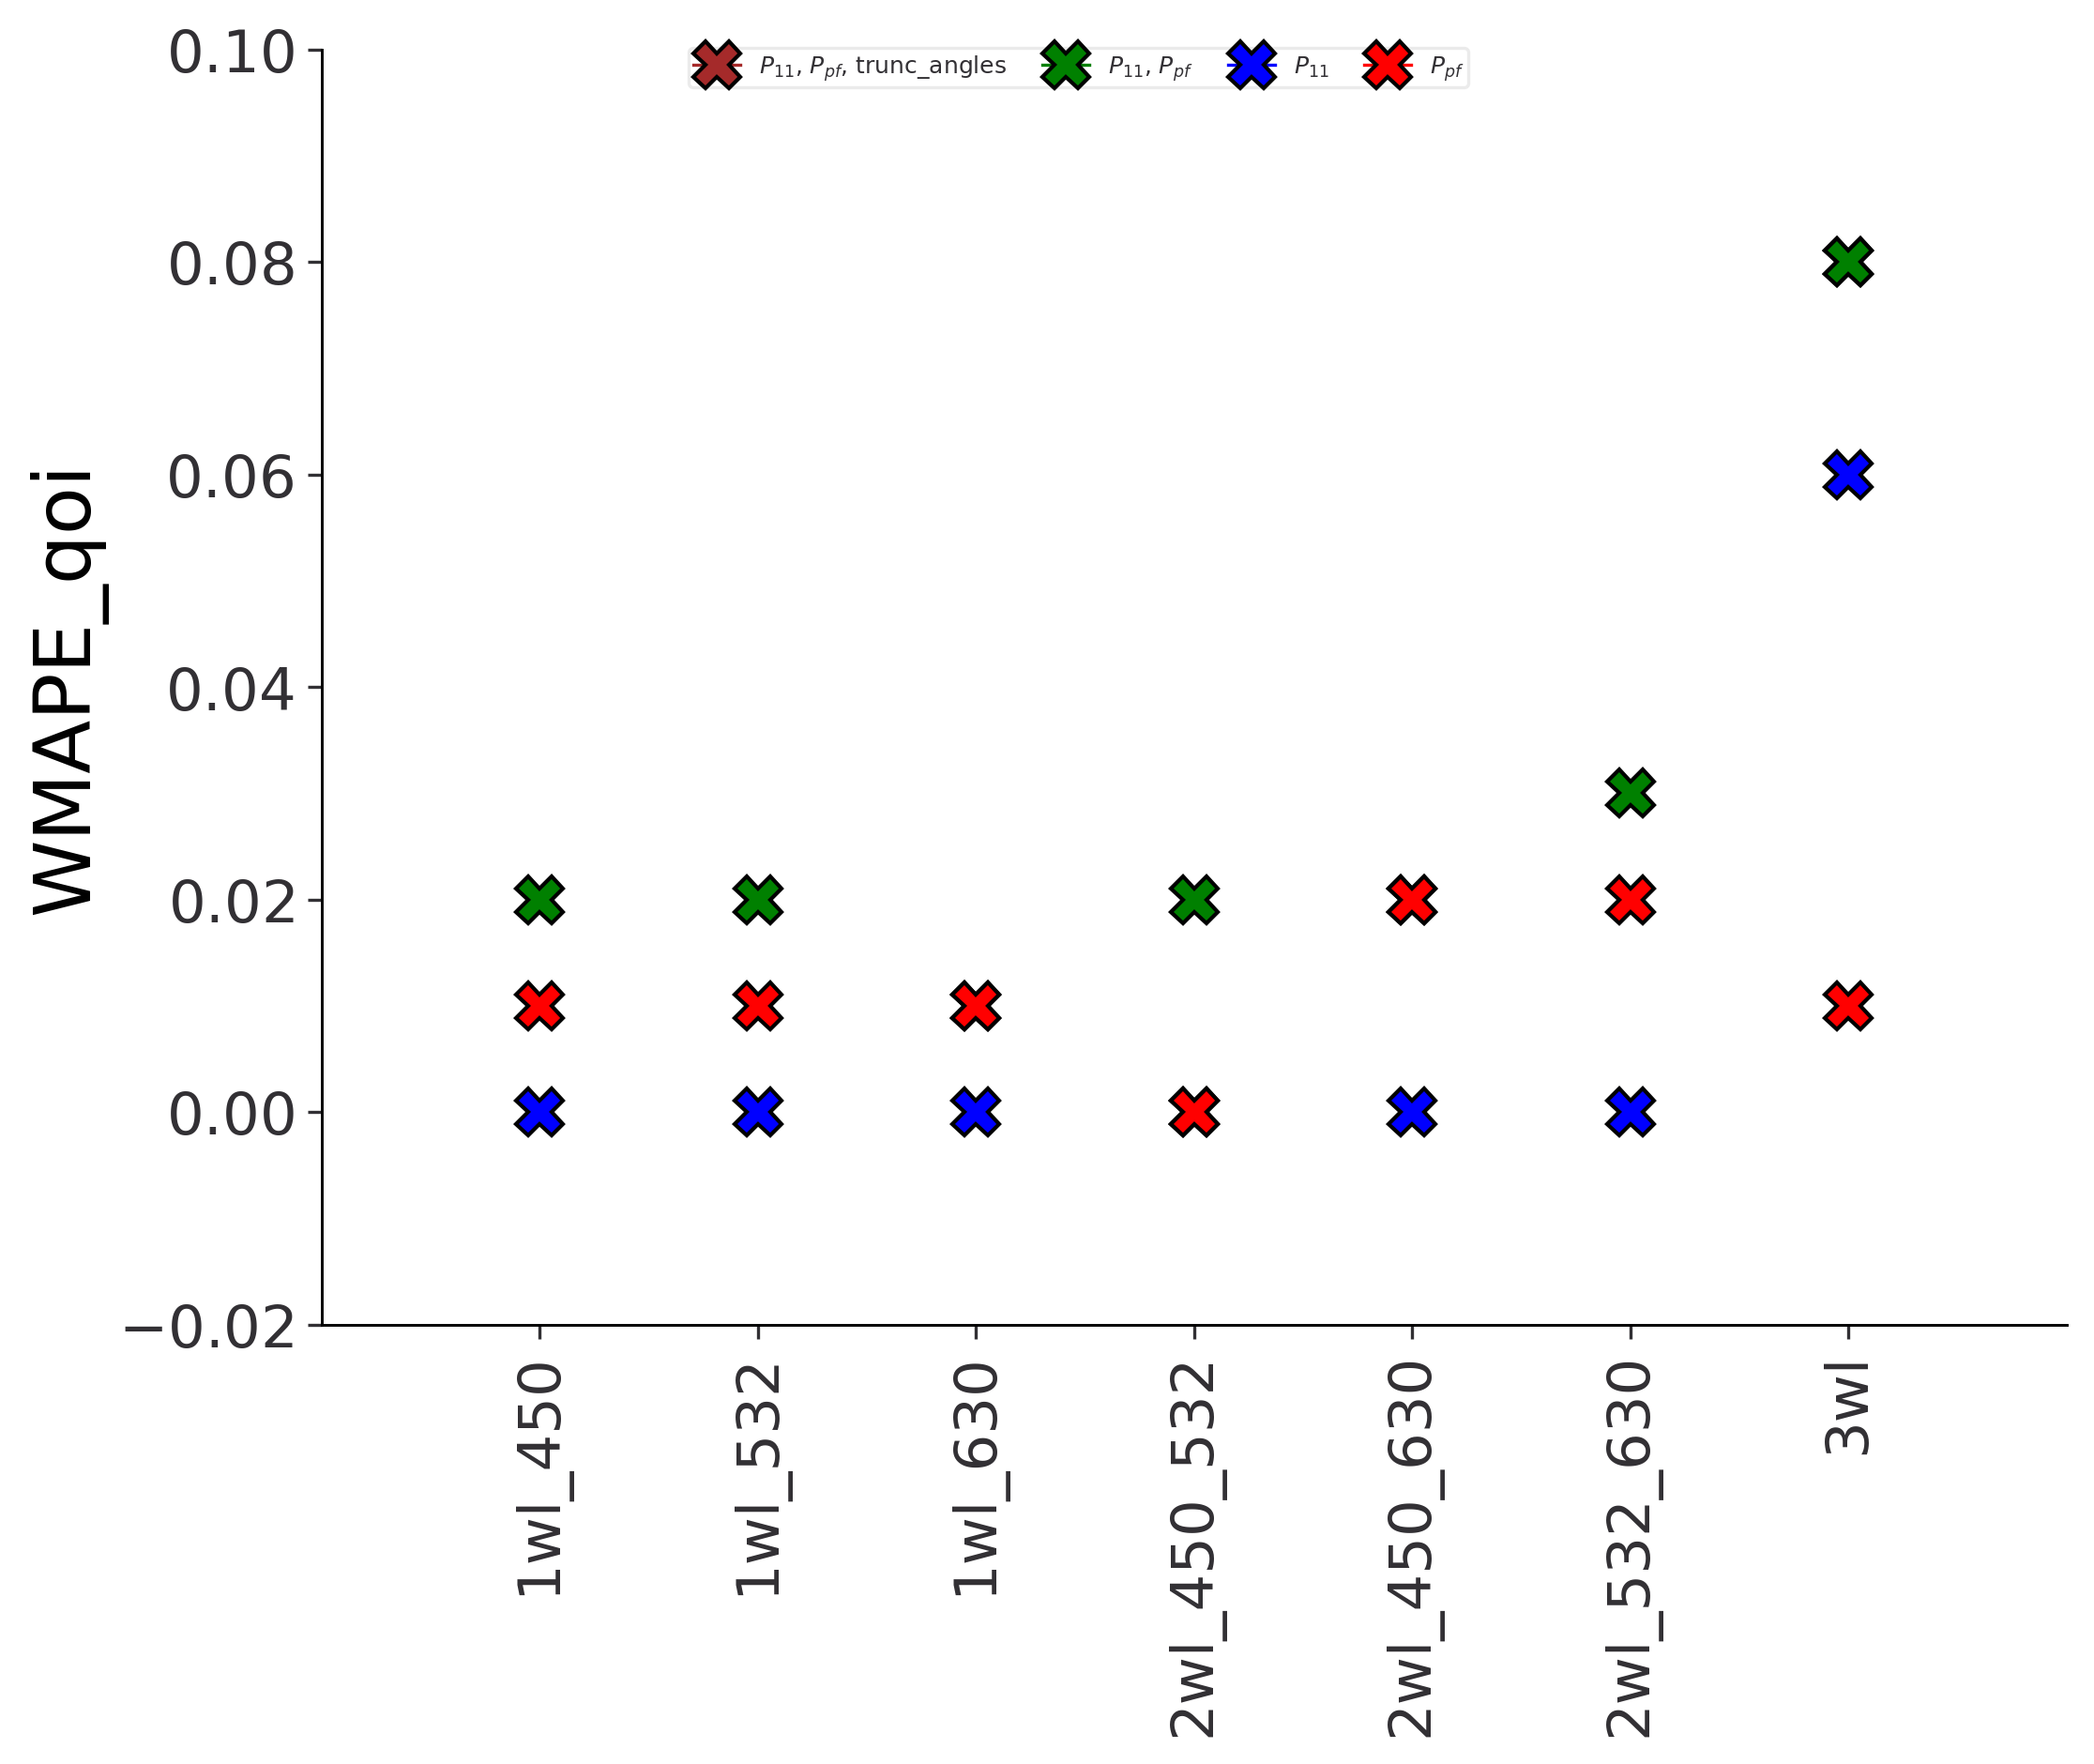

In [18]:
fig,ax = plt.subplots(figsize = (8,6))
for i in range(len(df)):
    
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
                legend1 = '$P_{11}$, $P_{pf}$, trunc_angles'
            else:
                color1 = 'green'
                legend1 = '$P_{11}$, $P_{pf}$'
        else:
            color1 = 'blue'
            legend1 = '$P_{11}$'
    else:
        color1 = 'red'
        legend1 = '$P_{pf}$'
        
    if i in [0,1,8,19]:
        plt.plot(df['Numbers_order'][i], df['abs_error95%_qoi_P11_max'][i],marker = 'X', color = color1, markersize = 12, label = legend1)
    else:
        plt.plot(df['Numbers_order'][i], df['abs_error95%_qoi_P12_max'][i],marker = 'X', color = color1, markersize = 12)
    

ax.legend(bbox_to_anchor=(0.664, 1.01),ncol=len(df.columns))
#plt.legend(['P11','P_{pf}','both'])
xlabel = ('1wl_450', '1wl_532','1wl_630','2wl_450_532','2wl_450_630','2wl_532_630', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 15,rotation='vertical')
ax.set_ylabel('WMAPE_qoi',fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=15)


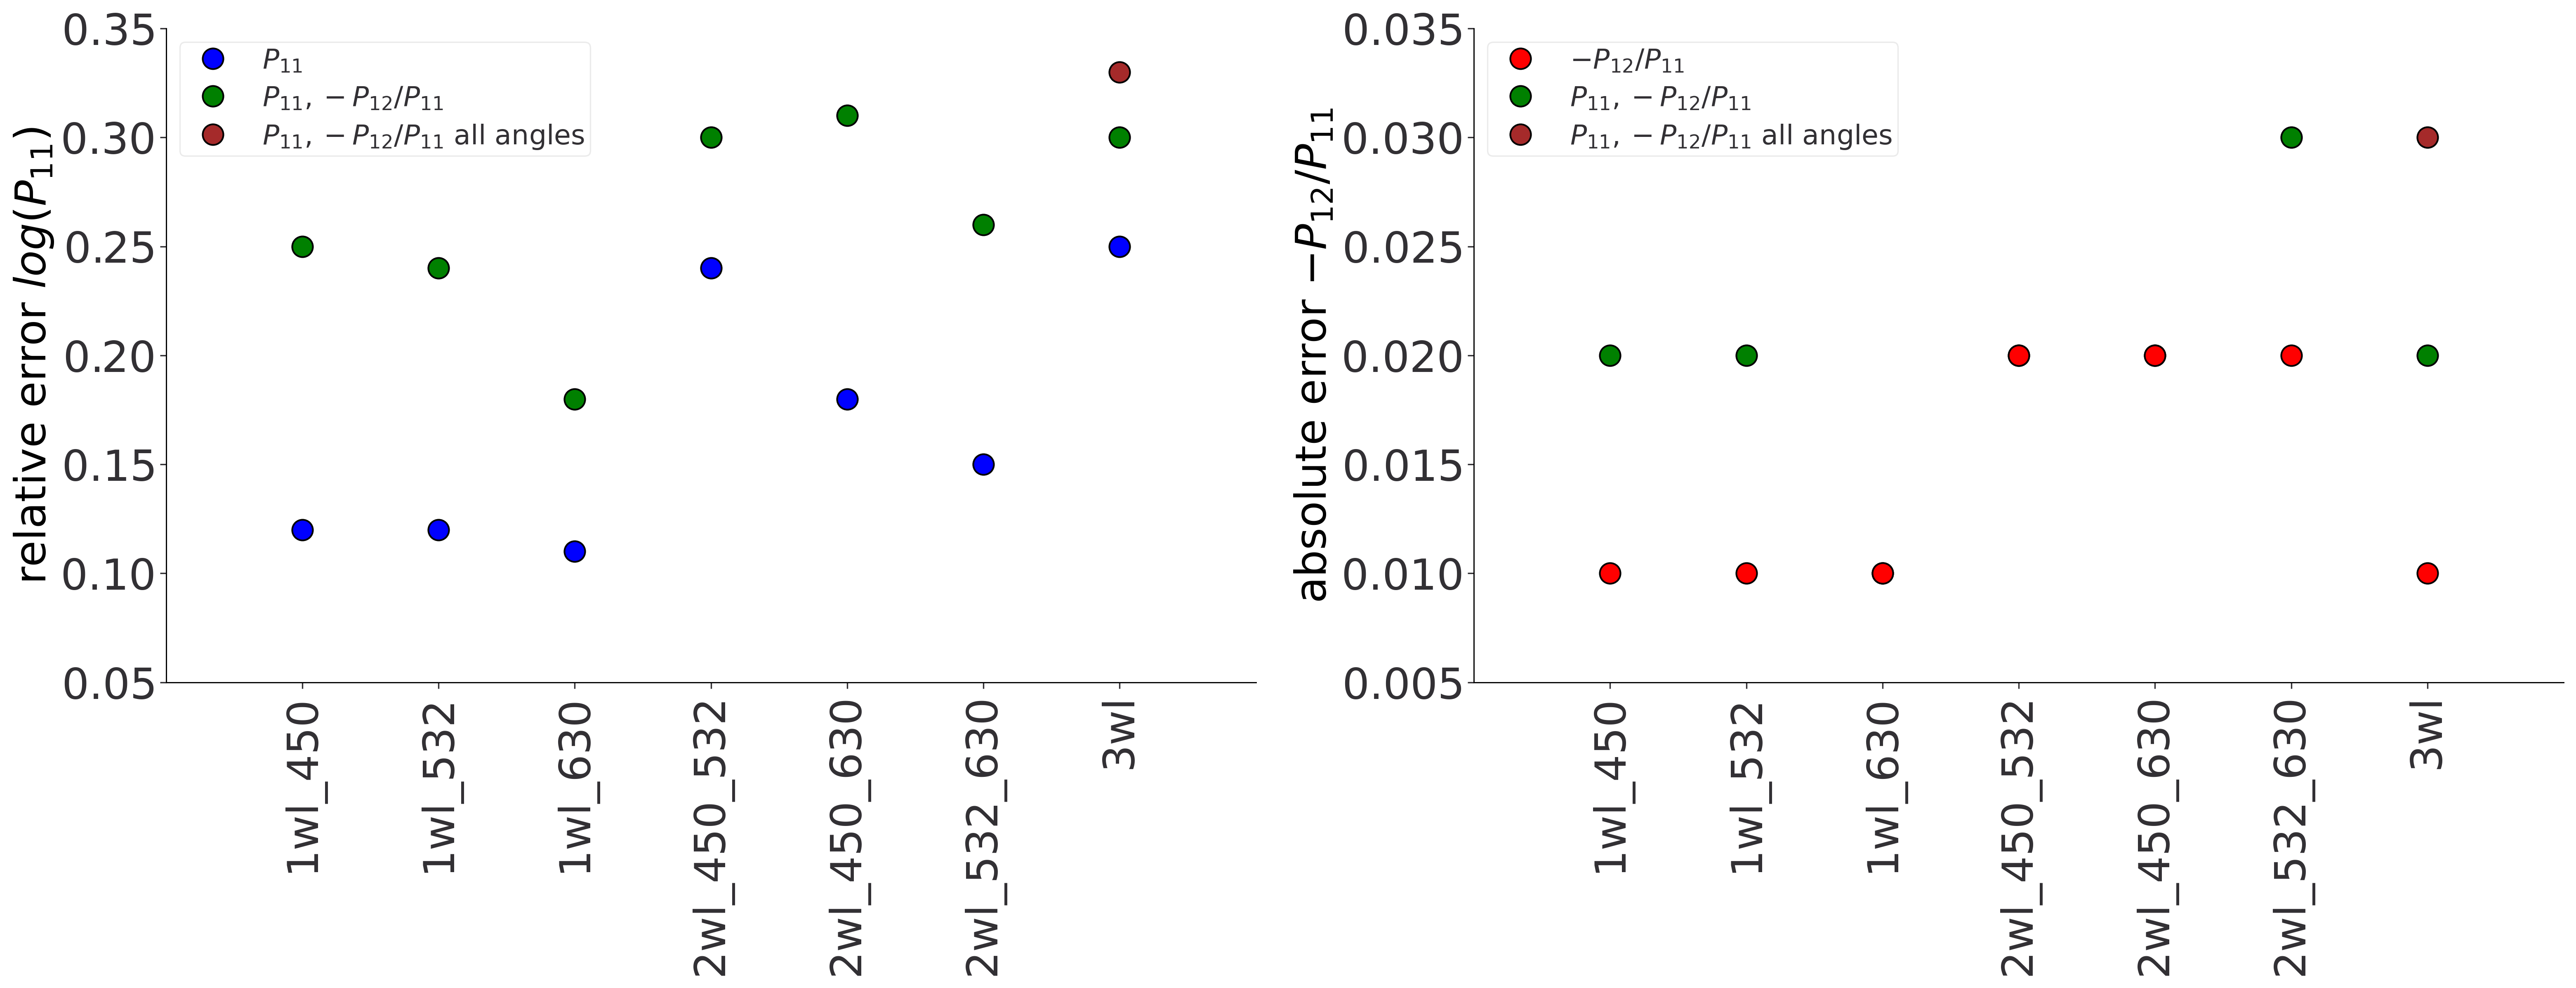

In [19]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (25,7))
for i in range(len(df)):
    
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
                legend1 = '$P_{11}$, $P_{pf}$, trunc_angles'
            else:
                color1 = 'green'
                legend1 = '$P_{11}$, $P_{pf}$'
        else:
            color1 = 'blue'
            legend1 = '$P_{11}$'
    else:
        color1 = 'red'
        legend1 = '$P_{pf}$'
        
    #if i in [0,1,8,19]:
    if df['rel_error95%_qoi_P11_max'][i] != 0:
        ax1.plot(df['Numbers_order'][i], df['rel_error95%_qoi_P11_max'][i],marker = 'o', color = color1, markersize = 12, label = legend1)
    if df['abs_error95%_qoi_P12_max'][i] != 0:
        ax2.plot(df['Numbers_order'][i], df['abs_error95%_qoi_P12_max'][i],marker = 'o', color = color1, markersize = 12)
    

ax.legend(bbox_to_anchor=(0.664, 1.01),ncol=len(df.columns))
#plt.legend(['P11','P_{pf}','both'])
xlabel = ('1wl_450', '1wl_532','1wl_630','2wl_450_532','2wl_450_630','2wl_532_630', '3wl')
x_pos = np.arange(len(xlabel))+1
ax1.set_xticks(x_pos)
ax1.set_xticklabels(xlabel, fontsize = 25,rotation='vertical')
ax1.set_ylabel('relative error $log(P_{11})$',fontsize = 25)
ax1.tick_params(axis='both', which='major', labelsize=25)
line1 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="blue", markersize = 12)
line3 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='green',  markersize = 12)
line4 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="brown",  markersize = 12)
ax1.legend((line1,line3,line4),('$P_{11}$', '$P_{11}, -P_{12}/P_{11}$', '$P_{11}, -P_{12}/P_{11}$ all angles'),fontsize = 16, loc = 'upper left')



xlabel = ('1wl_450', '1wl_532','1wl_630','2wl_450_532','2wl_450_630','2wl_532_630', '3wl')
x_pos = np.arange(len(xlabel))+1
ax2.set_xticks(x_pos)
ax2.set_xticklabels(xlabel, fontsize = 25,rotation='vertical')
ax2.set_ylabel('absolute error $-P_{12}/P_{11}$',fontsize = 25)
ax2.tick_params(axis='both', which='major', labelsize=25)


line1 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red", markersize = 12)
line3 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='green',  markersize = 12)
line4 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="brown",  markersize = 12)
ax2.legend((line1,line3,line4),('$-P_{12}/P_{11}$', '$P_{11}, -P_{12}/P_{11}$', '$P_{11}, -P_{12}/P_{11}$ all angles'),fontsize = 16, loc = 'upper left')
fig.savefig(f'{directory}/rel_abs_error_bim_AAE.jpg',bbox_inches='tight')

In [18]:
abs_err_col.remove('abs_error95%_qoi_P11_max')
abs_err_col.remove('abs_error95%_qoi_P12_max')
abs_err_col.remove('abs_error95%_qoi_P11_max_exp')

In [19]:
abs_err_col.remove('abs_error95%_dvar_AAE_fine')
abs_err_col.remove('abs_error95%_dvar_AAE_coarse')

In [20]:
abs_err_col

['abs_error95%_dvar_V',
 'abs_error95%_dvar_R_fine',
 'abs_error95%_dvar_R_coarse',
 'abs_error95%_dvar_GSD_fine',
 'abs_error95%_dvar_GSD_coarse',
 'abs_error95%_dvar_n_fine',
 'abs_error95%_dvar_n_coarse',
 'abs_error95%_dvar_k_532_fine',
 'abs_error95%_dvar_k_532_coarse',
 'abs_error95%_dvar_k_630_fine',
 'abs_error95%_dvar_k_630_coarse',
 'abs_error95%_dvar_k_450_fine',
 'abs_error95%_dvar_k_450_coarse',
 'abs_error95%_dvar_sph_frac']

abs_error95%_dvar_V
abs_error95%_dvar_R_fine
abs_error95%_dvar_R_coarse
abs_error95%_dvar_GSD_fine
abs_error95%_dvar_GSD_coarse
abs_error95%_dvar_n_fine
abs_error95%_dvar_n_coarse
abs_error95%_dvar_k_532_fine
abs_error95%_dvar_k_532_coarse
abs_error95%_dvar_k_630_fine
abs_error95%_dvar_k_630_coarse
abs_error95%_dvar_k_450_fine
abs_error95%_dvar_k_450_coarse
abs_error95%_dvar_sph_frac


<ipython-input-21-a2cc7025814b>:178: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


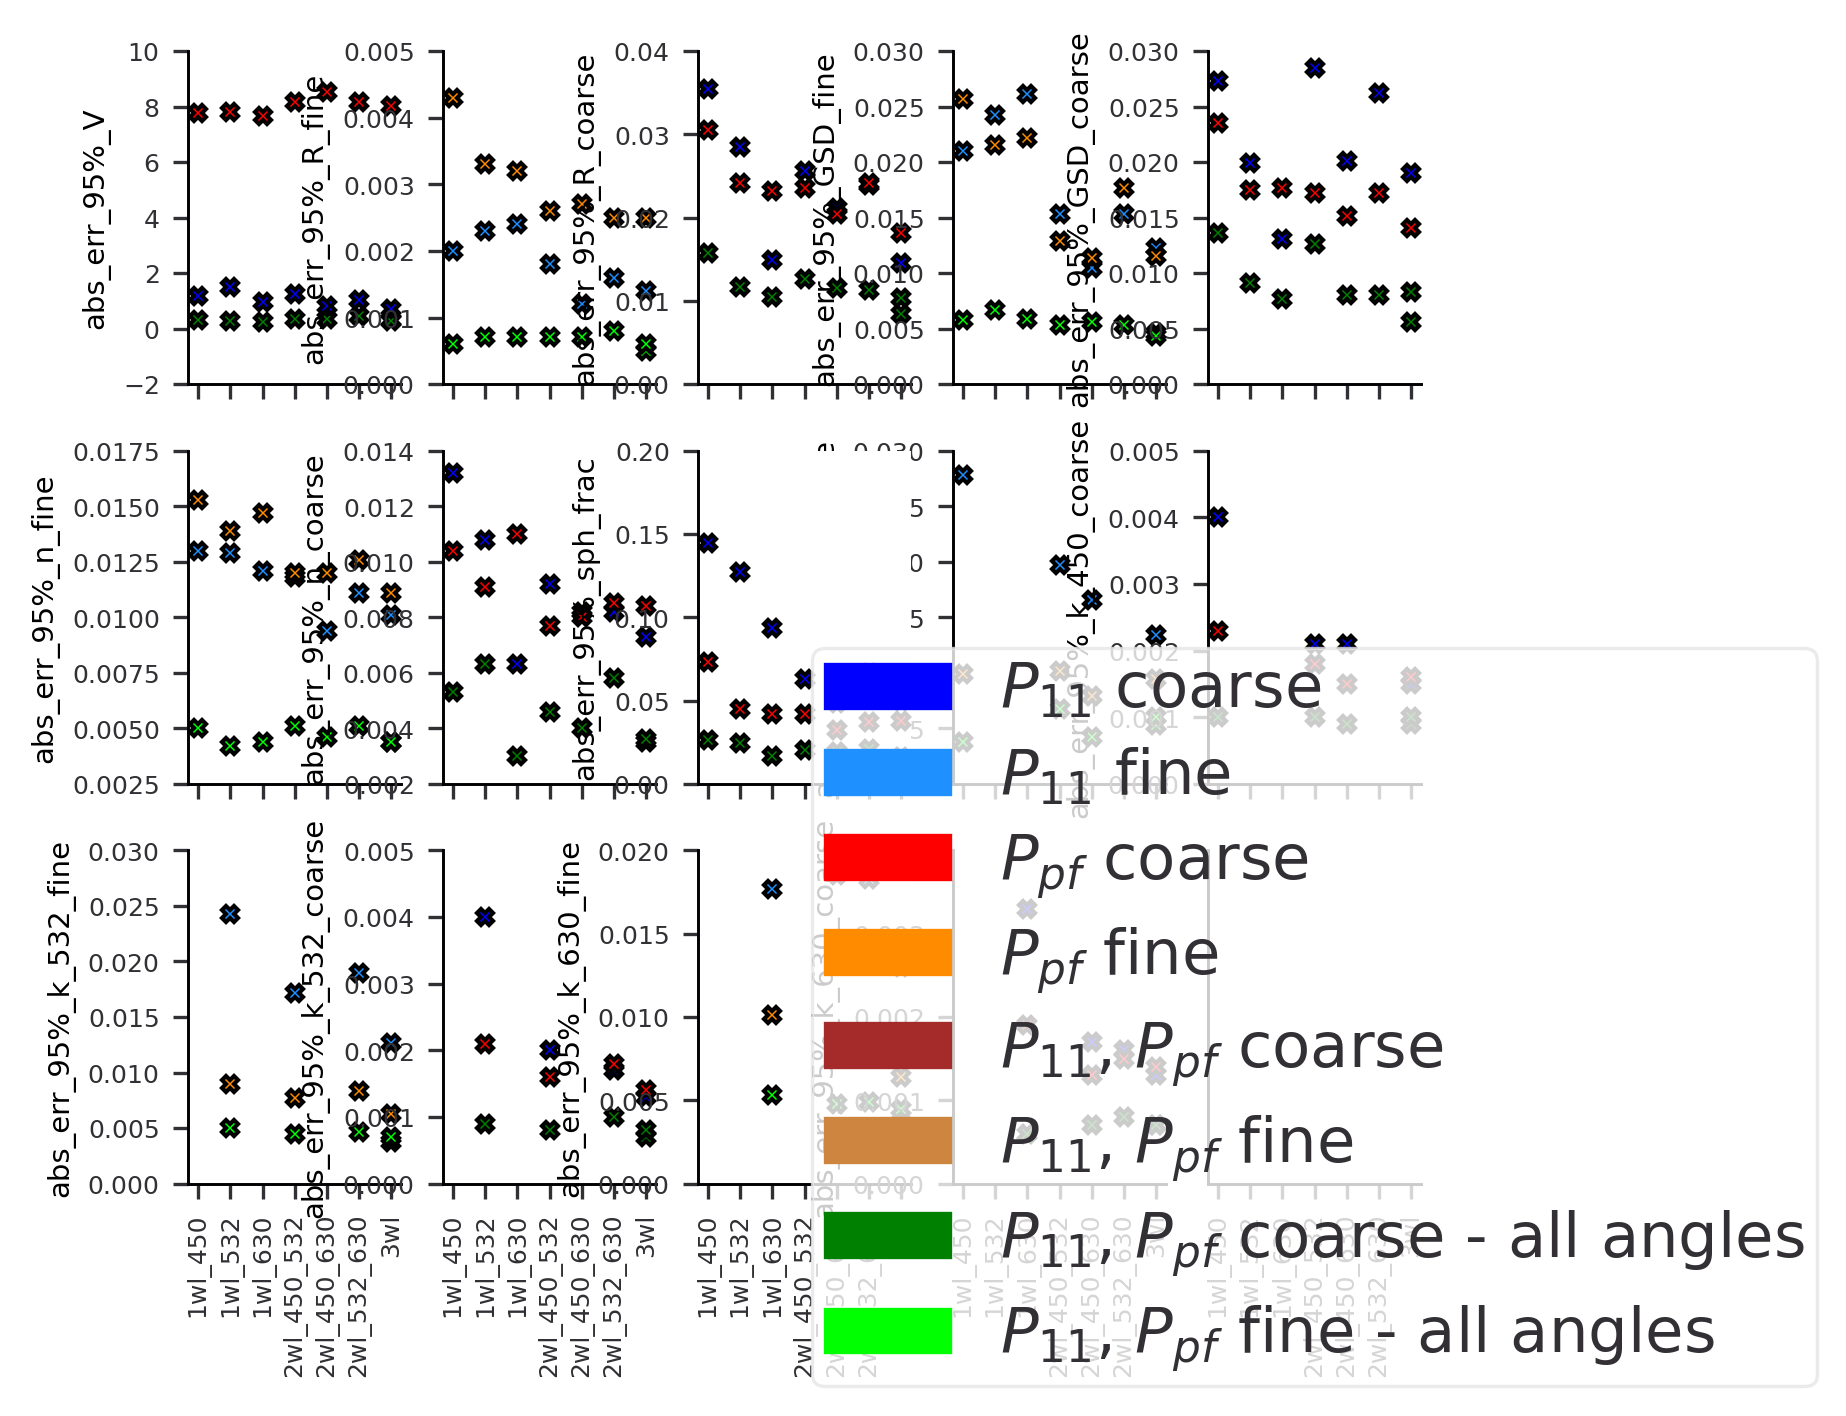

In [21]:
fig,ax = plt.subplots(3,5,figsize = (5.3,5),sharex=True)
subplot_nr = 1
axeslist = []
j = 0
for col in abs_err_col:
    print(col)
    
    if 'V' in col:
        subplot_nr = 1
        ylabel1 = 'abs_err_95%_V'
    elif 'R_fine' in col:
        subplot_nr = 2
        ylabel1 = 'abs_err_95%_R_fine'
    elif 'R_coarse' in col:
        subplot_nr = 3
        ylabel1 = 'abs_err_95%_R_coarse'        
    elif 'GSD_fine' in col:
        subplot_nr = 4
        ylabel1 = 'abs_err_95%_GSD_fine'
    elif 'GSD_coarse' in col:
        subplot_nr = 5
        ylabel1 = 'abs_err_95%_GSD_coarse'
    elif '_n_fine' in col:
        subplot_nr = 6
        ylabel1 = 'abs_err_95%_n_fine'
    elif '_n_coarse' in col:
        subplot_nr = 7
        ylabel1 = 'abs_err_95%_n_coarse'
    elif 'sph_frac' in col:
        subplot_nr = 8
        ylabel1 = 'abs_err_95%_sph_frac'  
    elif '_k_450_fine' in col:
        subplot_nr = 9
        ylabel1 = 'abs_err_95%_k_450_fine'
    elif '_k_450_coarse' in col:
        subplot_nr = 10
        ylabel1 = 'abs_err_95%_k_450_coarse'
    elif '_k_532_fine' in col:
        subplot_nr = 11
        ylabel1 = 'abs_err_95%_k_532_fine'
    elif '_k_532_coarse' in col:
        subplot_nr = 12
        ylabel1 = 'abs_err_95%_k_532_coarse'
    elif '_k_630_fine' in col:
        subplot_nr = 13
        ylabel1 = 'abs_err_95%_k_630_fine'
    elif '_k_630_coarse' in col:
        subplot_nr = 14
        ylabel1 = 'abs_err_95%_k_630_coarse'
        
    xlabel = ('1wl_450', '1wl_532','1wl_630','2wl_450_532','2wl_450_630','2wl_532_630', '3wl')
    x_pos = np.arange(len(xlabel))+1
        
    if subplot_nr in [1,6]:
        ax1 = plt.subplot(3,5,subplot_nr)
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels(xlabel, rotation='vertical')
        ax1.set_ylabel(ylabel1)
        ax1.tick_params(axis='both', which='major')
    elif subplot_nr in [2,7]:
        ax2 = plt.subplot(3,5,subplot_nr)
        plt.setp(ax2.get_xticklabels(), visible=False)
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(xlabel, rotation='vertical')
        ax2.set_ylabel(ylabel1)
        ax2.tick_params(axis='both', which='major')
    elif subplot_nr in [3,8]:
        ax3 = plt.subplot(3,5,subplot_nr)
        plt.setp(ax3.get_xticklabels(), visible=False)
        ax3.set_xticks(x_pos)
        ax3.set_xticklabels(xlabel, rotation='vertical')
        ax3.set_ylabel(ylabel1)
        ax3.tick_params(axis='both', which='major')        
    elif subplot_nr in [4,9]:
        ax4 = plt.subplot(3,5,subplot_nr)
        plt.setp(ax4.get_xticklabels(), visible=False)
        ax4.set_xticks(x_pos)
        ax4.set_xticklabels(xlabel, rotation='vertical')
        ax4.set_ylabel(ylabel1)
        ax4.tick_params(axis='both', which='major')
    elif subplot_nr in [5,10]:
        ax5 = plt.subplot(3,5,subplot_nr)
        plt.setp(ax5.get_xticklabels(), visible=False)
        ax5.set_xticks(x_pos)
        ax5.set_xticklabels(xlabel, rotation='vertical')
        ax5.set_ylabel(ylabel1)
        ax5.tick_params(axis='both', which='major')
    elif subplot_nr ==11:
        ax6 = plt.subplot(3,5,subplot_nr,sharex=ax1)
        ax6.set_xticks(x_pos)
        ax6.set_xticklabels(xlabel, rotation='vertical')
        ax6.set_ylabel(ylabel1)
        ax6.tick_params(axis='both', which='major')
    elif subplot_nr ==12:
        ax7 = plt.subplot(3,5,subplot_nr,sharex=ax2)
        ax7.set_xticks(x_pos)
        ax7.set_xticklabels(xlabel, rotation='vertical')
        ax7.set_ylabel(ylabel1)
        ax7.tick_params(axis='both', which='major')
    elif subplot_nr ==13:
        ax8 = plt.subplot(3,5,subplot_nr,sharex=ax3)
        ax8.set_xticks(x_pos)
        ax8.set_xticklabels(xlabel, rotation='vertical')
        ax8.set_ylabel(ylabel1)
        ax8.tick_params(axis='both', which='major')
    elif subplot_nr ==14:
        ax9 = plt.subplot(3,5,subplot_nr,sharex=ax4)
        ax9.set_xticks(x_pos)
        ax9.set_xticklabels(xlabel, rotation='vertical')
        ax9.set_ylabel(ylabel1)
        ax9.tick_params(axis='both', which='major')
    elif subplot_nr ==15:
        ax10 = plt.subplot(3,5,subplot_nr,sharex=ax5)
        ax10.set_xticks(x_pos)
        ax10.set_xticklabels(xlabel, rotation='vertical')
        ax10.set_ylabel(ylabel1)
        ax10.tick_params(axis='both', which='major')

    j = j+1
    for i in range(len(df)):
        
        if df['P11'][i] == 'x':
            if df['P12'][i] == 'x':
                if df['Wo0'][i] =='X':
                    if 'fine' in col:
                        color1 = 'peru'
                    else:
                        color1 = 'brown'
                        legend1 = '$P_{11}$, $P_{pf}$, trunc_angles'
                else:
                    if 'fine' in col:
                        color1 = 'lime'
                    else:
                        color1 = 'green'
                    legend1 = '$P_{11}$, $P_{pf}$'
            else:
                if 'fine' in col:
                    color1 = 'dodgerblue'
                else:
                    color1 = 'blue'
                legend1 = '$P_{11}$'
        else:
            if 'fine' in col:
                color1 = 'darkorange'
            else:
                color1 = 'red'
            legend1 = '$P_{pf}$'

       # if i in [0,1,8,19]:
       #     if df[col][i]>0:
       #         plt.plot(df['Numbers_order'][i], df[col][i],marker = 'X', color = color1, markersize = 12, label = legend1)
        if df[col][i]> 0:
            plt.plot(df['Numbers_order'][i], df[col][i],marker = 'X', color = color1, markersize = 4)

  #  if subplot_nr == 1:
  #      ax1.legend(loc = 'upper right',ncol=len(df.columns))
    #plt.legend(['P11','P_{pf}','both'])

    
#ax1 = plt.subplot(3,5,15)  
#ax1.set_axis_off()
ax10 = plt.subplot(3,5,15,sharex=ax5)
ax10.set_xticks(x_pos)
ax10.set_xticklabels(xlabel, rotation='vertical')
ax10.set_ylabel(ylabel1)
ax10.tick_params(axis='both', which='major')
ax10.get_yaxis().set_visible(False)
red_patch = mpatches.Patch(color = 'red', label ='$P_{pf}$ coarse')
orange_patch = mpatches.Patch(color = 'darkorange', label ='$P_{pf}$ fine')
green_patch = mpatches.Patch(color = 'green',label = '$P_{11}$, $P_{pf}$ coarse - all angles')
lime_patch = mpatches.Patch(color = 'lime',label = '$P_{11}$, $P_{pf}$ fine - all angles')
blue_patch = mpatches.Patch(color = 'blue', label ='$P_{11}$ coarse')
dodgerblue_patch = mpatches.Patch(color = 'dodgerblue',label = '$P_{11}$ fine')
brown_patch = mpatches.Patch(color = 'brown', label ='$P_{11}$, $P_{pf}$ coarse')
peru_patch = mpatches.Patch(color = 'peru',label = '$P_{11}$, $P_{pf}$ fine')
plt.legend(handles = [blue_patch, dodgerblue_patch, red_patch,orange_patch,brown_patch, peru_patch, green_patch, lime_patch], fontsize = 15, loc = 'center')
fig.tight_layout()
fig.savefig(f'{directory}/comparison_abs_error_bim_AAE.jpg')

In [22]:
fontsize1 = 25
fontsize2 = 20

abs_error95%_dvar_V
abs_error95%_dvar_R_fine
abs_error95%_dvar_R_coarse
abs_error95%_dvar_GSD_fine
abs_error95%_dvar_GSD_coarse
abs_error95%_dvar_n_fine
abs_error95%_dvar_n_coarse
abs_error95%_dvar_k_532_fine
abs_error95%_dvar_k_532_coarse
abs_error95%_dvar_k_630_fine
abs_error95%_dvar_k_630_coarse
abs_error95%_dvar_k_450_fine
abs_error95%_dvar_k_450_coarse
abs_error95%_dvar_sph_frac


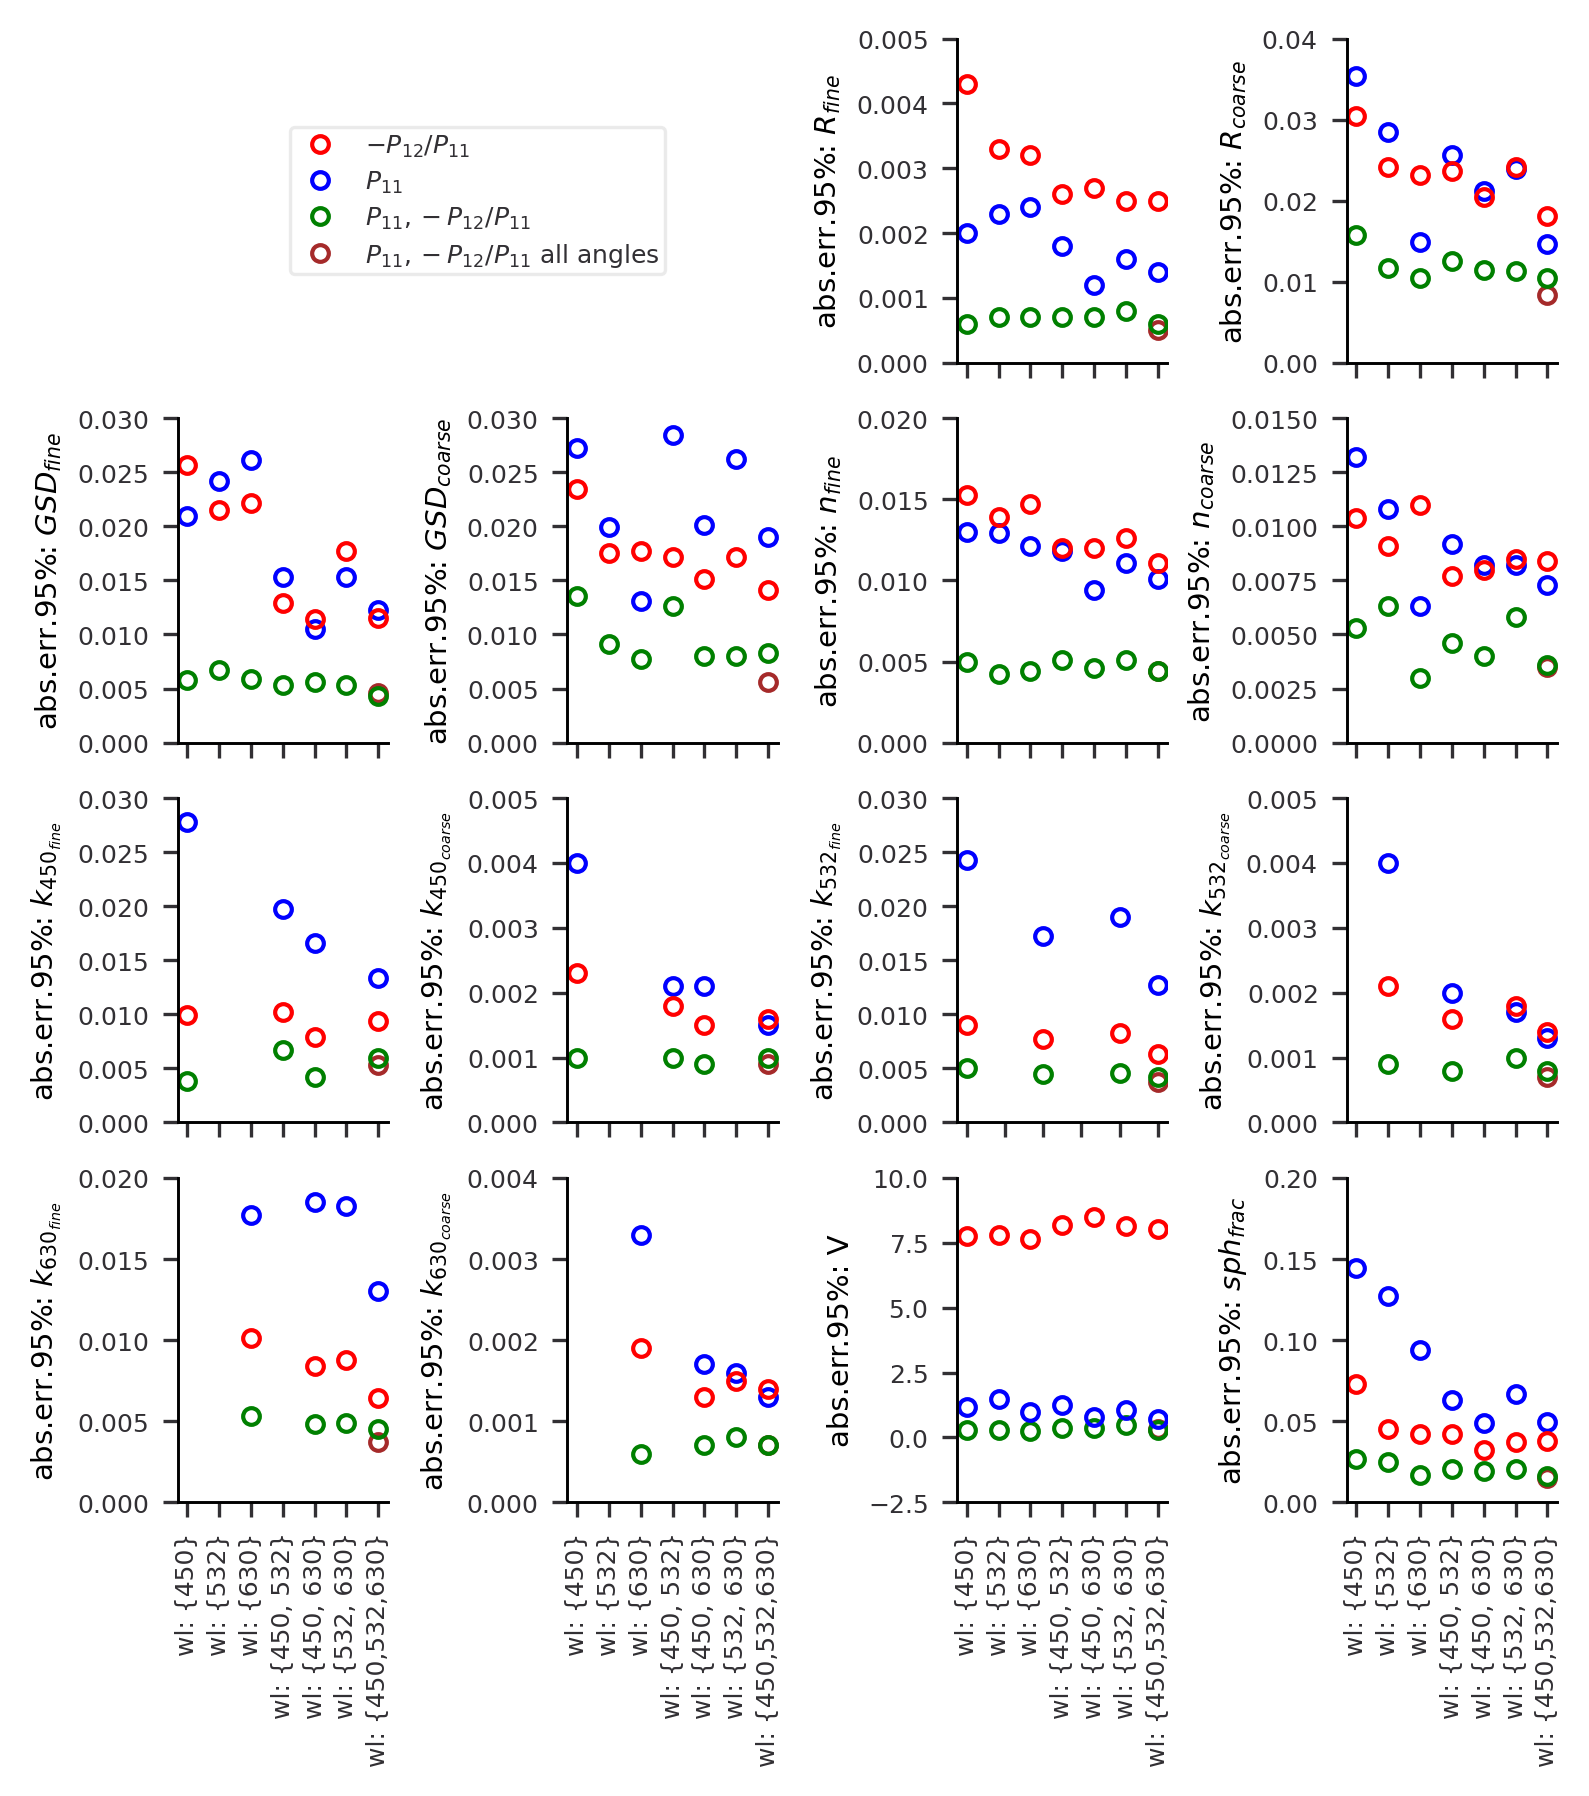

In [25]:
fig = plt.figure(figsize = (5.3,6))
subplot_nr = 1
axeslist = []
j = 0
gs = fig.add_gridspec(nrows = 4, ncols = 4)
for col in abs_err_col:
    print(col)
    
    if 'V' in col:
        subplot_nr = 15
        ylabel1 = 'abs.err.95%: V'
    elif 'R_fine' in col:
        subplot_nr = 3
        ylabel1 = 'abs.err.95%: $R_{fine}$'
    elif 'R_coarse' in col:
        subplot_nr = 4
        ylabel1 = 'abs.err.95%: $R_{coarse}$'        
    elif 'GSD_fine' in col:
        subplot_nr = 5
        ylabel1 = 'abs.err.95%: $GSD_{fine}$'
    elif 'GSD_coarse' in col:
        subplot_nr = 6
        ylabel1 = 'abs.err.95%: $GSD_{coarse}$'
    elif '_n_fine' in col:
        subplot_nr = 7
        ylabel1 = 'abs.err.95%: $n_{fine}$'
    elif '_n_coarse' in col:
        subplot_nr = 8
        ylabel1 = 'abs.err.95%: $n_{coarse}$'
    elif 'sph_frac' in col:
        subplot_nr = 16
        ylabel1 = 'abs.err.95%: $sph_{frac}$'  
    elif '_k_450_fine' in col:
        subplot_nr = 9
        ylabel1 = 'abs.err.95%: $k_{450_{fine}}$'
    elif '_k_450_coarse' in col:
        subplot_nr = 10
        ylabel1 = 'abs.err.95%: $k_{450_{coarse}}$'
    elif '_k_532_fine' in col:
        subplot_nr = 11
        ylabel1 = 'abs.err.95%: $k_{532_{fine}}$'
    elif '_k_532_coarse' in col:
        subplot_nr = 12
        ylabel1 = 'abs.err.95%: $k_{532_{coarse}}$'
    elif '_k_630_fine' in col:
        subplot_nr = 13
        ylabel1 = 'abs.err.95%: $k_{630_{fine}}$'
    elif '_k_630_coarse' in col:
        subplot_nr = 14
        ylabel1 = 'abs.err.95%: $k_{630_{coarse}}$'
        
    xlabel = ('wl: {450}', 'wl: {532}','wl: {630}','wl: {450, 532}','wl: {450, 630}','wl: {532, 630}', 'wl: {450,532,630}')
    x_pos = np.arange(len(xlabel))+1
        
    if subplot_nr in [3,7,11]:
        ax1 = fig.add_subplot(4,4,subplot_nr)
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.set_xticks(x_pos)
        #ax1.set_xticklabels(xlabel, rotation='vertical')
        ax1.set_ylabel(ylabel1)
        ax1.tick_params(axis='both', which='major')
    elif subplot_nr in [5,9]:
        ax2 = fig.add_subplot(4,4,subplot_nr)
        plt.setp(ax2.get_xticklabels(), visible=False)
        ax2.set_xticks(x_pos)
        #ax2.set_xticklabels(xlabel, rotation='vertical')
        ax2.set_ylabel(ylabel1)
        ax2.tick_params(axis='both', which='major')
    elif subplot_nr in [6,10]:
        ax3 = fig.add_subplot(4,4,subplot_nr)
        plt.setp(ax3.get_xticklabels(), visible=False)
        ax3.set_xticks(x_pos)
        #ax3.set_xticklabels(xlabel, rotation='vertical')
        ax3.set_ylabel(ylabel1)
        ax3.tick_params(axis='both', which='major')        
    elif subplot_nr in [4,8,12]:
        ax4 = fig.add_subplot(4,4,subplot_nr)
        plt.setp(ax4.get_xticklabels(), visible=False)
        ax4.set_xticks(x_pos)
        #ax4.set_xticklabels(xlabel, rotation='vertical')
        ax4.set_ylabel(ylabel1)
        ax4.tick_params(axis='both', which='major')
    elif subplot_nr ==13:
        ax11 =fig.add_subplot(4,4,subplot_nr,sharex = ax2)
        #plt.setp(ax5.get_xticklabels(), visible=False)
        ax11.set_xticks(x_pos)
        ax11.set_xticklabels(xlabel, rotation='vertical')
        ax11.set_ylabel(ylabel1)
        ax11.tick_params(axis='both', which='major')
    elif subplot_nr == 14:
        ax5 = fig.add_subplot(4,4,subplot_nr,sharex = ax3)
        ax5.set_xticks(x_pos)
        ax5.set_xticklabels(xlabel,rotation='vertical')
        ax5.set_ylabel(ylabel1)
        ax5.tick_params(axis='both', which='major')
    elif subplot_nr ==15:
        ax6 = fig.add_subplot(4,4,subplot_nr,sharex=ax1)
        ax6.set_xticks(x_pos)
        ax6.set_xticklabels(xlabel, rotation='vertical')
        ax6.set_ylabel(ylabel1)
        ax6.tick_params(axis='both', which='major')
    elif subplot_nr ==16:
        ax7 = fig.add_subplot(4,4,subplot_nr,sharex=ax4)
        ax7.set_xticks(x_pos)
        ax7.set_xticklabels(xlabel, rotation='vertical')
        ax7.set_ylabel(ylabel1)
        ax7.tick_params(axis='both', which='major')
    #elif subplot_nr ==13:
    #    ax8 = fig.add_subplot(4,4,subplot_nr,sharex=ax3)
    #    ax8.set_xticks(x_pos)
    #    ax8.set_xticklabels(xlabel, rotation='vertical')
    #    ax8.set_ylabel(ylabel1)
    #    ax8.tick_params(axis='both', which='major')
    #elif subplot_nr ==14:
    #    ax9 = fig.add_subplot(4,4,subplot_nr,sharex=ax4)
    #    ax9.set_xticks(x_pos)
    #    ax9.set_xticklabels(xlabel, rotation='vertical')
    #    ax9.set_ylabel(ylabel1)
    #    ax9.tick_params(axis='both', which='major')
    #elif subplot_nr ==5:
        #ax10 = plt.subplot(3,5,subplot_nr,sharex=ax5)
        #ax10.set_xticks(x_pos)
        #ax10.set_xticklabels(xlabel, fontsize = 15,rotation='vertical')
        #ax10.set_ylabel(ylabel1,fontsize = 15)
        #ax10.tick_params(axis='both', which='major', labelsize=15)

    j = j+1
    for i in range(len(df)):
        
        if df['P11'][i] == 'x':
            if df['P12'][i] == 'x':
                if df['Wo0'][i] =='x':
                    if 'fine' in col:
                        color1 = 'brown'
                    else:
                        color1 = 'brown'
                        legend1 = '$P_{11}$, $P_{pf}$, trunc_angles'
                else:
                    if 'fine' in col:
                        color1 = 'green'
                    else:
                        color1 = 'green'
                    legend1 = '$P_{11}$, $P_{pf}$'
            else:
                if 'fine' in col:
                    color1 = 'blue'
                else:
                    color1 = 'blue'
                legend1 = '$P_{11}$'
        else:
            if 'fine' in col:
                color1 = 'red'
            else:
                color1 = 'red'
            legend1 = '$P_{pf}$'

       # if i in [0,1,8,19]:
       #     if df[col][i]>0:
       #         plt.plot(df['Numbers_order'][i], df[col][i],marker = 'X', color = color1, markersize = 12, label = legend1)
        if df[col][i]> 0:
            plt.plot(df['Numbers_order'][i], df[col][i],marker = 'o', fillstyle = 'none', markerfacecolor = color1, markeredgecolor= color1,  markersize = 4,markeredgewidth=1)

  #  if subplot_nr == 1:
  #      ax1.legend(loc = 'upper right',ncol=len(df.columns))
    #plt.legend(['P11','P_{pf}','both'])

    
#ax1 = plt.subplot(3,5,15)  
#ax1.set_axis_off()

ax10 = fig.add_subplot(gs[0:1,0:2])
#ax10.set_xticks(x_pos)
#ax10.set_xticklabels(xlabel, fontsize = 15,rotation='vertical')
#ax10.set_ylabel(ylabel1,fontsize = 15)
#ax10.tick_params(axis='both', which='major', labelsize=15)
ax10.get_yaxis().set_visible(False)
ax10.get_xaxis().set_visible(False)
#red_patch = mpatches.Patch(color = 'red', label ='$P_{pf}$')
#orange_patch = mpatches.Patch(color = 'darkorange', label ='$P_{pf}$ fine')
#green_patch = mpatches.Patch(color = 'green',label = '$P_{11}$, $P_{pf}$ - all angles')
#lime_patch = mpatches.Patch(color = 'lime',label = '$P_{11}$, $P_{pf}$ fine - all angles')
#blue_patch = mpatches.Patch(color = 'blue', label ='$P_{11}$')
#dodgerblue_patch = mpatches.Patch(color = 'dodgerblue',label = '$P_{11}$ fine')
#brown_patch = mpatches.Patch(color = 'brown', label ='$P_{11}$, $P_{pf}$')
#peru_patch = mpatches.Patch(color = 'peru',label = '$P_{11}$, $P_{pf}$ fine')
#plt.legend(handles = [blue_patch, red_patch,brown_patch, green_patch], fontsize = 15, loc = 'center')
ax10.spines.left : False
ax10.spines.bottom : False
ax10.set_axis_off()
line1 = Line2D(range(1), range(1), color="white", marker='o', markeredgecolor="red", fillstyle = 'none', markersize = 4,markeredgewidth=1)
line2 = Line2D(range(1), range(1), color="white", marker='o',markeredgecolor="blue", fillstyle = 'none', markersize = 4,markeredgewidth=1)
line3 = Line2D(range(1), range(1), color="white", marker='o', markeredgecolor='green',fillstyle = 'none',  markersize = 4,markeredgewidth=1)
line4 = Line2D(range(1), range(1), color="white", marker='o',markeredgecolor="brown",fillstyle = 'none',  markersize = 4,markeredgewidth=1)
plt.legend((line1,line2,line3,line4),('$-P_{12}/P_{11}$','$P_{11}$', '$P_{11}, -P_{12}/P_{11}$', '$P_{11}, -P_{12}/P_{11}$ all angles'),loc = 'center')



fig.tight_layout()
fig.savefig(f'{directory}/comparison_abs_error_bim_AAE_onecolor.jpg')

In [23]:
directory

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_bim_AAE/'

In [24]:
directory1 = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/'

df1 = pd.read_csv(f'{directory1}results_summary_all.csv')  

In [25]:
df1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'data_file', 'batch_size',
       'learning_rate', 'n_blocks', 'n_depth', 'n_width', 'weight_x',
       'weight_y', 'weight_z', 'weight_artificial', 'weight_reconstruction',
       'r2_train_qoi_mean', 'r2_val_qoi_mean', 'r2_test_qoi_mean',
       'rel_error95%_qoi_P11_max', 'abs_error95%_qoi_P11_max',
       'wMAPE_qoi_P11_mean', 'rel_error95%_qoi_P12_max',
       'abs_error95%_qoi_P12_max', 'wMAPE_qoi_P12_mean', 'MAE_qoi_max',
       'MAPE%_qoi_max', 'explained_variance_qoi_min', 'wMAPE_qoi_mean',
       'r2_test_qoi_mean_exp', 'rel_error95%_qoi_P11_max_exp',
       'abs_error95%_qoi_P11_max_exp', 'wMAPE_qoi_P11_mean_exp',
       'wMAPE_qoi_mean_exp', 'r2_train_dvar_mean', 'r2_val_dvar_mean',
       'r2_test_dvar_mean', 'r2_test_dvar_V', 'rel_error95%_dvar_V',
       'abs_error95%_dvar_V', 'MAE_dvar_V', 'MAPE%_dvar_V',
       'explained_variance_dvar_V', 'wMAPE_dvar_V', 'r2_test_dvar_R',
       'rel_error95%_dvar_R', 'abs_error95%_dvar_R', 'MAE_dv

In [26]:
df1

Unnamed: 0  Unnamed: 0.1  \
0            0             0   
1            0             0   
2            0             0   
3            0             0   
4            0             0   
5            0             0   
6            0             0   
7            0             0   
8            0             0   
9            0             0   
10           0             0   
11           0             0   
12           0             0   
13           0             0   
14           0             0   
15           0             0   
16           0             0   
17           0             0   
18           0             0   
19           0             0   
20           0             0   
21           0             0   

                                            data_file  batch_size  \
0   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
1   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
2   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
3   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
4   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
5   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
6   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
7   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
8   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
9   /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
10  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
11  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
12  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
13  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
14  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
15  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
16  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
17  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
18  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
19  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
20  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   
21  /data/user/boiger_r/aerosol/aerosol_data/raw_d...           8   

    learning_rate  n_blocks  n_depth  n_width  weight_x  weight_y  ...  \
0         0.00009         3        2       92       138       350  ...   
1         0.00009         3        2       92       146       350  ...   
2         0.00009         3        2       92       138       350  ...   
3         0.00009         3        2       92       138       350  ...   
4         0.00009         3        2       92       138       350  ...   
5         0.00009         3        2       92       138       350  ...   
6         0.00009         3        2       92       142       350  ...   
7         0.00009         3        2       92       146       350  ...   
8         0.00009         3        2       92       142       350  ...   
9         0.00009         3        2       92       138       350  ...   
10        0.00009         3        2       92       142       350  ...   
11        0.00009         3        2       92       146       350  ...   
12        0.00009         3        2       92       146       350  ...   
13        0.00009         3        2       92       146       350  ...   
14        0.00009         3        2       92       138       350  ...   
15        0.00009         3        2       92       146       350  ...   
16        0.00009         3        2       92       146       350  ...   
17        0.00009         3        2       92       142       350  ...   
18        0.00009         3        2       92       142       350  ...   
19        0.00009         3        2       92       142       350  ...   
20        0.00009         3        2       92       142       350  ...   
21        0.00009         3        2       92      

In [27]:
wmape_err_col1 = []
for col1 in df1.columns:
    if 'wMAPE' in col1:
        wmape_err_col1.append(col1)

wmape_err_col1.remove('wMAPE_qoi_mean')
wmape_err_col1.remove('wMAPE_qoi_P11_mean_exp')
wmape_err_col1.remove('wMAPE_qoi_mean_exp')
wmape_err_col1

['wMAPE_qoi_P11_mean',
 'wMAPE_qoi_P12_mean',
 'wMAPE_dvar_V',
 'wMAPE_dvar_R',
 'wMAPE_dvar_GSD',
 'wMAPE_dvar_n',
 'wMAPE_dvar_k_532nm',
 'wMAPE_dvar_k_450nm',
 'wMAPE_dvar_k_630nm',
 'wMAPE_dvar_AAE']

In [28]:
abs_err_col1 = []
for col1 in df1.columns:
    if 'abs_error' in col1:
        abs_err_col1.append(col1)
abs_err_col1.remove('abs_error95%_qoi_P11_max_exp')
abs_err_col1

['abs_error95%_qoi_P11_max',
 'abs_error95%_qoi_P12_max',
 'abs_error95%_dvar_V',
 'abs_error95%_dvar_R',
 'abs_error95%_dvar_GSD',
 'abs_error95%_dvar_n',
 'abs_error95%_dvar_k_532nm',
 'abs_error95%_dvar_k_450nm',
 'abs_error95%_dvar_k_630nm',
 'abs_error95%_dvar_AAE']

In [29]:
df1['Numbers'] = [3,3,1,1,1,2,2,2,3,3,1,1,1,2,2,2,1,1,1,2,2,2]
df1['Numbers_order'] = [7,7,2,1,3,5,4,6,7,7,2,1,3,4,6,5,2,1,3,4,6,5]

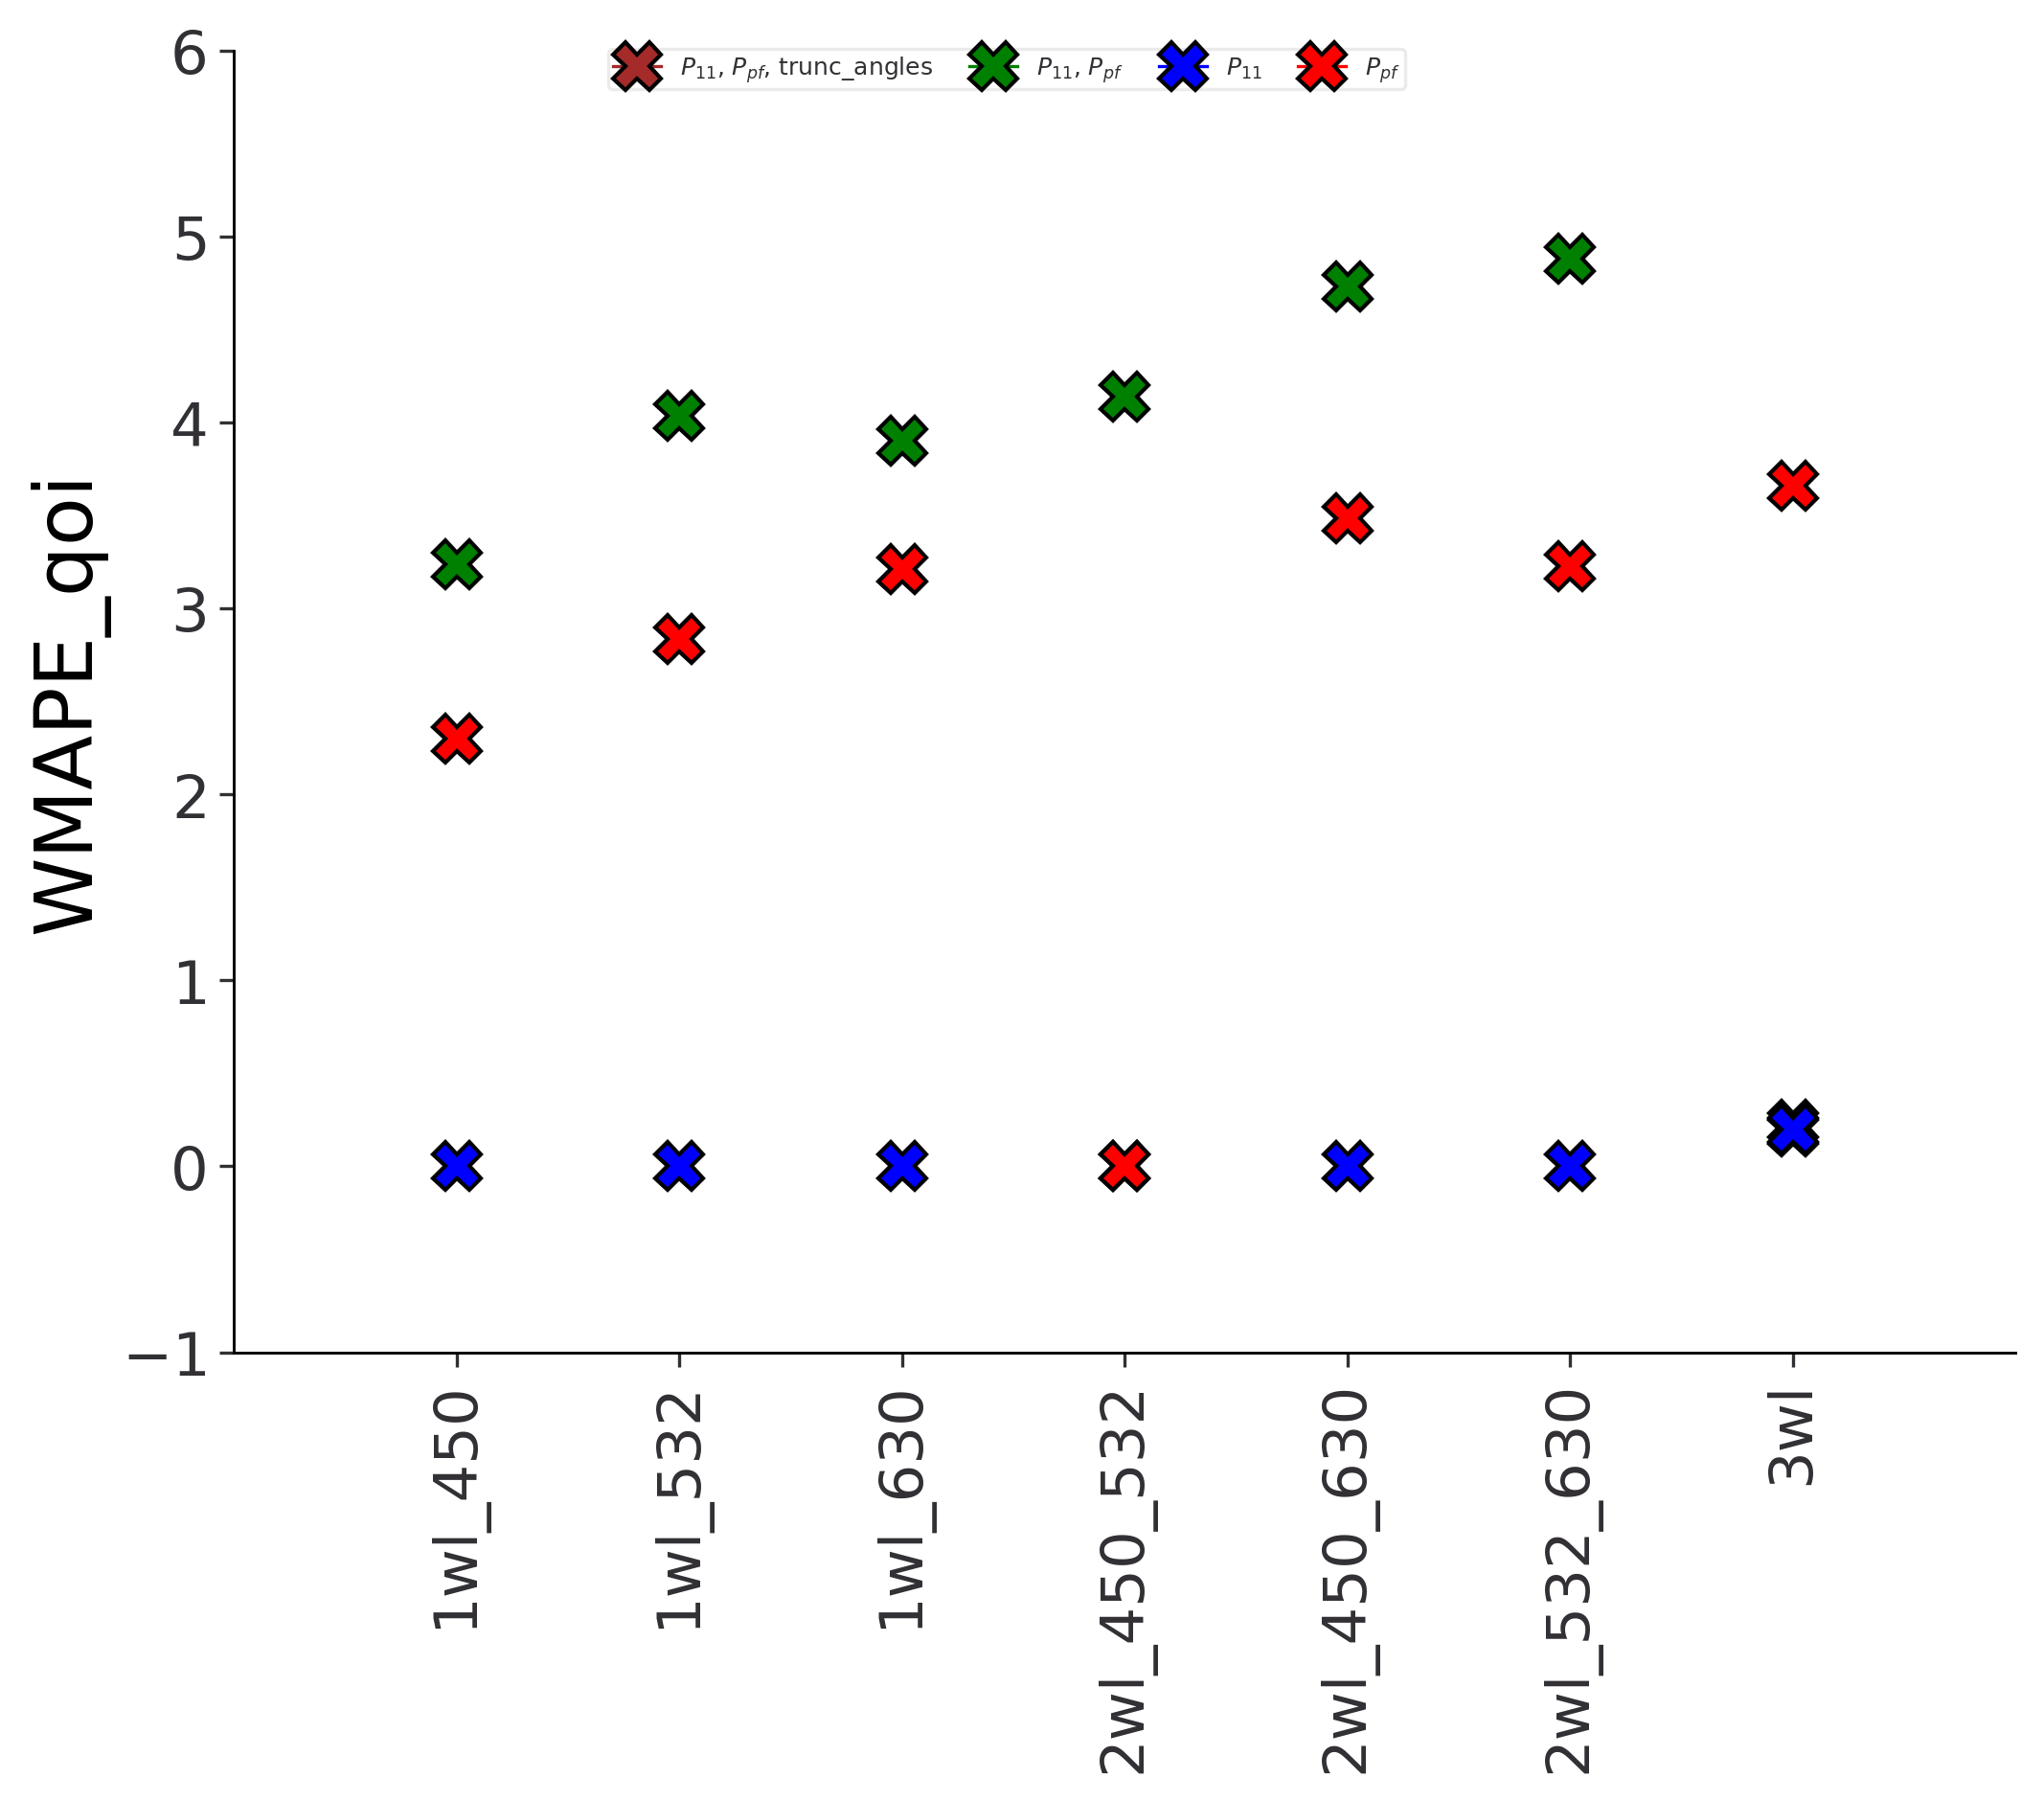

In [30]:
fig,ax = plt.subplots(figsize = (8,6))
for i in range(len(df1)):
    
    if df1['P11'][i] == 'x':
        if df1['P12'][i] == 'x':
            if df1['Wo0'][i] =='x':
                color1 = 'brown'
                legend1 = '$P_{11}$, $P_{pf}$, trunc_angles'
            else:
                color1 = 'green'
                legend1 = '$P_{11}$, $P_{pf}$'
        else:
            color1 = 'blue'
            legend1 = '$P_{11}$'
    else:
        color1 = 'red'
        legend1 = '$P_{pf}$'
        
    if i in [0,1,8,19]:
        ax.plot(df1['Numbers_order'][i], df1['wMAPE_qoi_P11_mean'][i],marker = 'X', color = color1, markersize = 12, label = legend1)
    else:
        ax.plot(df1['Numbers_order'][i], df1['wMAPE_qoi_P12_mean'][i],marker = 'X', color = color1, markersize = 12)
    

ax.legend(bbox_to_anchor=(0.664, 1.01),ncol=len(df1.columns))
#plt.legend(['P11','P_{pf}','both'])
xlabel = ('1wl_450', '1wl_532','1wl_630','2wl_450_532','2wl_450_630','2wl_532_630', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 15,rotation='vertical')
ax.set_ylabel('WMAPE_qoi',fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=15)


In [31]:
abs_err_col1

['abs_error95%_qoi_P11_max',
 'abs_error95%_qoi_P12_max',
 'abs_error95%_dvar_V',
 'abs_error95%_dvar_R',
 'abs_error95%_dvar_GSD',
 'abs_error95%_dvar_n',
 'abs_error95%_dvar_k_532nm',
 'abs_error95%_dvar_k_450nm',
 'abs_error95%_dvar_k_630nm',
 'abs_error95%_dvar_AAE']

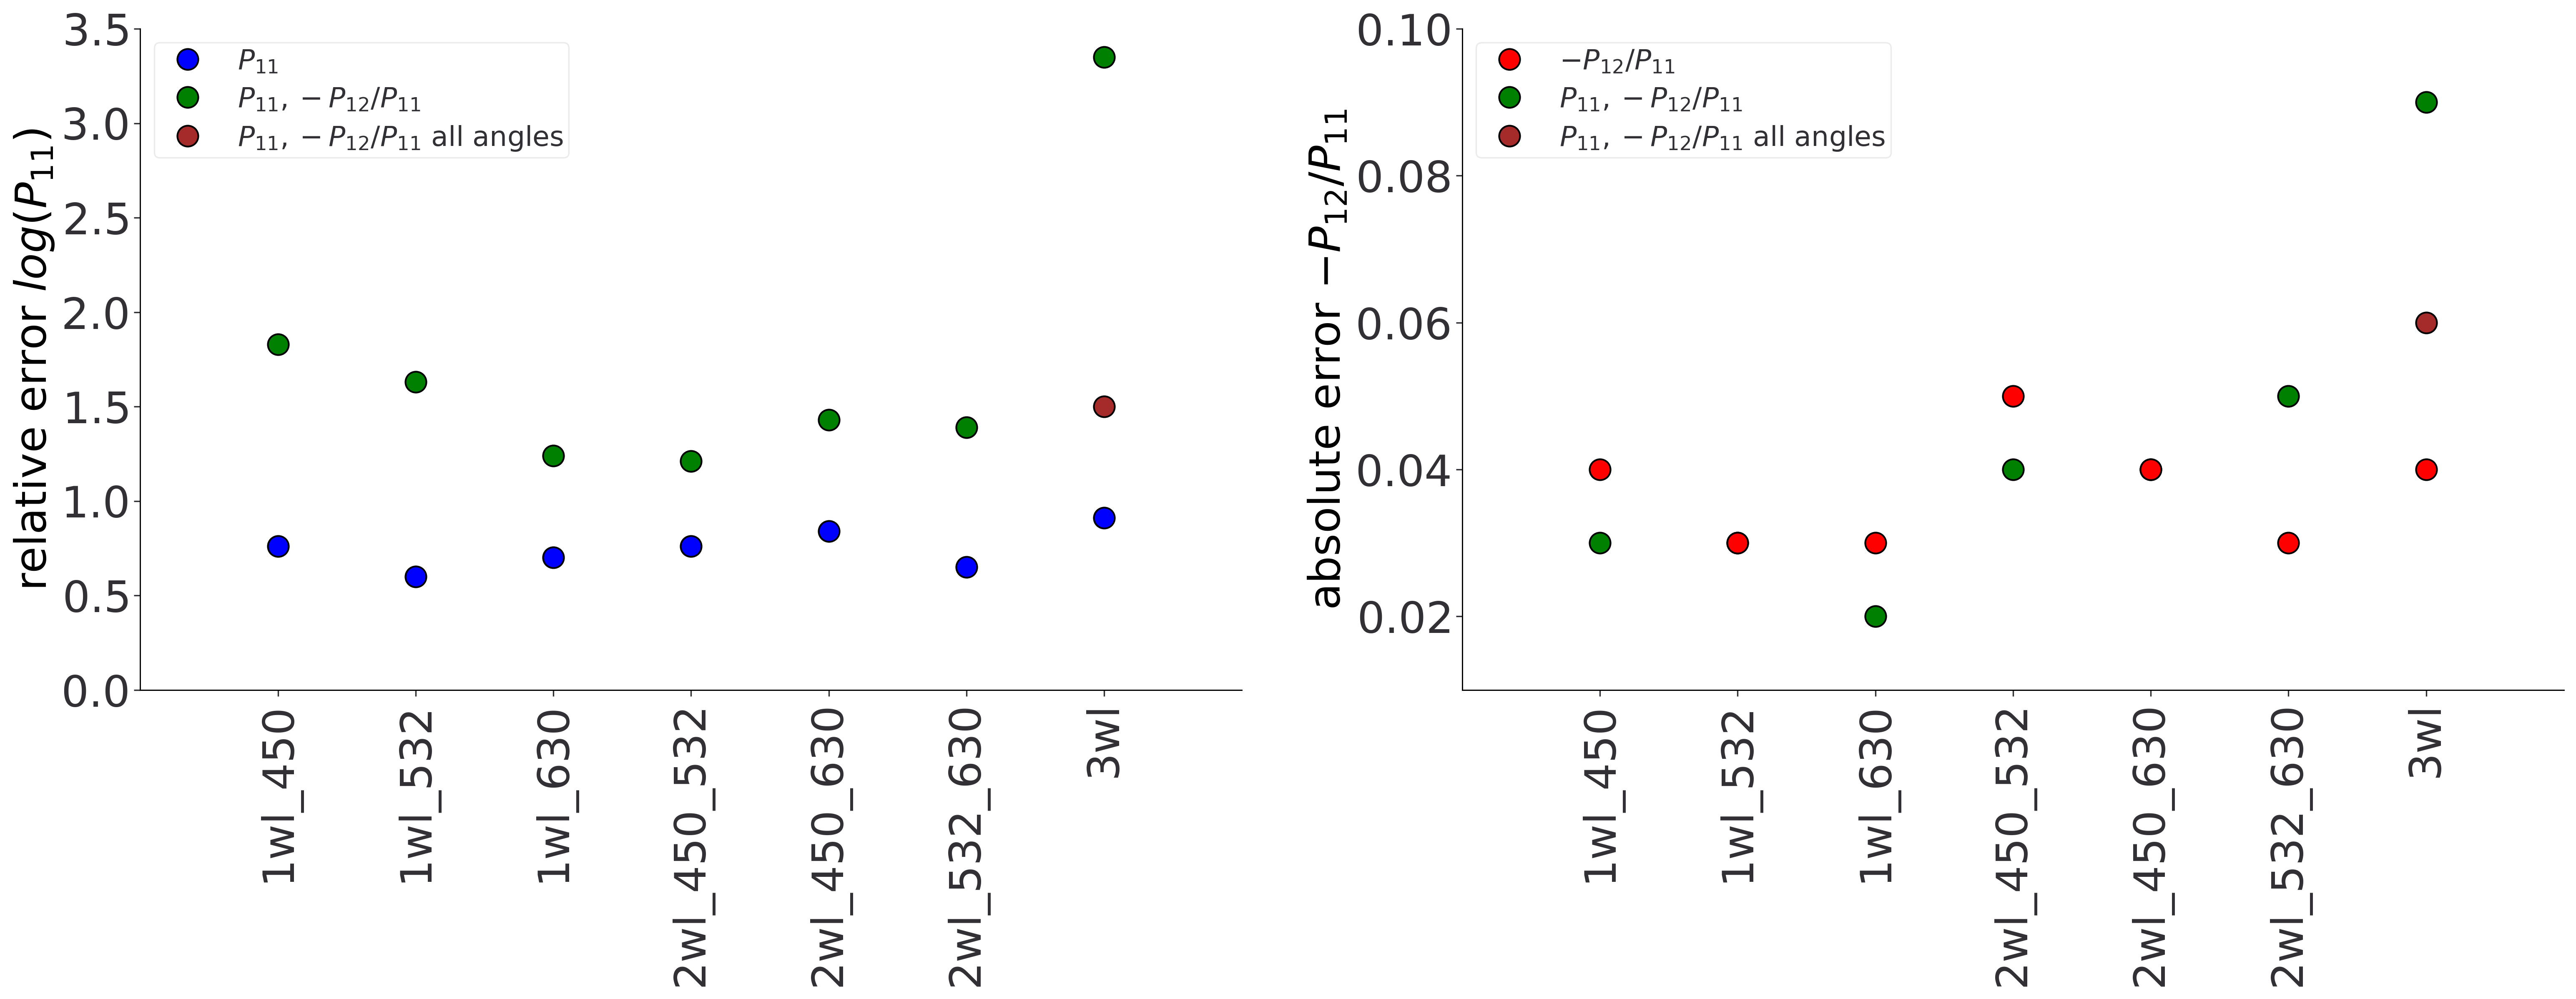

In [35]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (25,7))
for i in range(len(df1)):
    
    if df1['P11'][i] == 'x':
        if df1['P12'][i] == 'x':
            if df1['Wo0'][i] =='x':
                color1 = 'brown'
                legend1 = '$P_{11}$, $P_{pf}$, trunc_angles'
            else:
                color1 = 'green'
                legend1 = '$P_{11}$, $P_{pf}$'
        else:
            color1 = 'blue'
            legend1 = '$P_{11}$'
    else:
        color1 = 'red'
        legend1 = '$P_{pf}$'
        
    #if i in [0,1,8,19]:
    if df1['rel_error95%_qoi_P11_max'][i] != 0:
        ax1.plot(df['Numbers_order'][i], df1['rel_error95%_qoi_P11_max'][i],marker = 'o', color = color1, markersize = 12, label = legend1)
    if df1['abs_error95%_qoi_P12_max'][i] != 0:
        ax2.plot(df['Numbers_order'][i], df1['abs_error95%_qoi_P12_max'][i],marker = 'o', color = color1, markersize = 12)
    

ax.legend(bbox_to_anchor=(0.664, 1.01),ncol=len(df.columns))
#plt.legend(['P11','P_{pf}','both'])
xlabel = ('1wl_450', '1wl_532','1wl_630','2wl_450_532','2wl_450_630','2wl_532_630', '3wl')
x_pos = np.arange(len(xlabel))+1
ax1.set_xticks(x_pos)
ax1.set_xticklabels(xlabel, fontsize = 25,rotation='vertical')
ax1.set_ylabel('relative error $log(P_{11})$',fontsize = 25)
ax1.tick_params(axis='both', which='major', labelsize=25)
line1 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="blue", markersize = 12)
line3 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='green',  markersize = 12)
line4 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="brown",  markersize = 12)
ax1.legend((line1,line3,line4),('$P_{11}$', '$P_{11}, -P_{12}/P_{11}$', '$P_{11}, -P_{12}/P_{11}$ all angles'),fontsize = 16, loc = 'upper left')



xlabel = ('1wl_450', '1wl_532','1wl_630','2wl_450_532','2wl_450_630','2wl_532_630', '3wl')
x_pos = np.arange(len(xlabel))+1
ax2.set_xticks(x_pos)
ax2.set_xticklabels(xlabel, fontsize = 25,rotation='vertical')
ax2.set_ylabel('absolute error $-P_{12}/P_{11}$',fontsize = 25)
ax2.tick_params(axis='both', which='major', labelsize=25)


line1 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red", markersize = 12)
line3 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='green',  markersize = 12)
line4 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="brown",  markersize = 12)
ax2.legend((line1,line3,line4),('$-P_{12}/P_{11}$', '$P_{11}, -P_{12}/P_{11}$', '$P_{11}, -P_{12}/P_{11}$ all angles'),fontsize = 16, loc = 'upper left')
fig.savefig(f'{directory1}/rel_abs_error_uni_AAE.jpg',bbox_inches='tight')

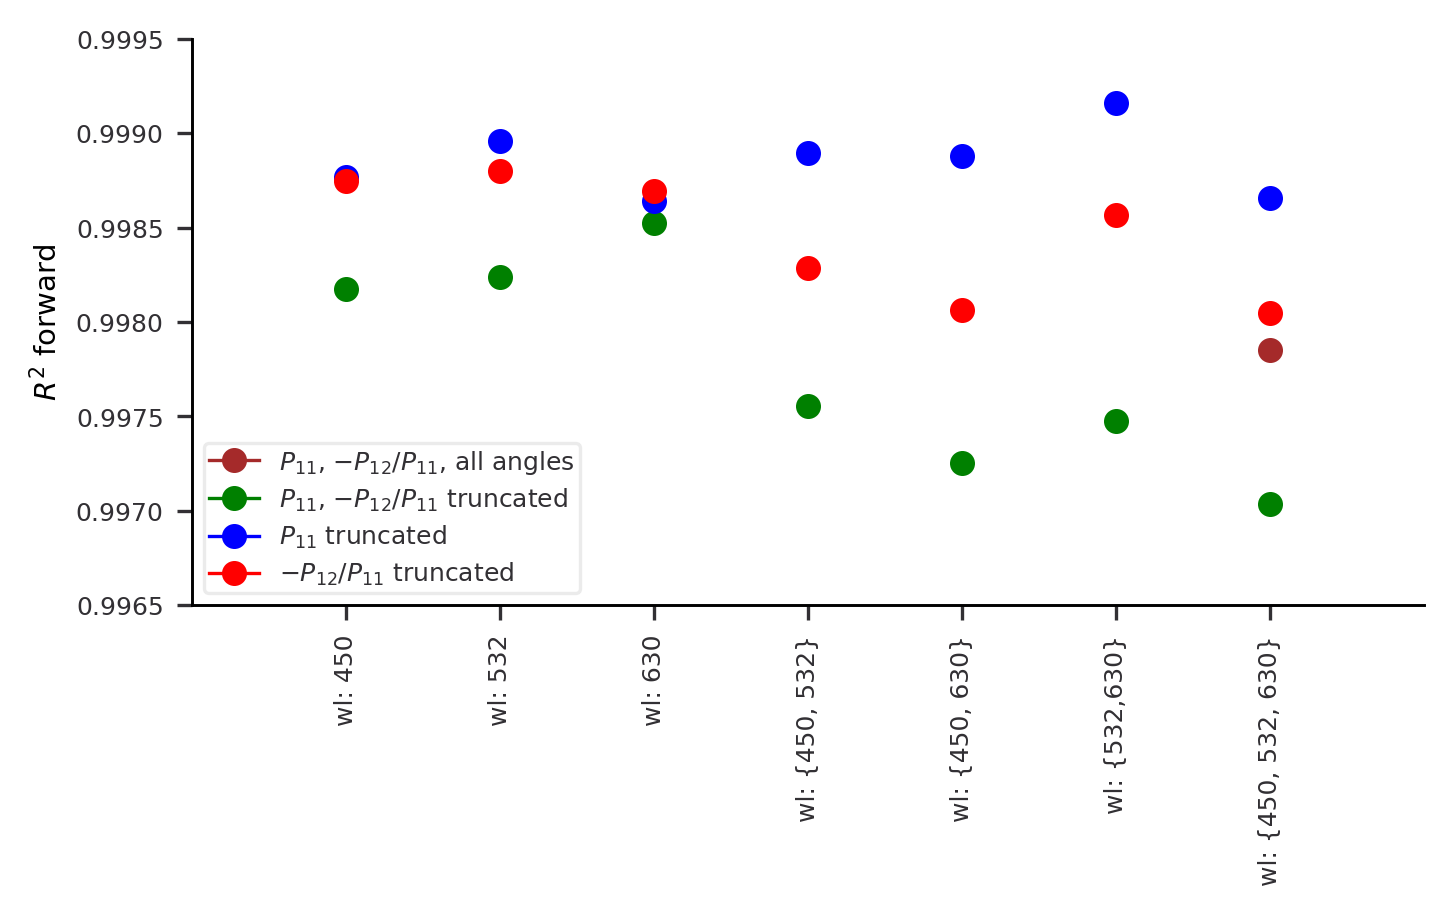

In [32]:
fig,ax = plt.subplots(figsize = (5.3,2.5))
for i in range(len(df)):
    
    if df1['P11'][i] == 'x':
        if df1['P12'][i] == 'x':
            if df1['Wo0'][i] =='x':
                color1 = 'brown'
                legend1 = '$P_{11}$, $-P_{12}/P_{11}$, all angles'
            else:
                color1 = 'green'
                legend1 = '$P_{11}$, $-P_{12}/P_{11}$ truncated'
        else:
            color1 = 'blue'
            legend1 = '$P_{11}$ truncated'
    else:
        color1 = 'red'
        legend1 = '$-P_{12}/P_{11}$ truncated'
        
    if i in [0,1,8,19]:
        plt.plot(df1['Numbers_order'][i], df1['r2_test_qoi_mean'][i],marker = 'o', color = color1, markersize = 5,markerfacecolor =  color1, markeredgecolor =color1, label = legend1)
    else:
        plt.plot(df1['Numbers_order'][i], df1['r2_test_qoi_mean'][i],marker = 'o', color = color1, markersize = 5,markerfacecolor =  color1, markeredgecolor =color1)
    

ax.legend(loc='lower left')
#plt.legend(['P11','P_{pf}','both'])
xlabel = ('wl: 450', 'wl: 532','wl: 630','wl: {450, 532}','wl: {450, 630}','wl: {532,630}', 'wl: {450, 532, 630}')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, rotation='vertical')
ax.set_ylabel('$R^2$ forward')
ax.tick_params(axis='both', which='major')
fig.savefig(f'{directory1}/r2_test_qoi_AAE.jpg',bbox_inches='tight')

In [33]:
directory1

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/'

In [34]:
abs_err_col1.remove('abs_error95%_qoi_P11_max')
abs_err_col1.remove('abs_error95%_qoi_P12_max')


In [35]:
abs_err_col1.remove('abs_error95%_dvar_AAE')


In [36]:
fontsize1 = 25
fontsize2 = 20

abs_error95%_dvar_V
abs_error95%_dvar_V
1
abs_error95%_dvar_R
abs_error95%_dvar_R
1
abs_error95%_dvar_GSD
abs_error95%_dvar_GSD
1
abs_error95%_dvar_n
abs_error95%_dvar_n
1
abs_error95%_dvar_k_532nm
abs_error95%_dvar_k_532nm
1
abs_error95%_dvar_k_450nm
abs_error95%_dvar_k_450nm
1
abs_error95%_dvar_k_630nm
abs_error95%_dvar_k_630nm
1


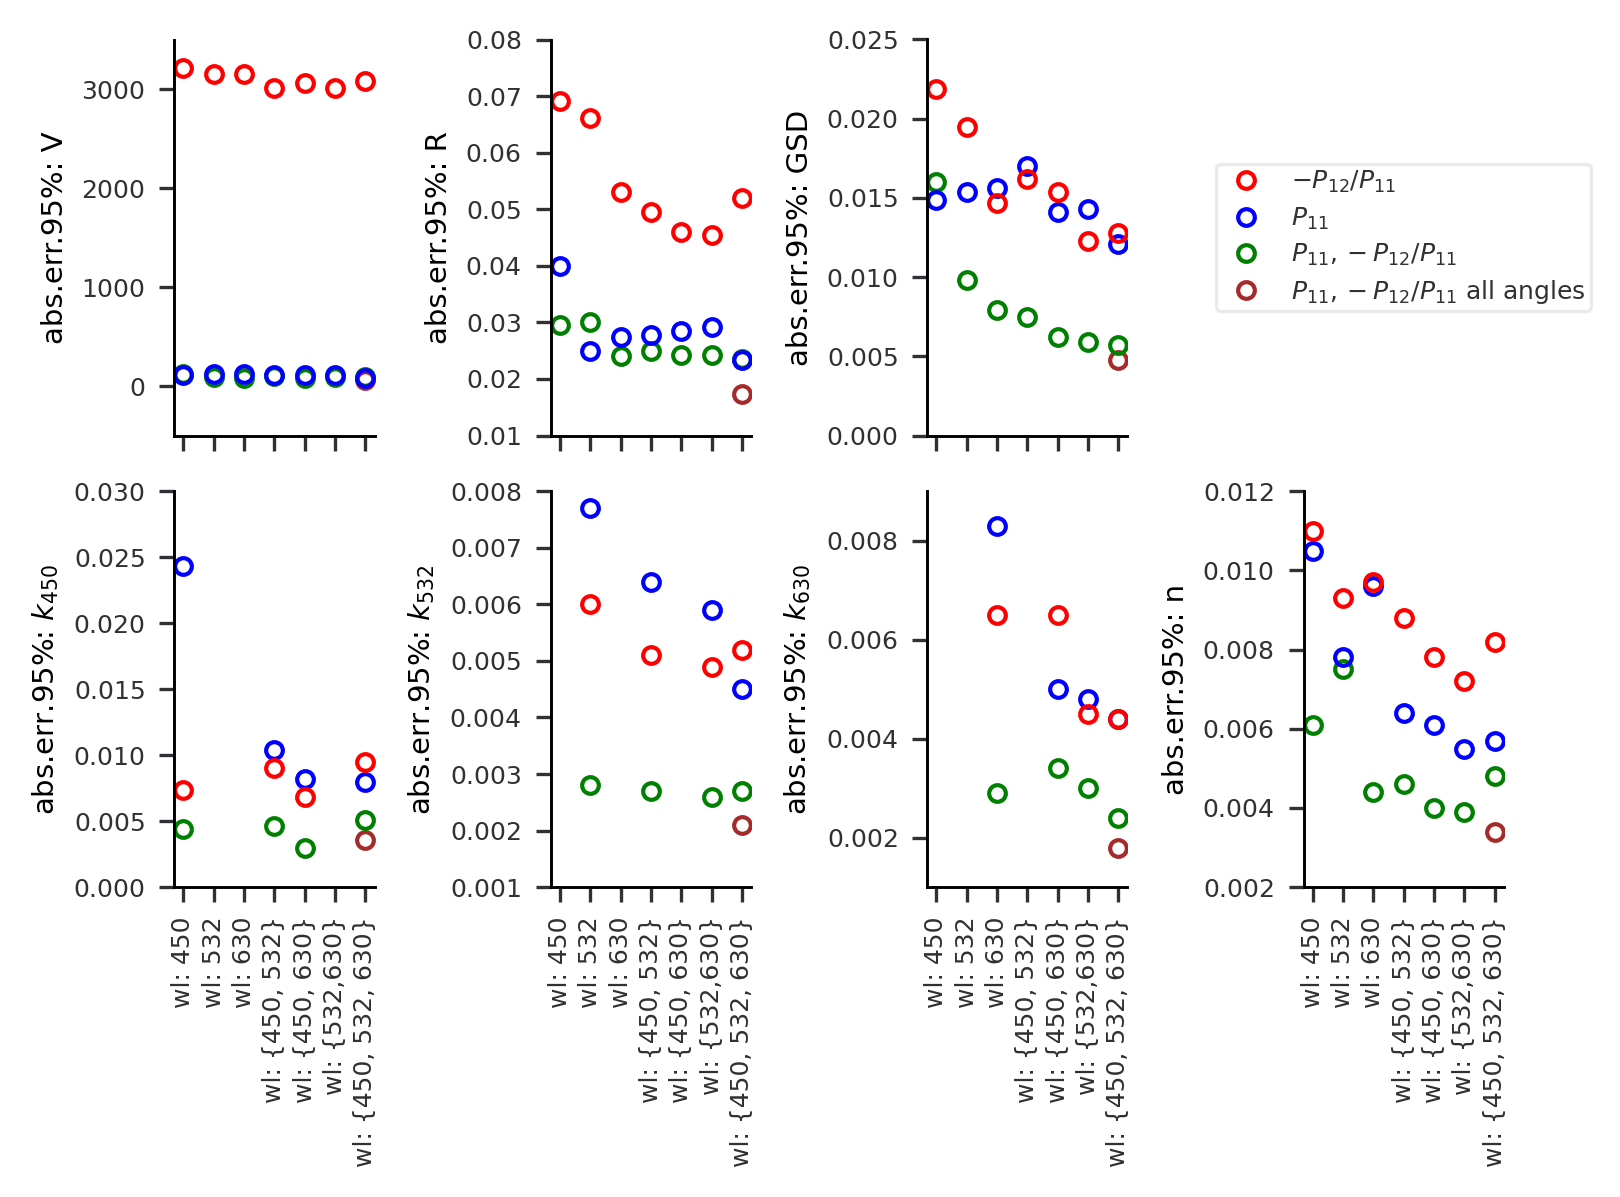

In [37]:
fig = plt.figure(figsize = (5.3,4))
subplot_nr = 1
axeslist = []
j = 0
for col in abs_err_col1:
    print(col)
    xlabel = ('wl: 450', 'wl: 532','wl: 630','wl: {450, 532}','wl: {450, 630}','wl: {532,630}', 'wl: {450, 532, 630}')
    x_pos = np.arange(len(xlabel))+1
    if 'V' in col:
        ylabel1 = 'abs.err.95%: V'
        ax1 = fig.add_subplot(2,4,1)
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels(xlabel, rotation='vertical')
        ax1.set_ylabel(ylabel1)
        ax1.tick_params(axis='both', which='major')
    elif '_R' in col:
        ax2 = fig.add_subplot(2,4,2)
        ylabel1 = 'abs.err.95%: R'
        plt.setp(ax2.get_xticklabels(), visible=False)
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(xlabel, rotation='vertical')
        ax2.set_ylabel(ylabel1)
        ax2.tick_params(axis='both', which='major')

    elif 'GSD' in col:
        ax3 = fig.add_subplot(2,4,3)
        ylabel1 = 'abs.err.95%: GSD'
        plt.setp(ax3.get_xticklabels(), visible=False)
        ax3.set_xticks(x_pos)
        ax3.set_xticklabels(xlabel,rotation='vertical')
        ax3.set_ylabel(ylabel1)
        ax3.tick_params(axis='both', which='major')

    elif '_n' in col:
        ax8 = fig.add_subplot(2,4,8)
        ylabel1 = 'abs.err.95%: n'
        #plt.setp(ax8.get_xticklabels(), visible=False)
        ax8.set_xticks(x_pos)
        ax8.set_xticklabels(xlabel, rotation='vertical')
        ax8.set_ylabel(ylabel1)
        ax8.tick_params(axis='both', which='major')

    elif '_k_450' in col:
        ax5 = fig.add_subplot(2,4,5,sharex=ax1)
        ylabel1 = 'abs.err.95%: $k_{450}$'

        ax5.set_xticks(x_pos)
        ax5.set_xticklabels(xlabel, rotation='vertical')
        ax5.set_ylabel(ylabel1)
        ax5.tick_params(axis='both', which='major')

    elif '_k_532' in col:
        ax6 = fig.add_subplot(2,4,6,sharex=ax2)
        ylabel1 = 'abs.err.95%: $k_{532}$'
        ax6.set_xticks(x_pos)
        ax6.set_xticklabels(xlabel, rotation='vertical')
        ax6.set_ylabel(ylabel1)
        ax6.tick_params(axis='both', which='major')

        
    elif '_k_630' in col:
        ax7 = fig.add_subplot(2,4,7,sharex=ax3)
        ylabel1 = 'abs.err.95%: $k_{630}$'
        ax7.set_xticks(x_pos)
        ax7.set_xticklabels(xlabel, rotation='vertical')
        ax7.set_ylabel(ylabel1)
        ax7.tick_params(axis='both', which='major')

 

        

    j = j+1
    print(col)
    print(subplot_nr)
    for i in range(len(df1)):
        
        if df1['P11'][i] == 'x':
            if df1['P12'][i] == 'x':
                if df1['Wo0'][i] =='x':
                    color1 = 'brown'
                    legend1 = '$P_{11}$, $P_{pf}$, trunc_angles'
                else:
                    color1 = 'green'
                    legend1 = '$P_{11}$, $P_{pf}$'
            else:
                color1 = 'blue'
                legend1 = '$P_{11}$'
        else:
            color1 = 'red'
            legend1 = '$P_{pf}$'

 
        if df1[col][i]>0:
            plt.plot(df1['Numbers_order'][i], df1[col][i],marker = 'o', fillstyle = 'none', markerfacecolor = color1, markeredgecolor= color1,  markersize = 4,markeredgewidth=1)



ax4 = fig.add_subplot(2,4,4)
#ax8.set_xticks(x_pos)
#ax8.set_xticklabels(xlabel, fontsize = 15,rotation='vertical')
#ax8.set_ylabel(ylabel1,fontsize = 15)
#ax8.tick_params(axis='both', which='major', labelsize=15)
ax4.get_yaxis().set_visible(False)
ax4.get_xaxis().set_visible(False)
plt.setp(ax4.get_xticklabels(), visible=False)
#red_patch = mpatches.Patch(color = 'red', label ='$P_{pf}$ ')
#orange_patch = mpatches.Patch(color = 'darkorange', label ='$P_{pf}$ fine')
#green_patch = mpatches.Patch(color = 'green',label = '$P_{11}$, $P_{pf}$ - all angles')
#lime_patch = mpatches.Patch(color = 'lime',label = '$P_{11}$, $P_{pf}$ fine - all angles')
#blue_patch = mpatches.Patch(color = 'blue', label ='$P_{11}$')
#dodgerblue_patch = mpatches.Patch(color = 'dodgerblue',label = '$P_{11}$ fine')
#brown_patch = mpatches.Patch(color = 'brown', label ='$P_{11}$, $P_{pf}$')
#peru_patch = mpatches.Patch(color = 'peru',label = '$P_{11}$, $P_{pf}$ fine')
#plt.legend(handles = [blue_patch, red_patch,brown_patch, green_patch], fontsize = 15, loc = 'center')

line1 = Line2D(range(1), range(1), color="white", marker='o', markeredgecolor="red", fillstyle = 'none', markersize = 4,markeredgewidth=1)
line2 = Line2D(range(1), range(1), color="white", marker='o',markeredgecolor="blue", fillstyle = 'none', markersize = 4,markeredgewidth=1)
line3 = Line2D(range(1), range(1), color="white", marker='o', markeredgecolor='green',fillstyle = 'none',  markersize = 4,markeredgewidth=1)
line4 = Line2D(range(1), range(1), color="white", marker='o',markeredgecolor="brown",fillstyle = 'none',  markersize = 4,markeredgewidth=1)
plt.legend((line1,line2,line3,line4),('$-P_{12}/P_{11}$','$P_{11}$', '$P_{11}, -P_{12}/P_{11}$', '$P_{11}, -P_{12}/P_{11}$ all angles'), loc = 'center')

ax4.set_axis_off()



fig.tight_layout()
fig.savefig(f'{directory1}/comparison_abs_error_AAE.jpg')

In [38]:
directory1

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/'

In [39]:
directory

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_bim_AAE/'

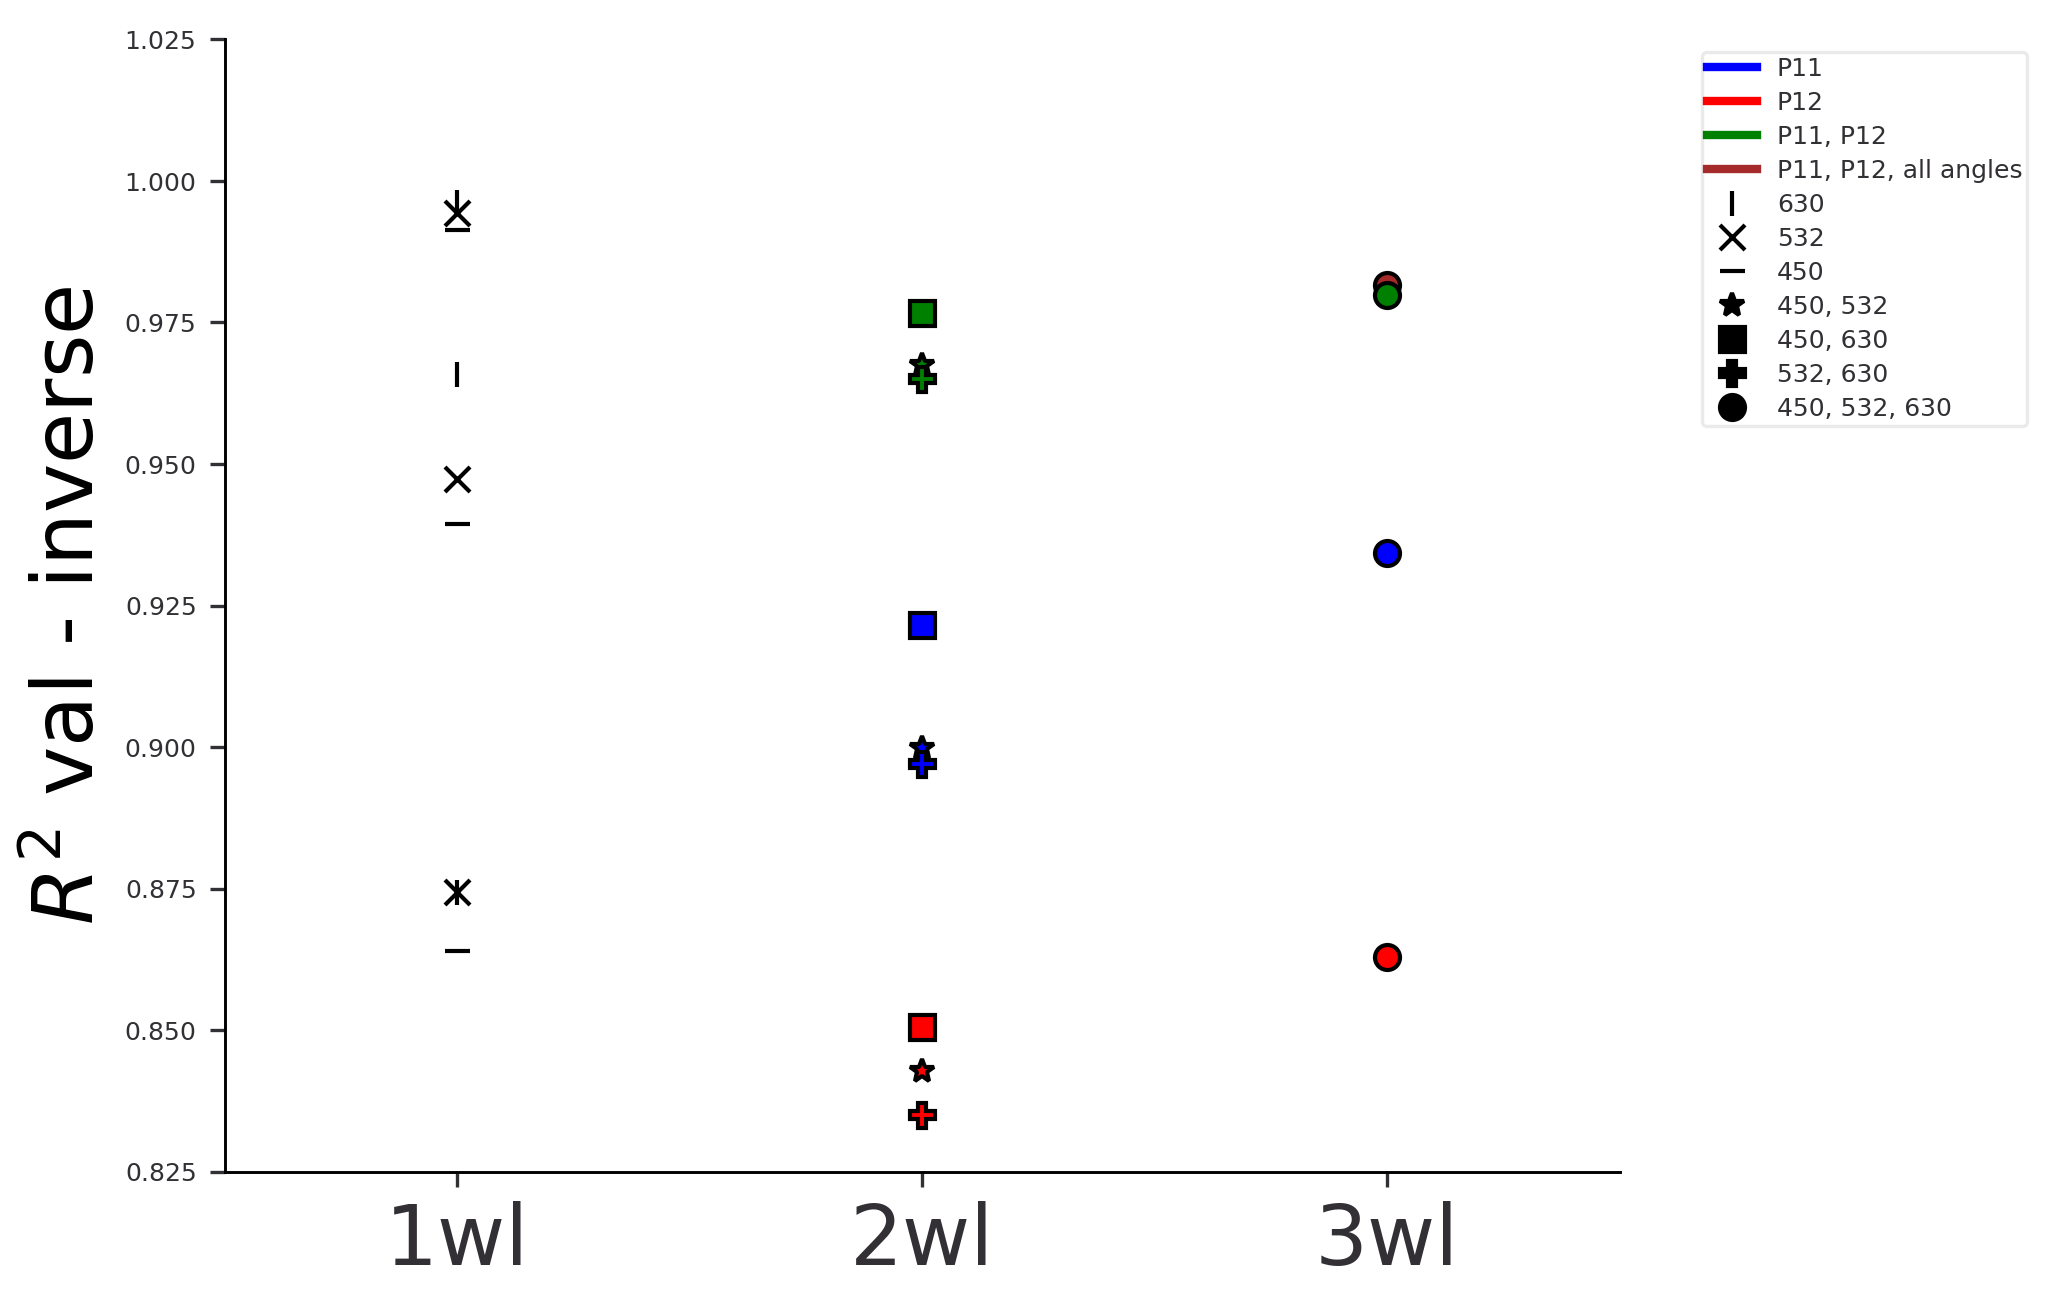

In [40]:
fig, ax = plt.subplots(figsize = (6,5))
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['r2_val_dvar_mean'][i],marker = marker1, color = color1, label = legend1)
    
plt.ylabel('$R^2$ val - inverse', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)


# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

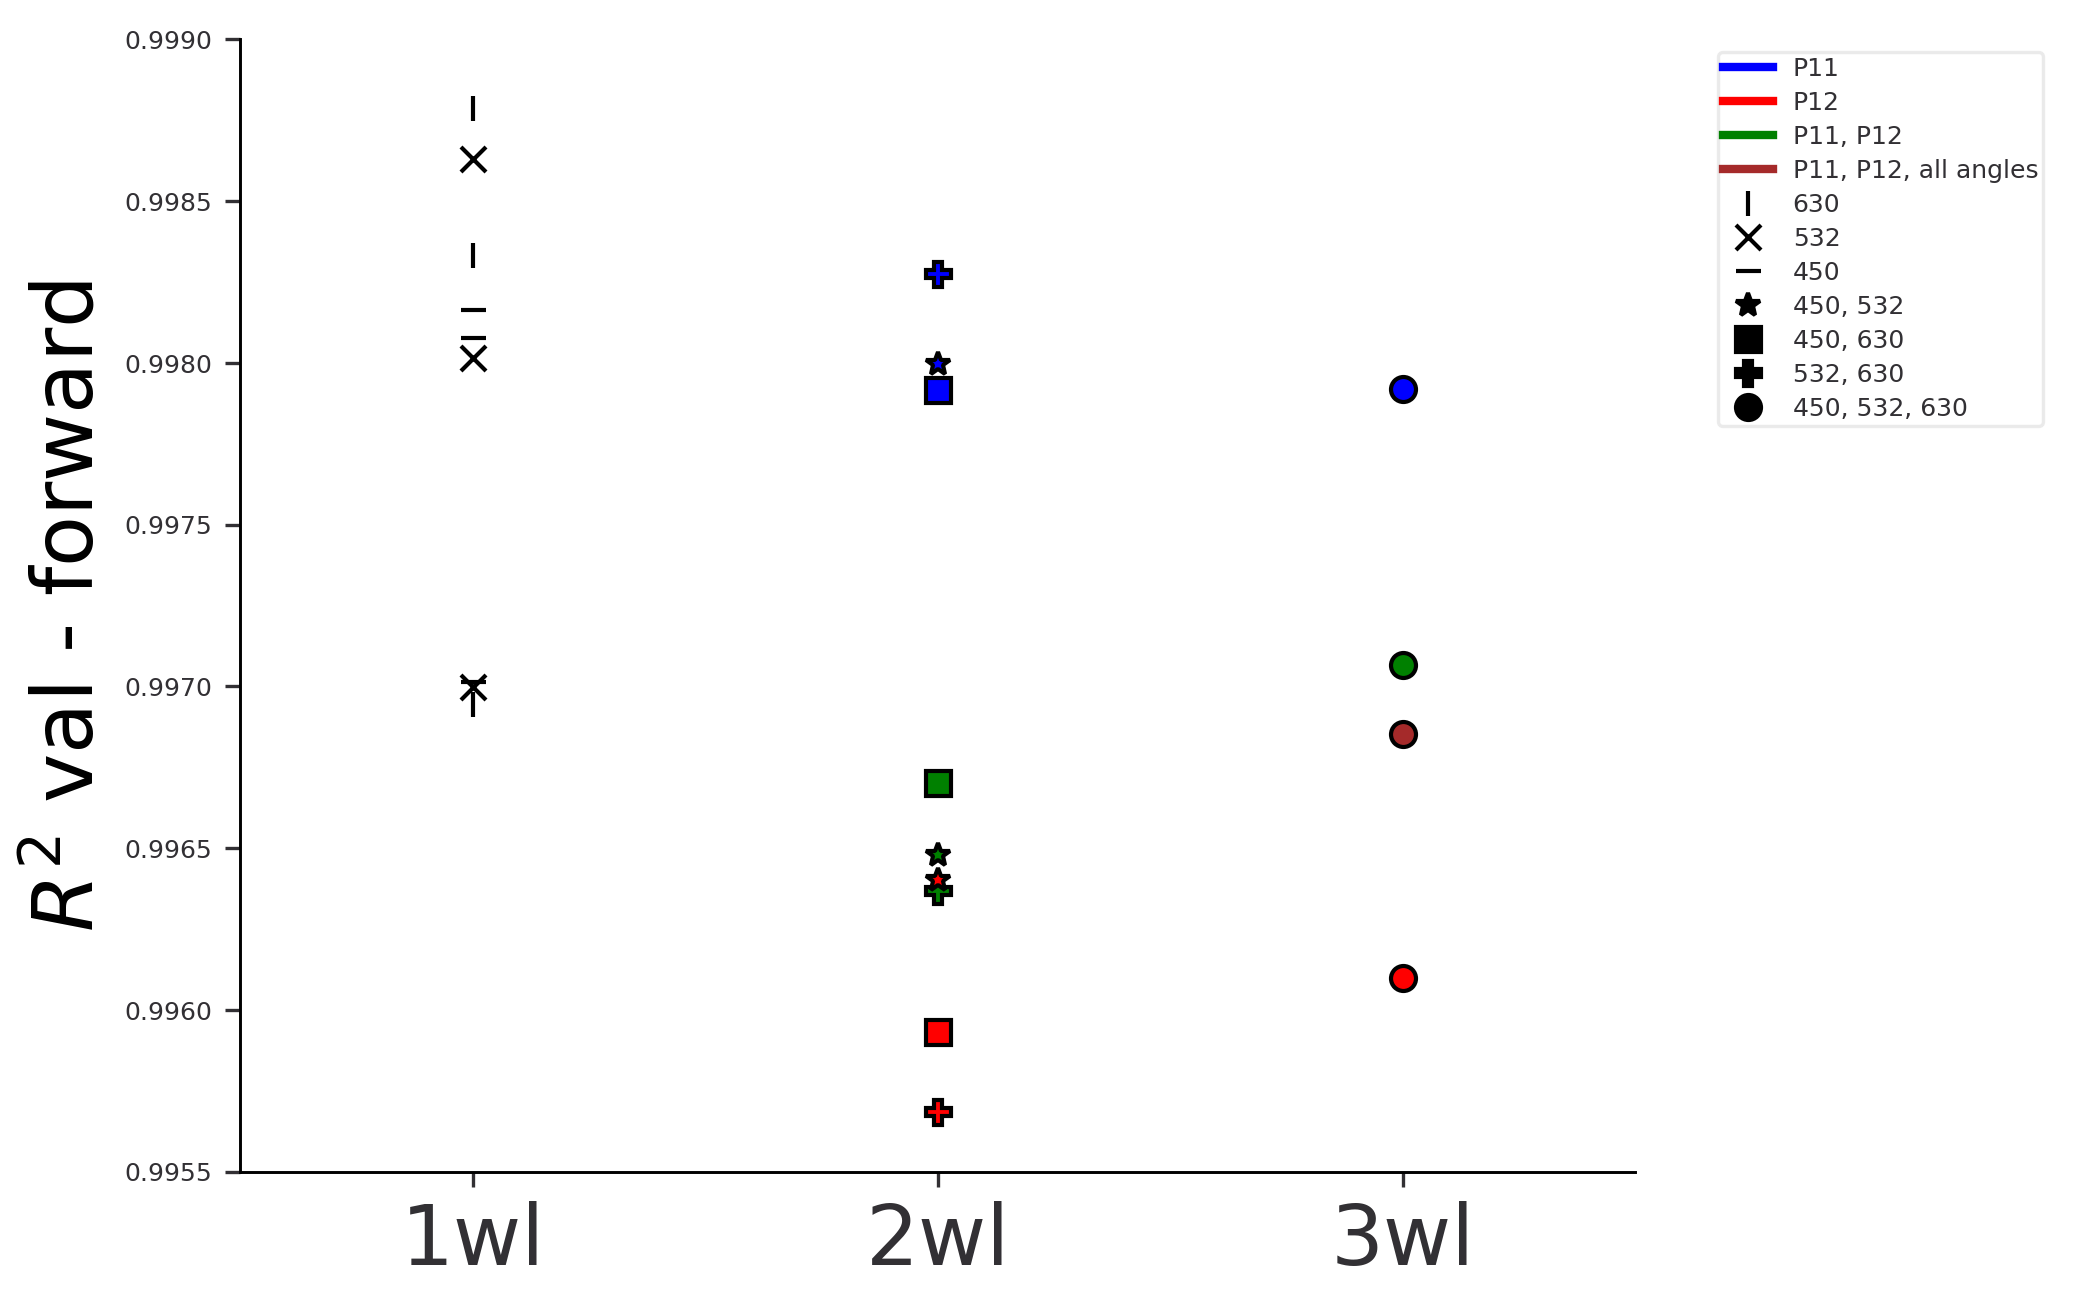

In [41]:
fig, ax = plt.subplots(figsize = (6,5))
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['r2_val_qoi_mean'][i],marker = marker1, color = color1, label = legend1)
    
plt.ylabel('$R^2$ val - forward', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)



# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.ylim(0.6,1)
plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

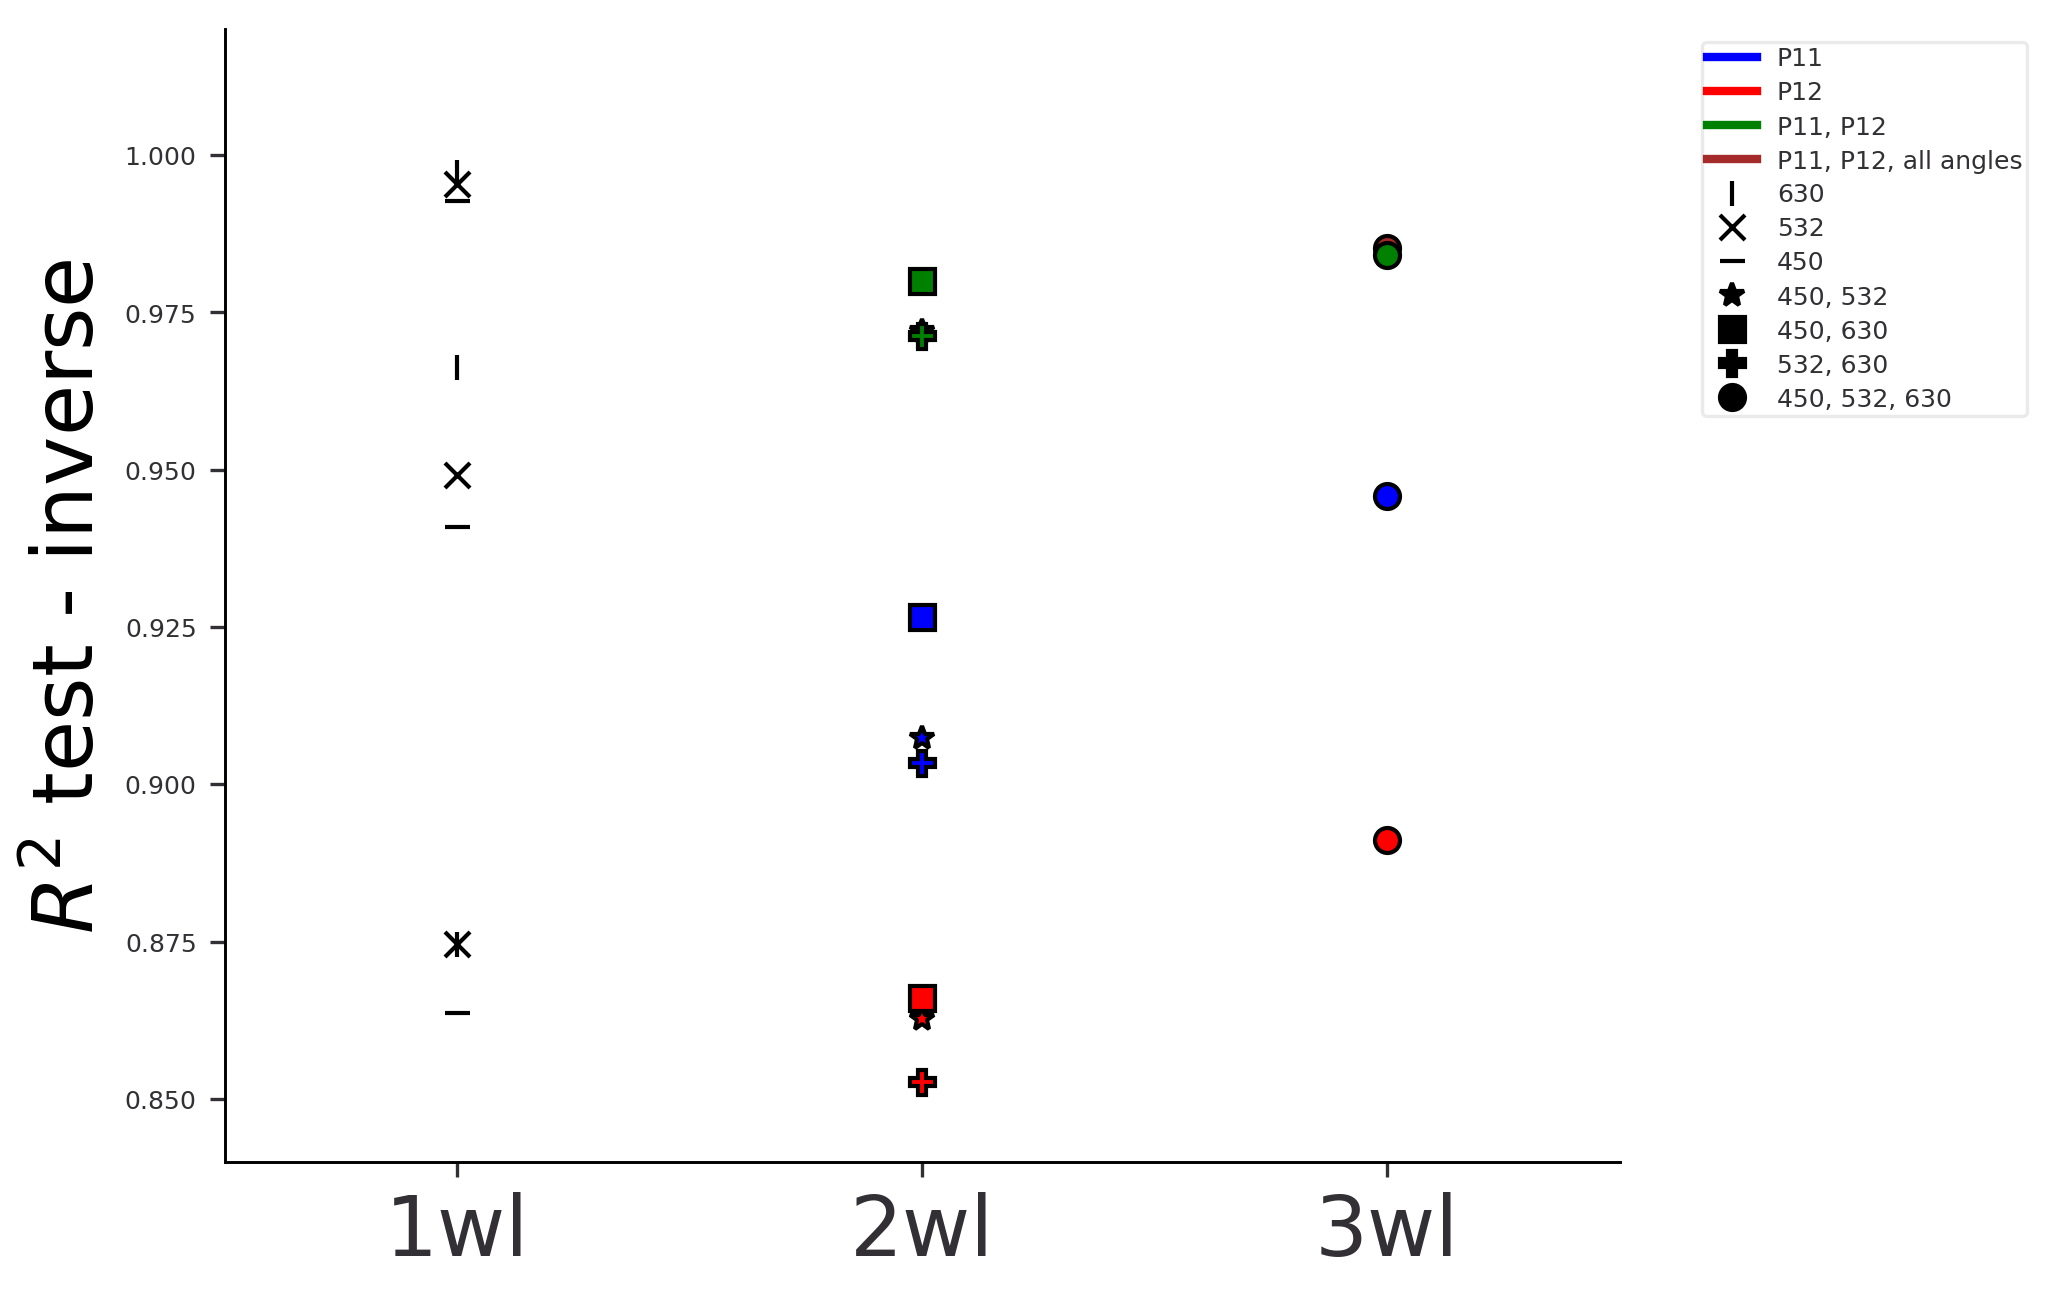

In [42]:
fig, ax = plt.subplots(figsize = (6,5))
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['r2_test_dvar_mean'][i],marker = marker1, color = color1, label = legend1)
    
plt.ylabel('$R^2$ test - inverse', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)

# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

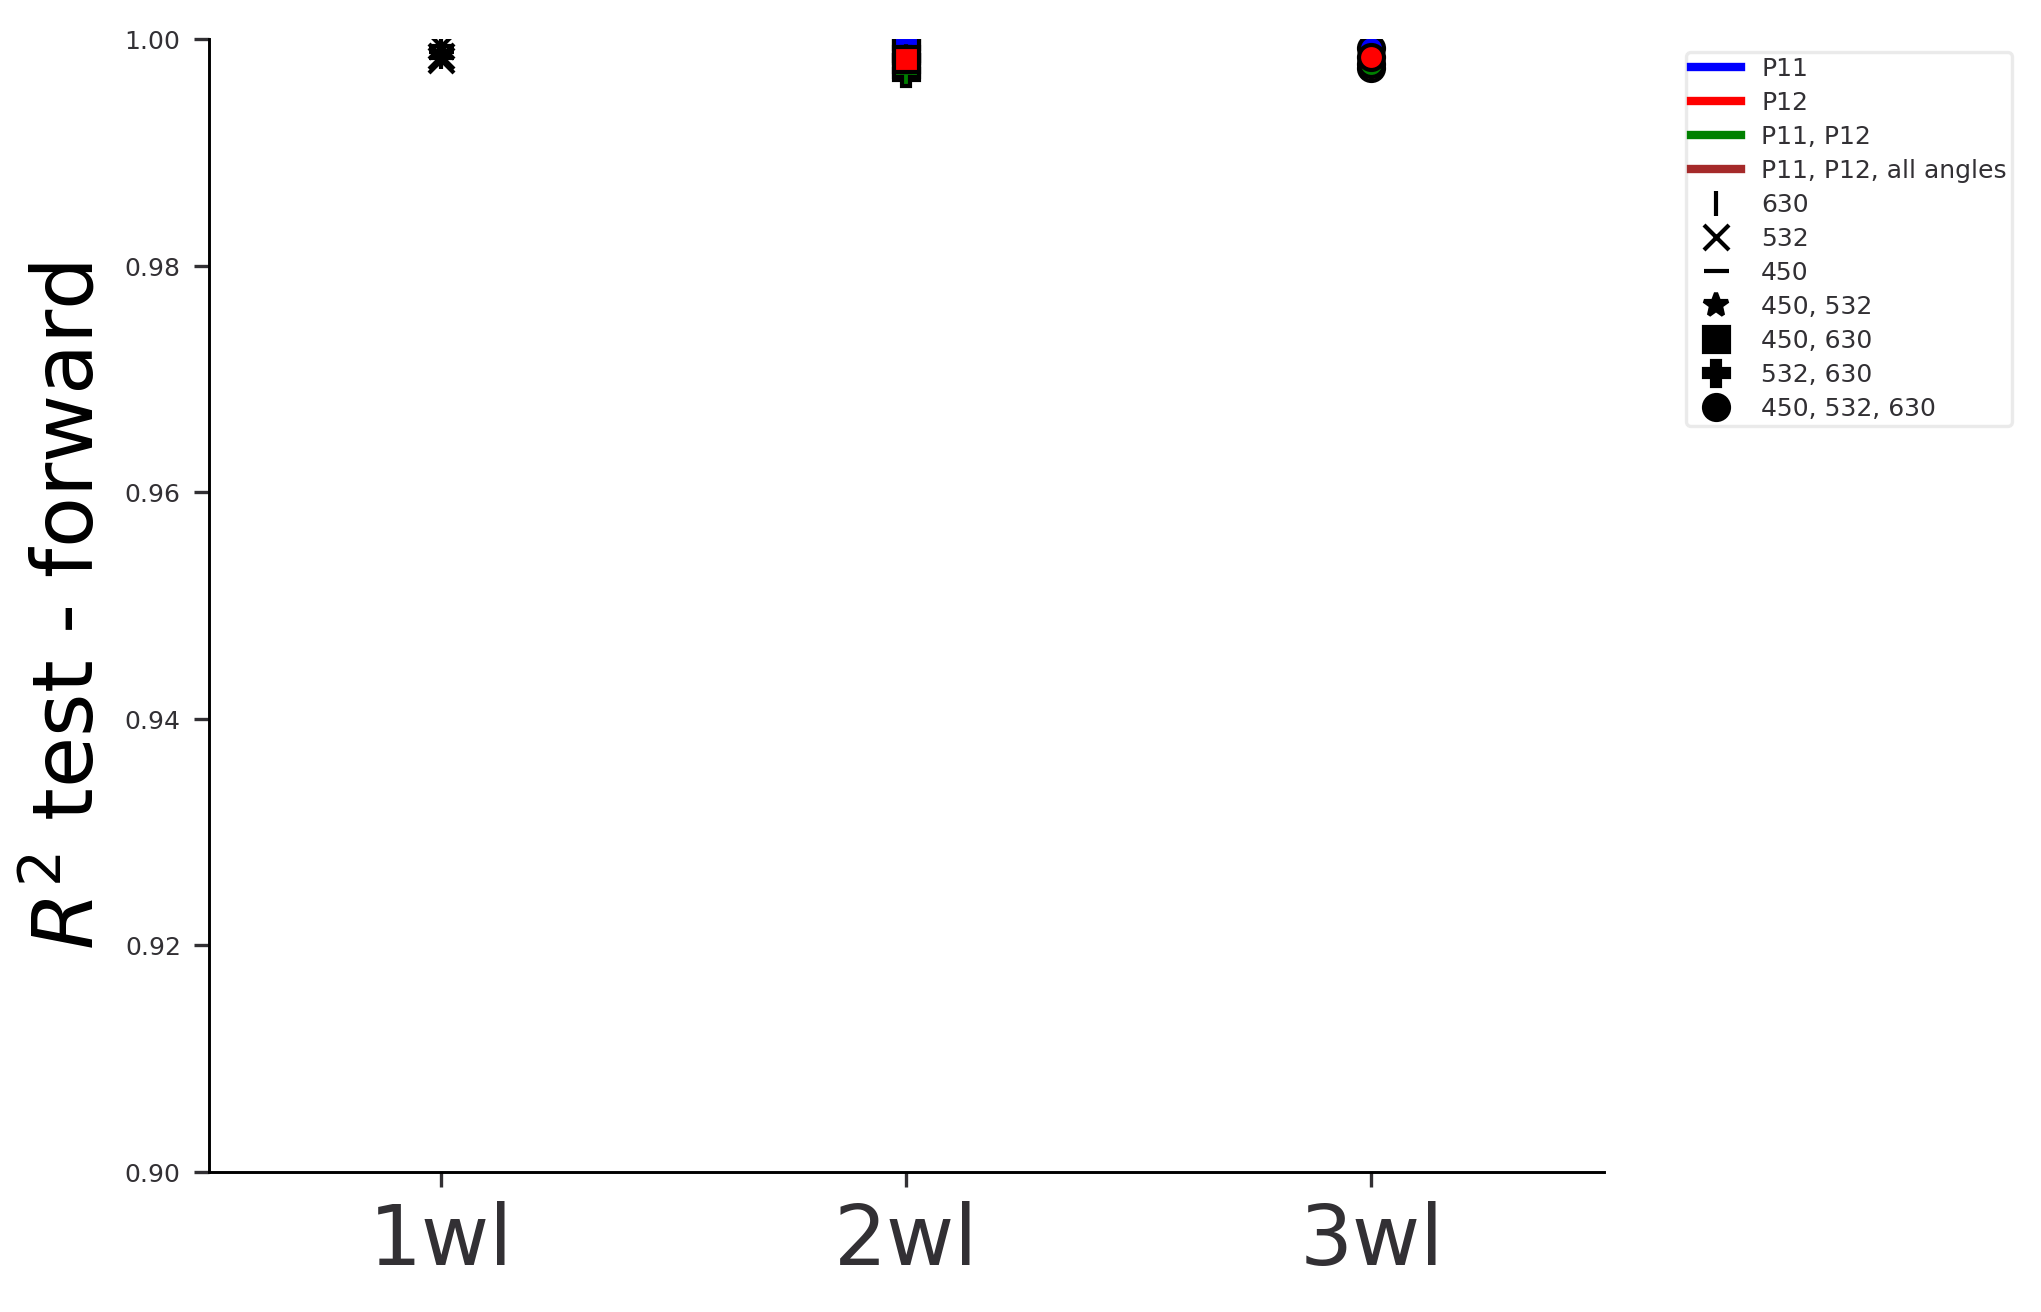

In [43]:
fig, ax = plt.subplots(figsize = (6,5))
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['r2_test_qoi_mean'][i],marker = marker1, color = color1, label = legend1)
    
plt.ylabel('$R^2$ test - forward', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)

# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.9,1)
plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

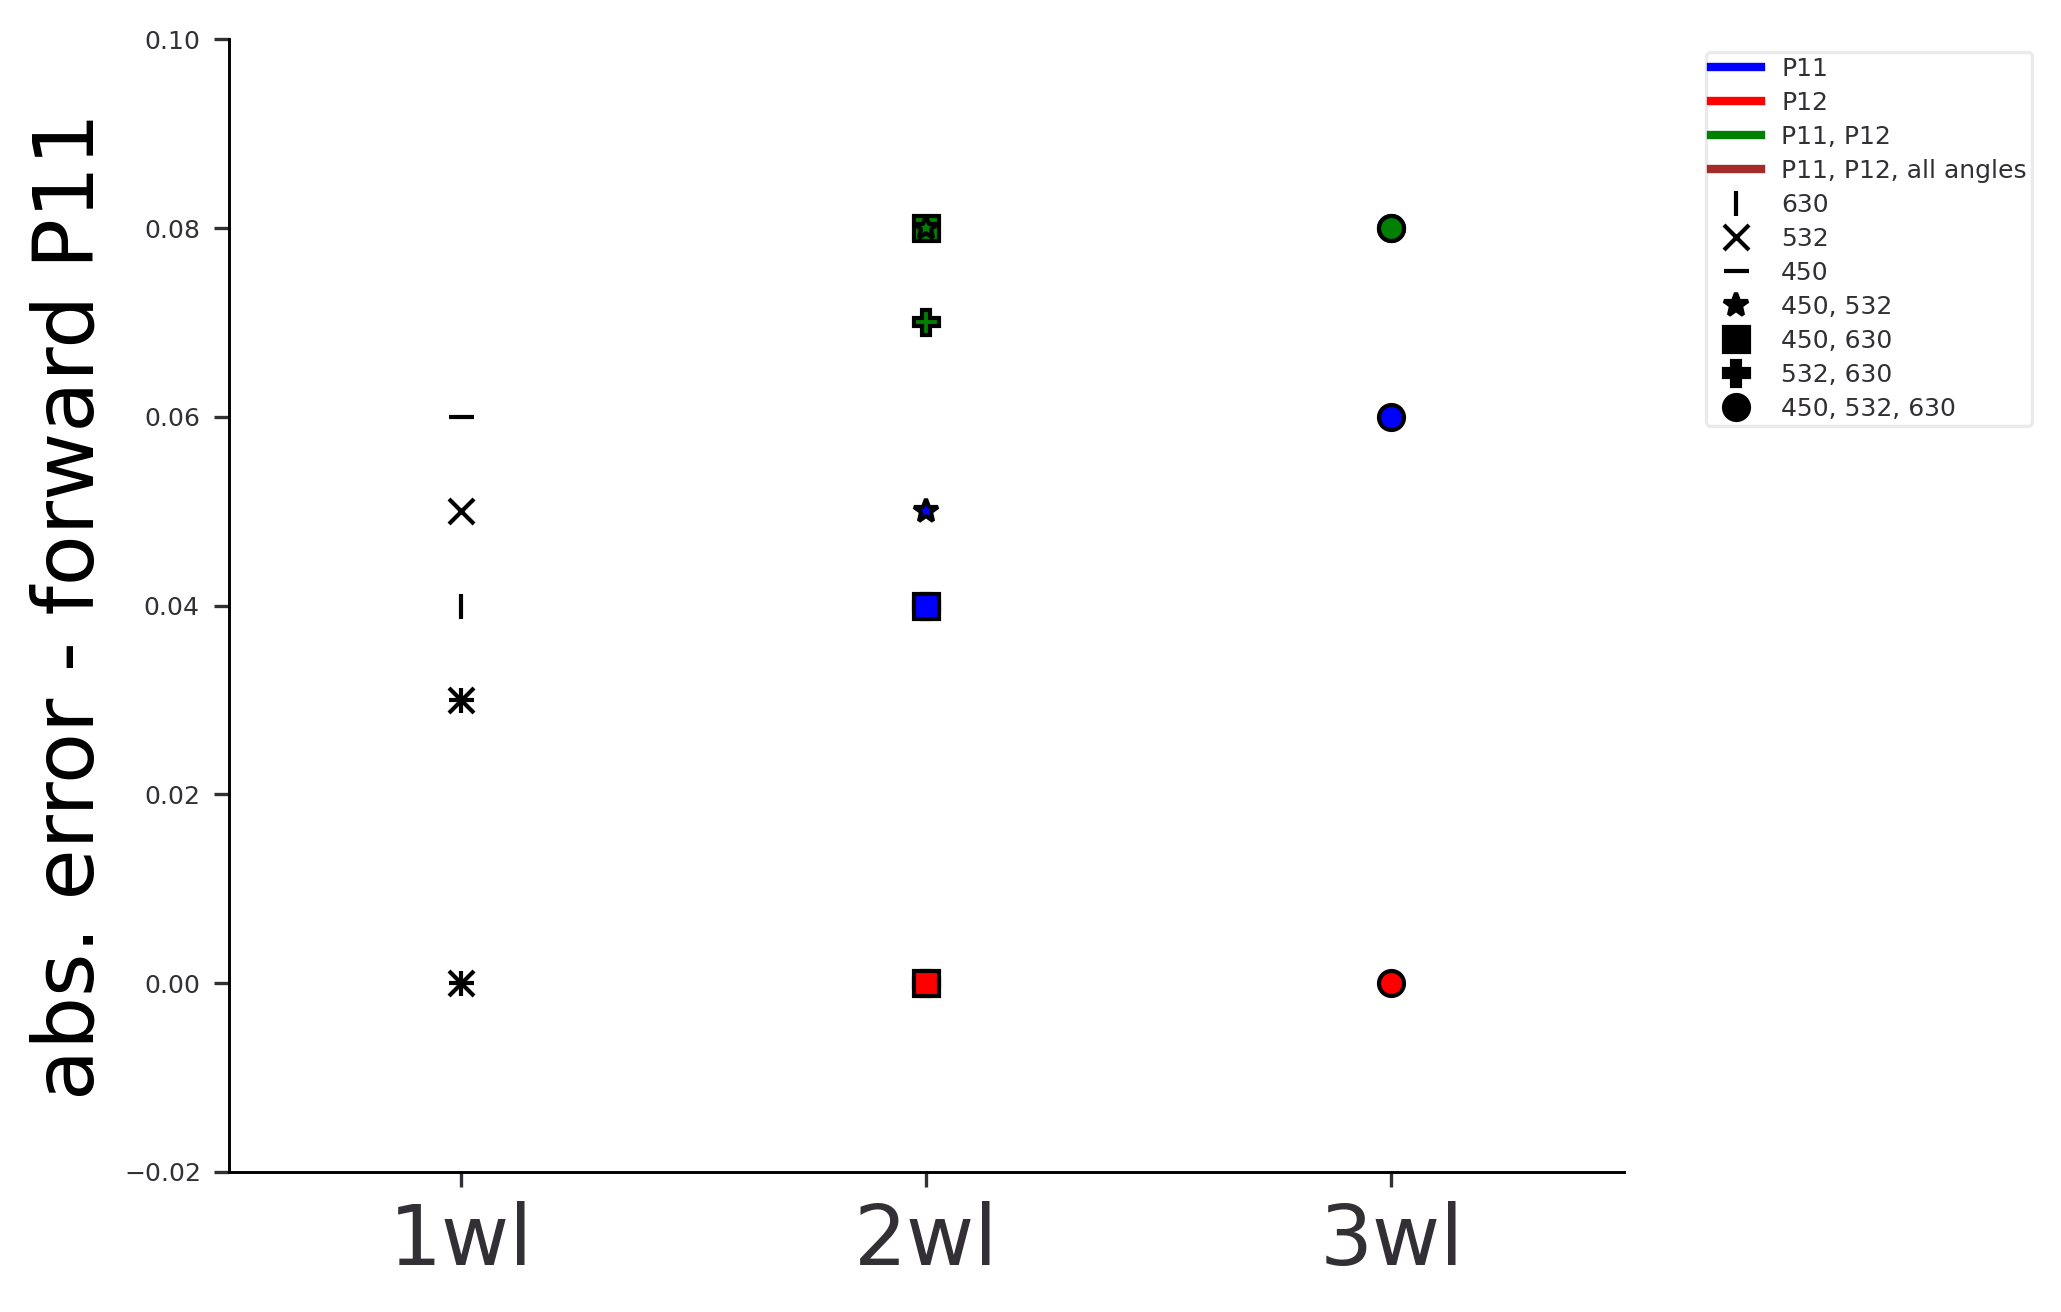

In [44]:
fig, ax = plt.subplots(figsize = (6,5))
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['abs_error95%_qoi_P11_max'][i],marker = marker1, color = color1, label = legend1)
    
plt.ylabel('abs. error - forward P11', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)


# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

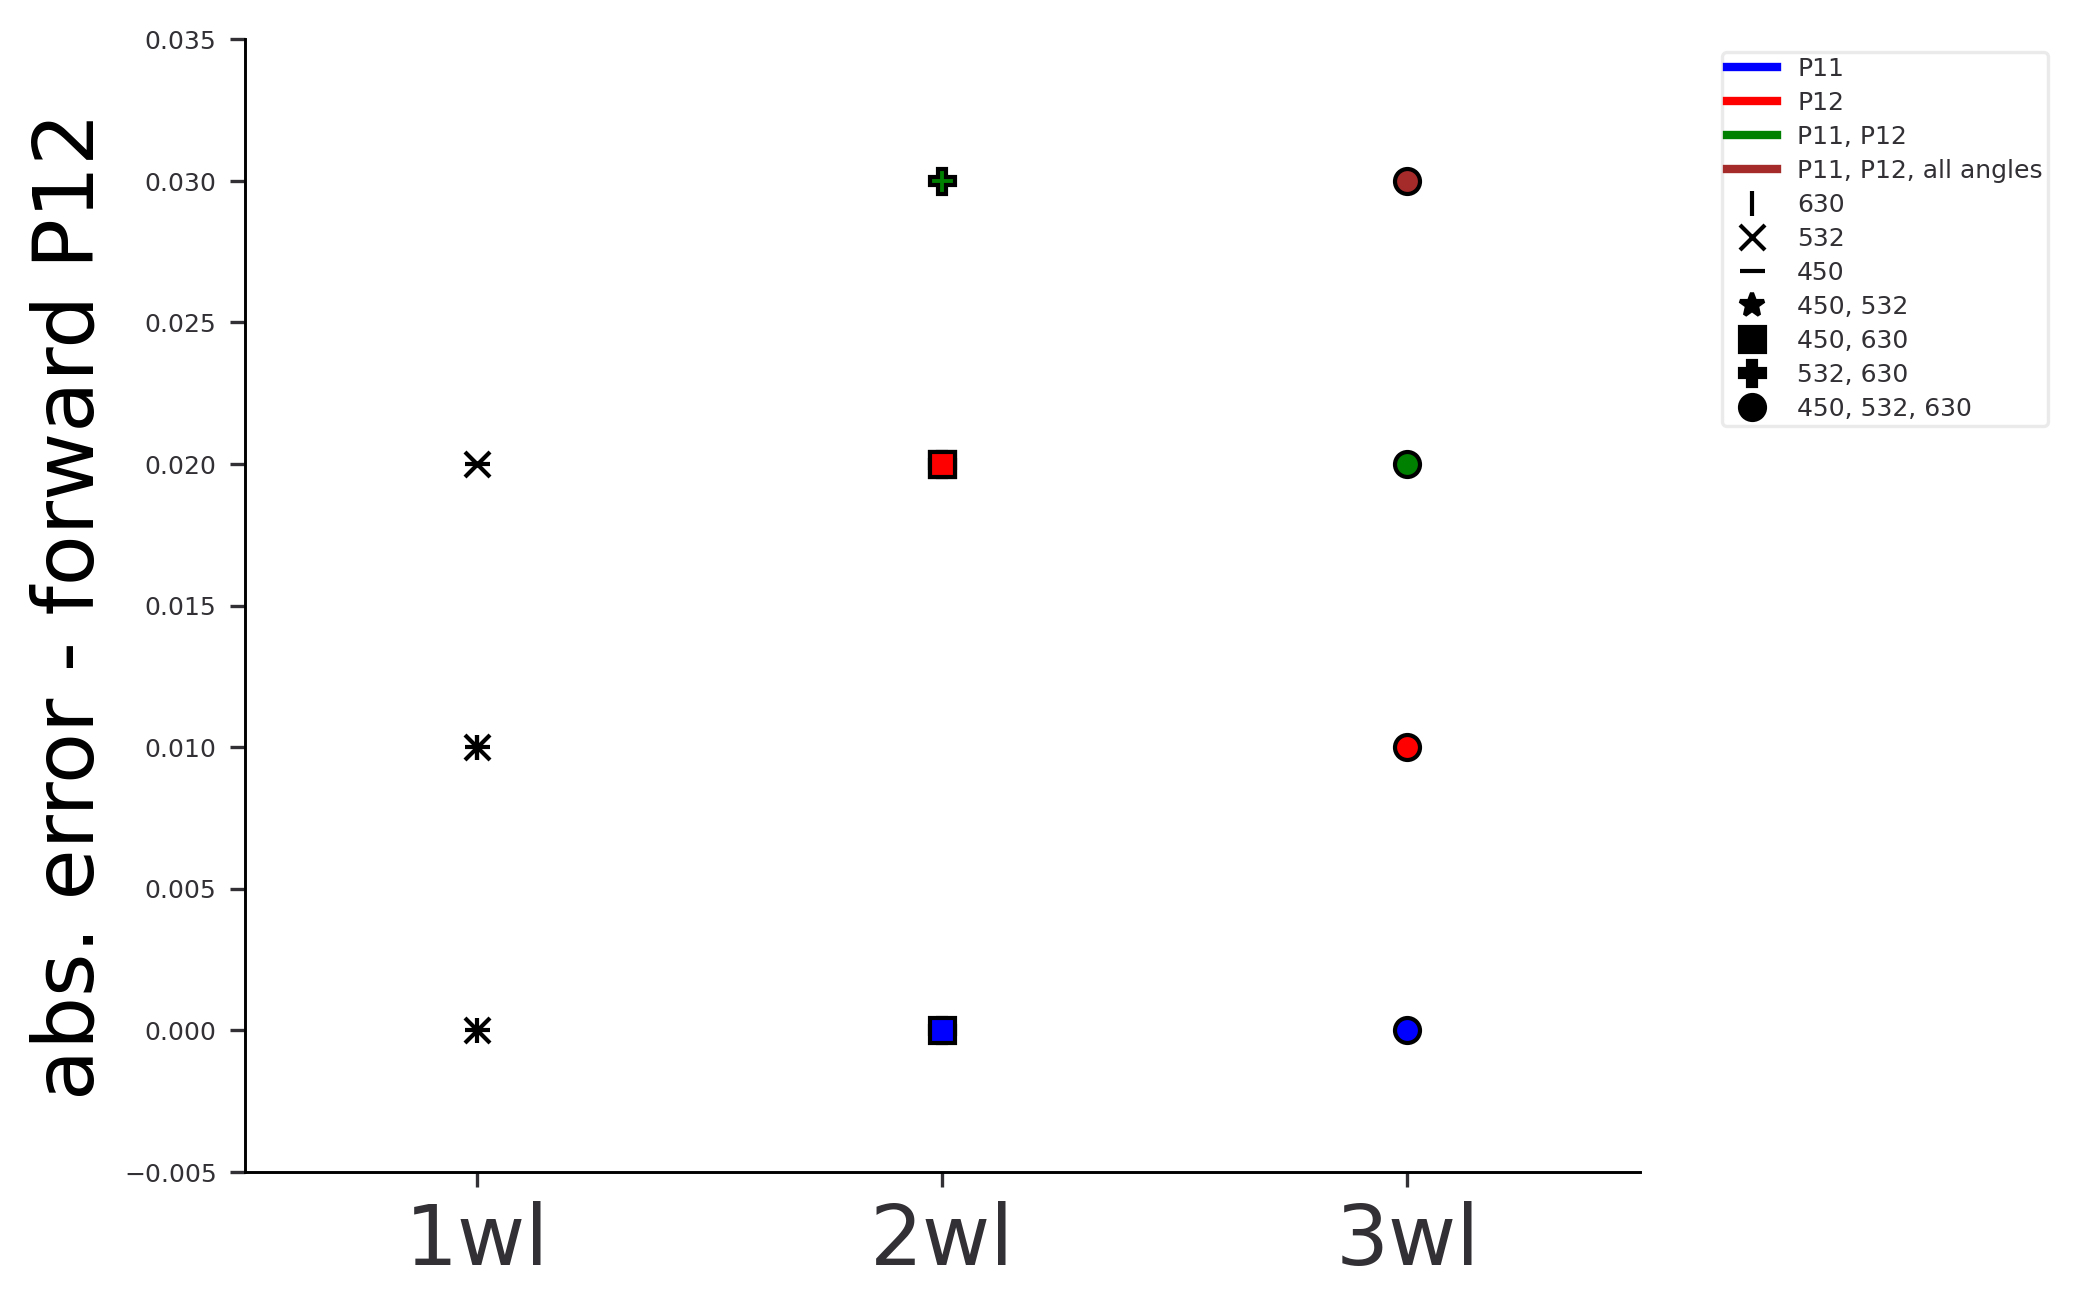

In [45]:
fig, ax = plt.subplots(figsize = (6,5))
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['abs_error95%_qoi_P12_max'][i],marker = marker1, color = color1, label = legend1)
    
plt.ylabel('abs. error - forward P12', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)


# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

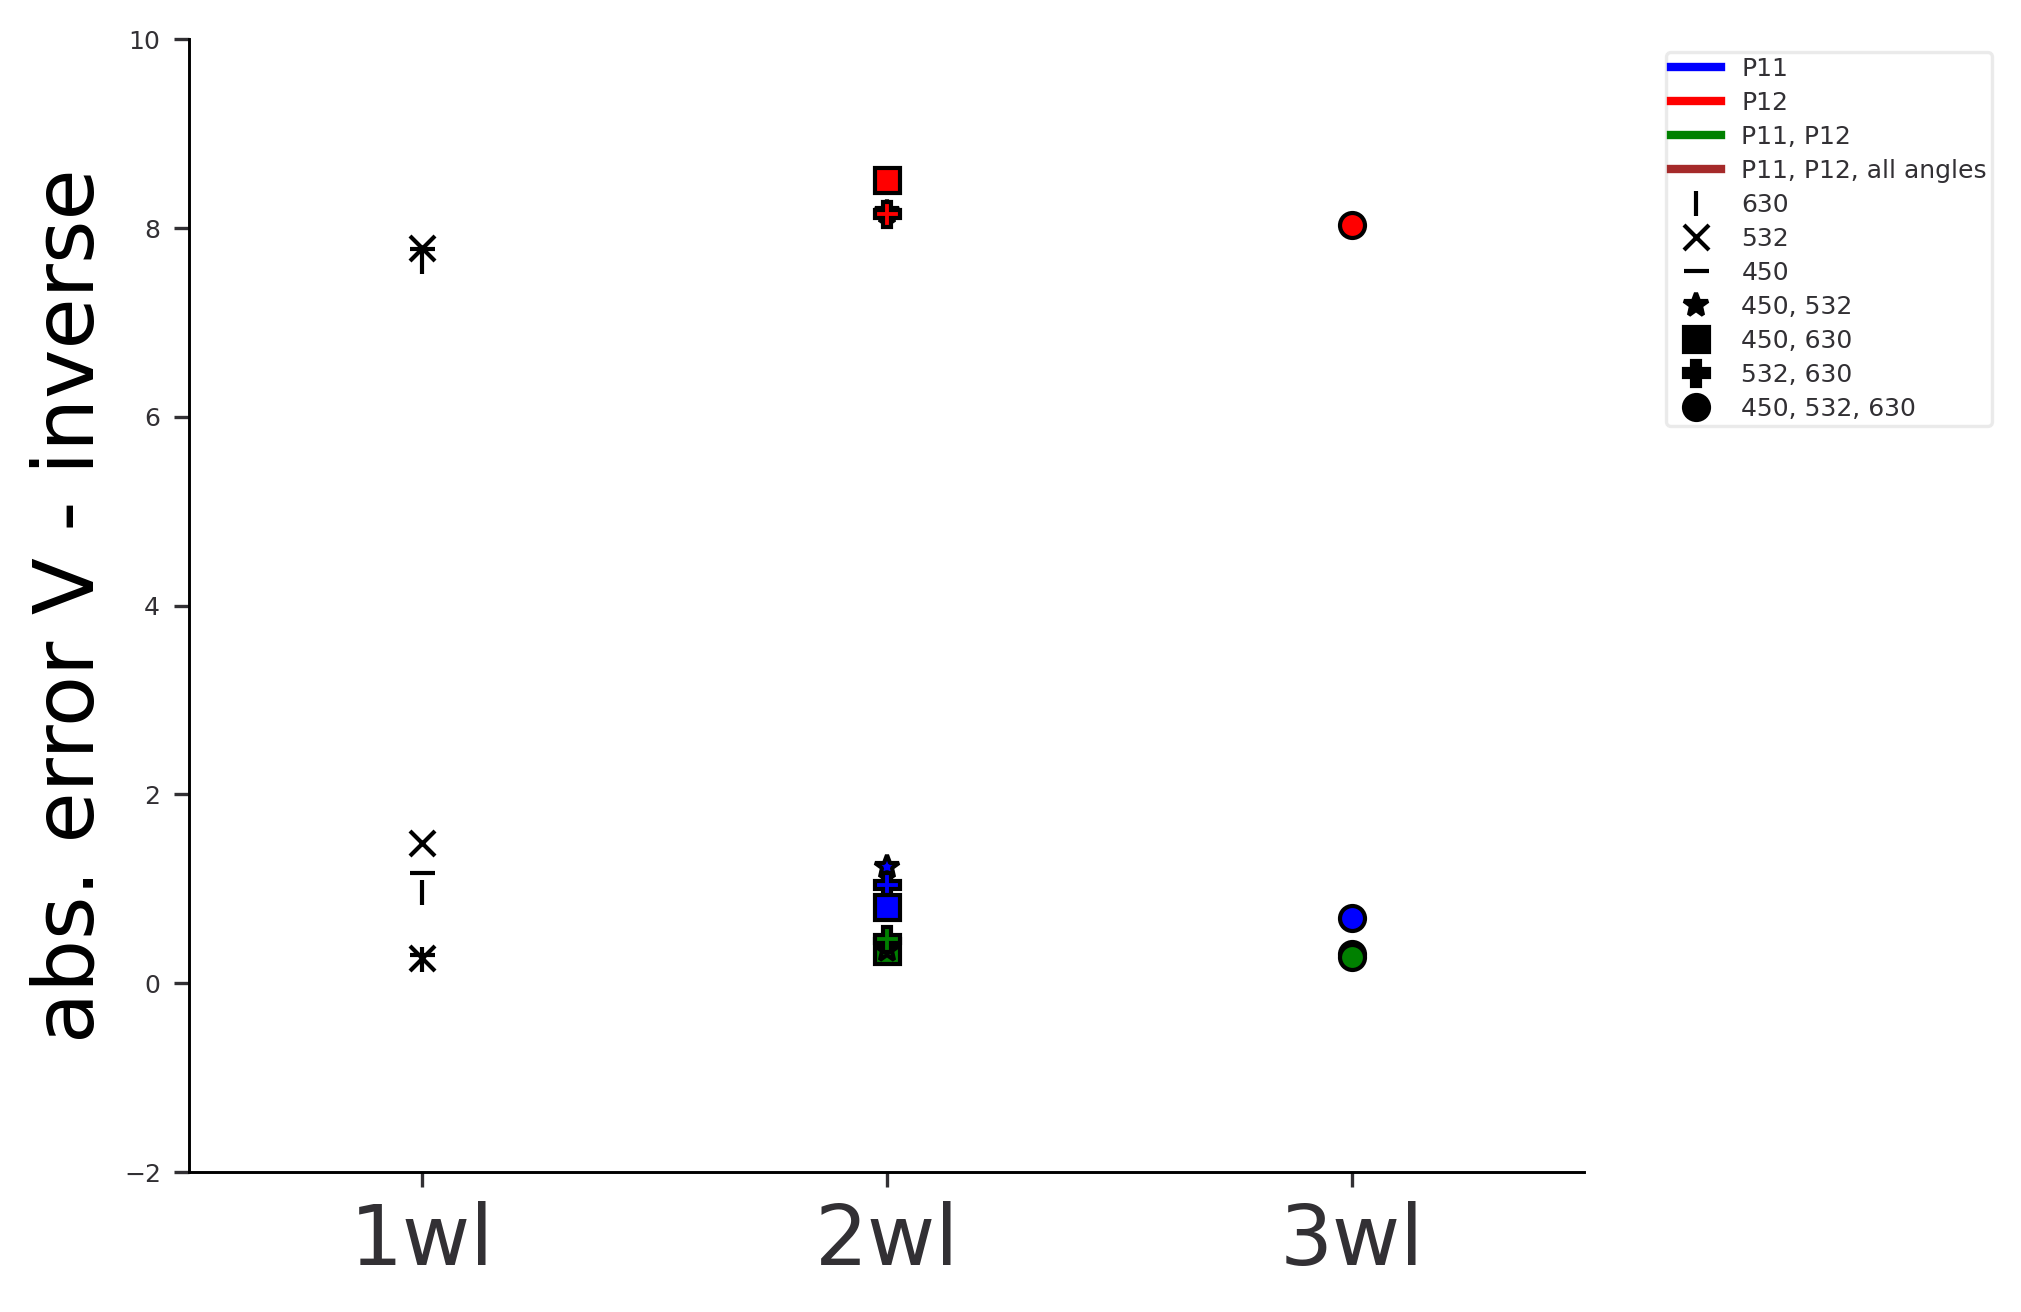

In [46]:
fig, ax = plt.subplots(figsize = (6,5))
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['abs_error95%_dvar_V'][i],marker = marker1, color = color1, label = legend1)
    
plt.ylabel('abs. error V - inverse', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)

# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.axhline(y=1, xmin=0, xmax=1)
#plt.axhline(y=5000, xmin=0, xmax=1)
#plt.ylim(0.6,1)
plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

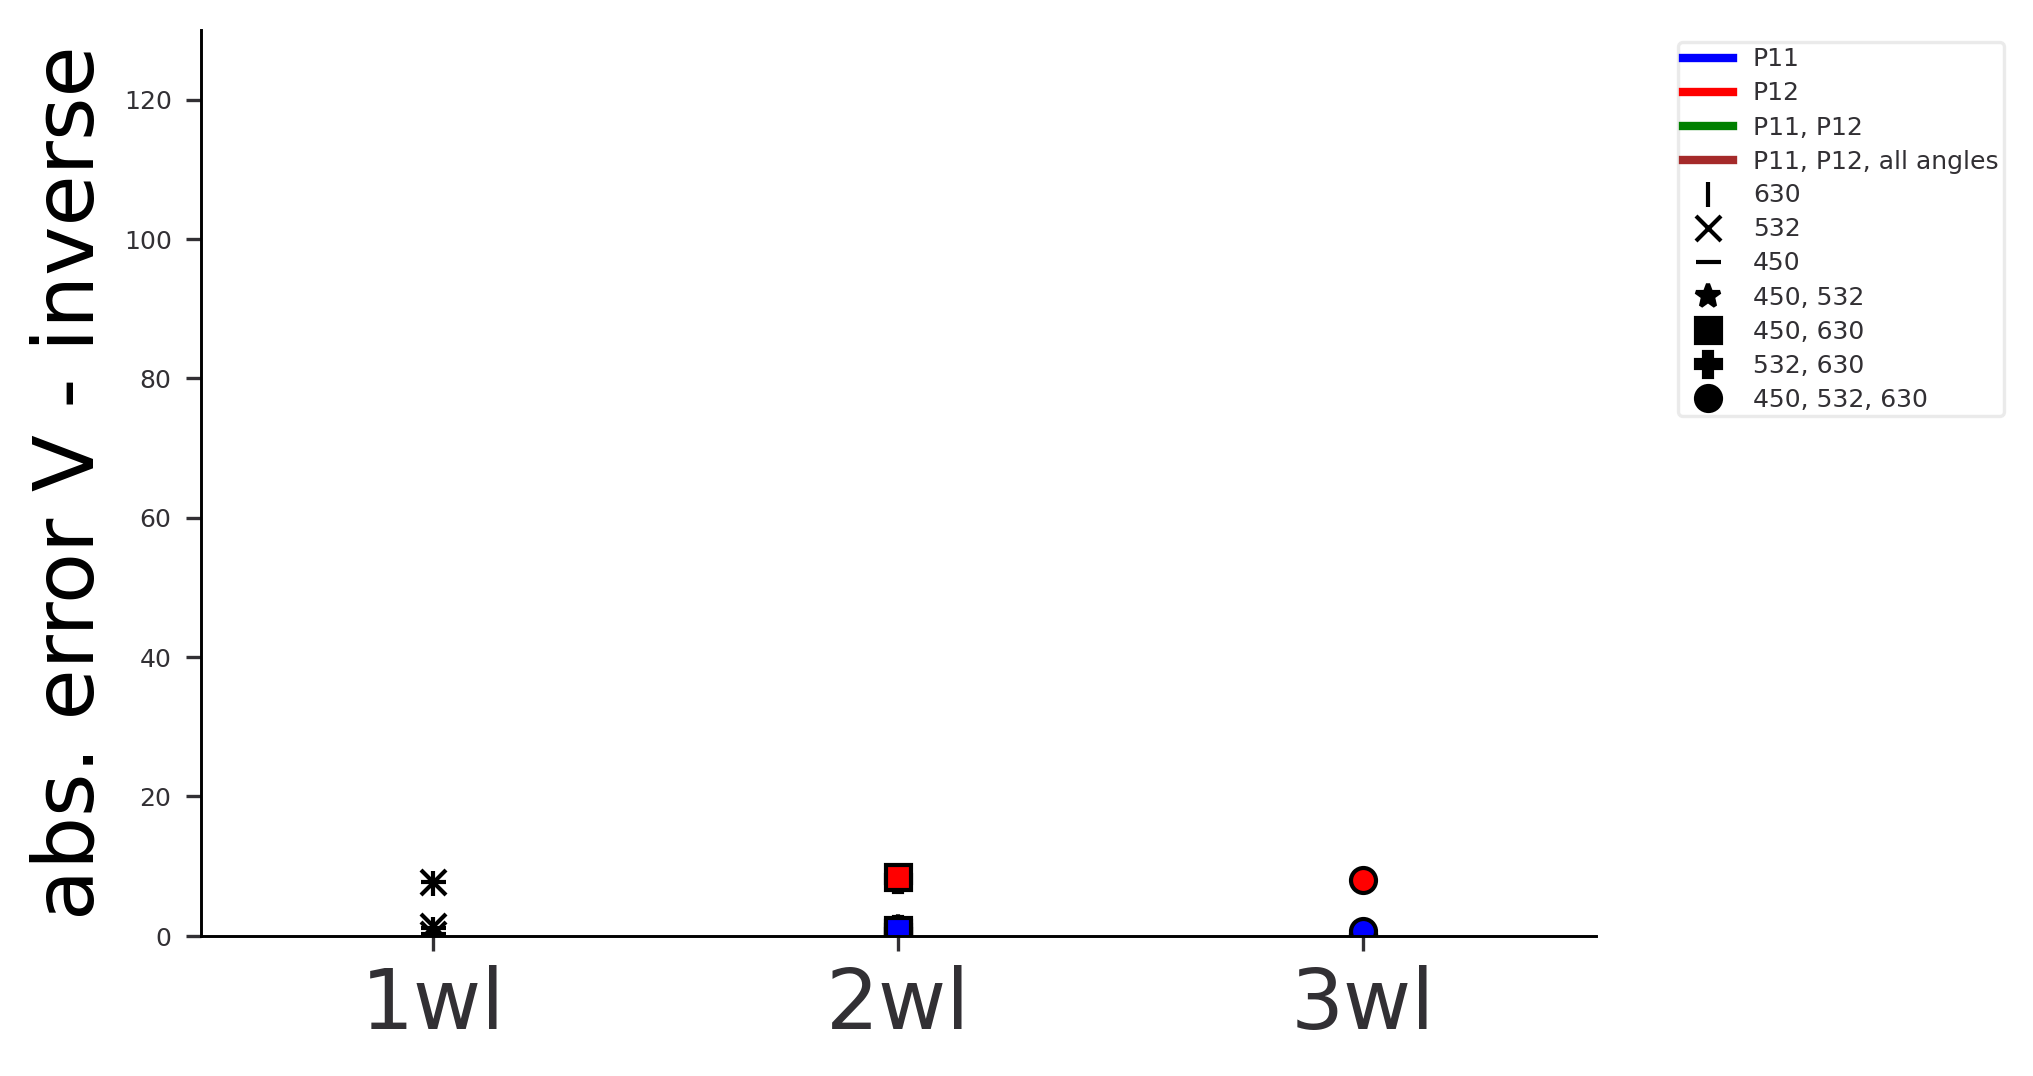

In [47]:
fig, ax = plt.subplots()
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['abs_error95%_dvar_V'][i],marker = marker1, color = color1, label = legend1)
    
plt.ylabel('abs. error V - inverse', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)


# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0,130)
plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

KeyError: 'abs_error95%_dvar_R'

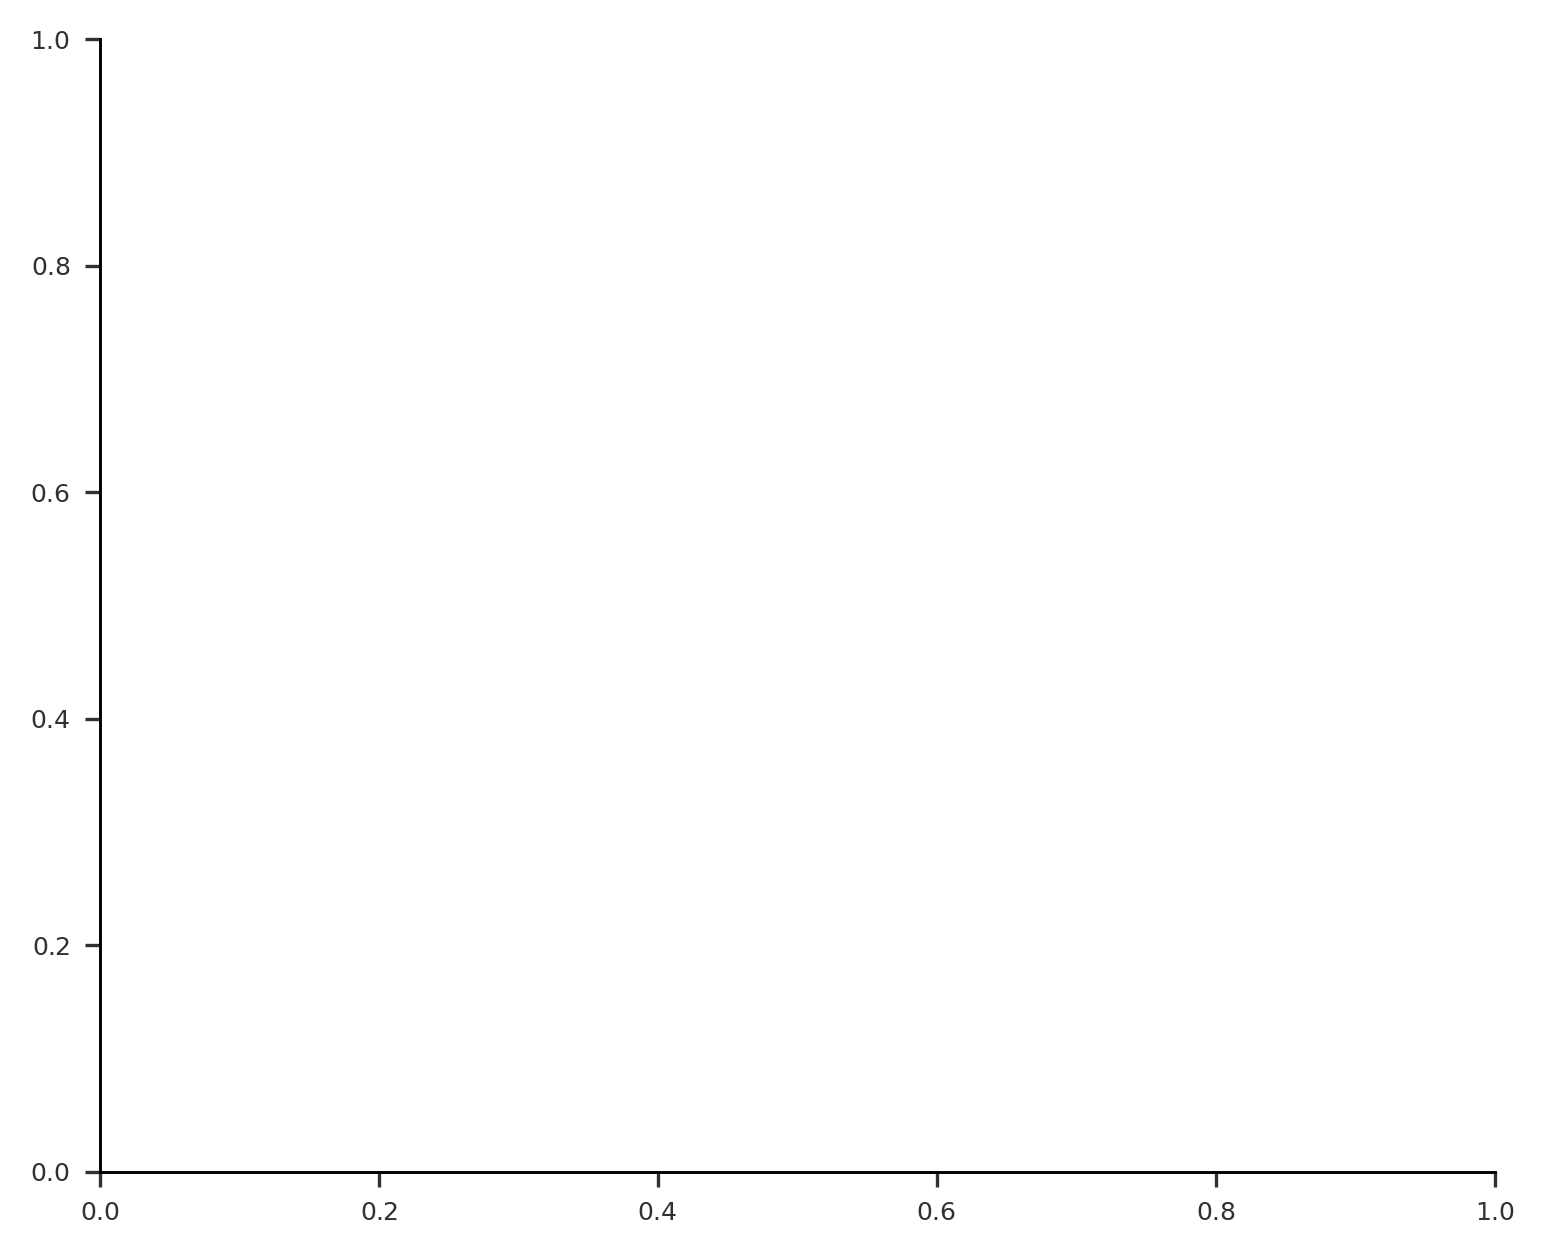

In [48]:
fig, ax = plt.subplots(figsize = (6,5))
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] =='x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['abs_error95%_dvar_R'][i],marker = marker1, color = color1, label = legend1)
    
plt.ylabel('abs. error R - inverse', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)


# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.ylim(0,12)
plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

In [ ]:
fig, ax = plt.subplots(figsize = (6,5))
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    if df['rel_error95%_dvar_GSD'][i] == 0:
        continue
    markersize1 = 10
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] == 'x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['abs_error95%_dvar_GSD'][i],marker = marker1, color = color1, label = legend1,markersize = markersize1)
    
plt.ylabel('abs. error GSD - inverse', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)



# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.ylim(0,12)
plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

In [ ]:
df['abs_error95%_dvar_n']

In [ ]:
fig, ax = plt.subplots()
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    if df['rel_error95%_dvar_n'][i] == 0:
        continue
    markersize1 = 10
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] == 'x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['abs_error95%_dvar_n'][i],marker = marker1, color = color1, label = legend1,markersize = markersize1)
    
plt.ylabel('abs. error n - inverse', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)




# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.ylim(0,12)
plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

KeyError: 'abs_error95%_dvar_k_532'

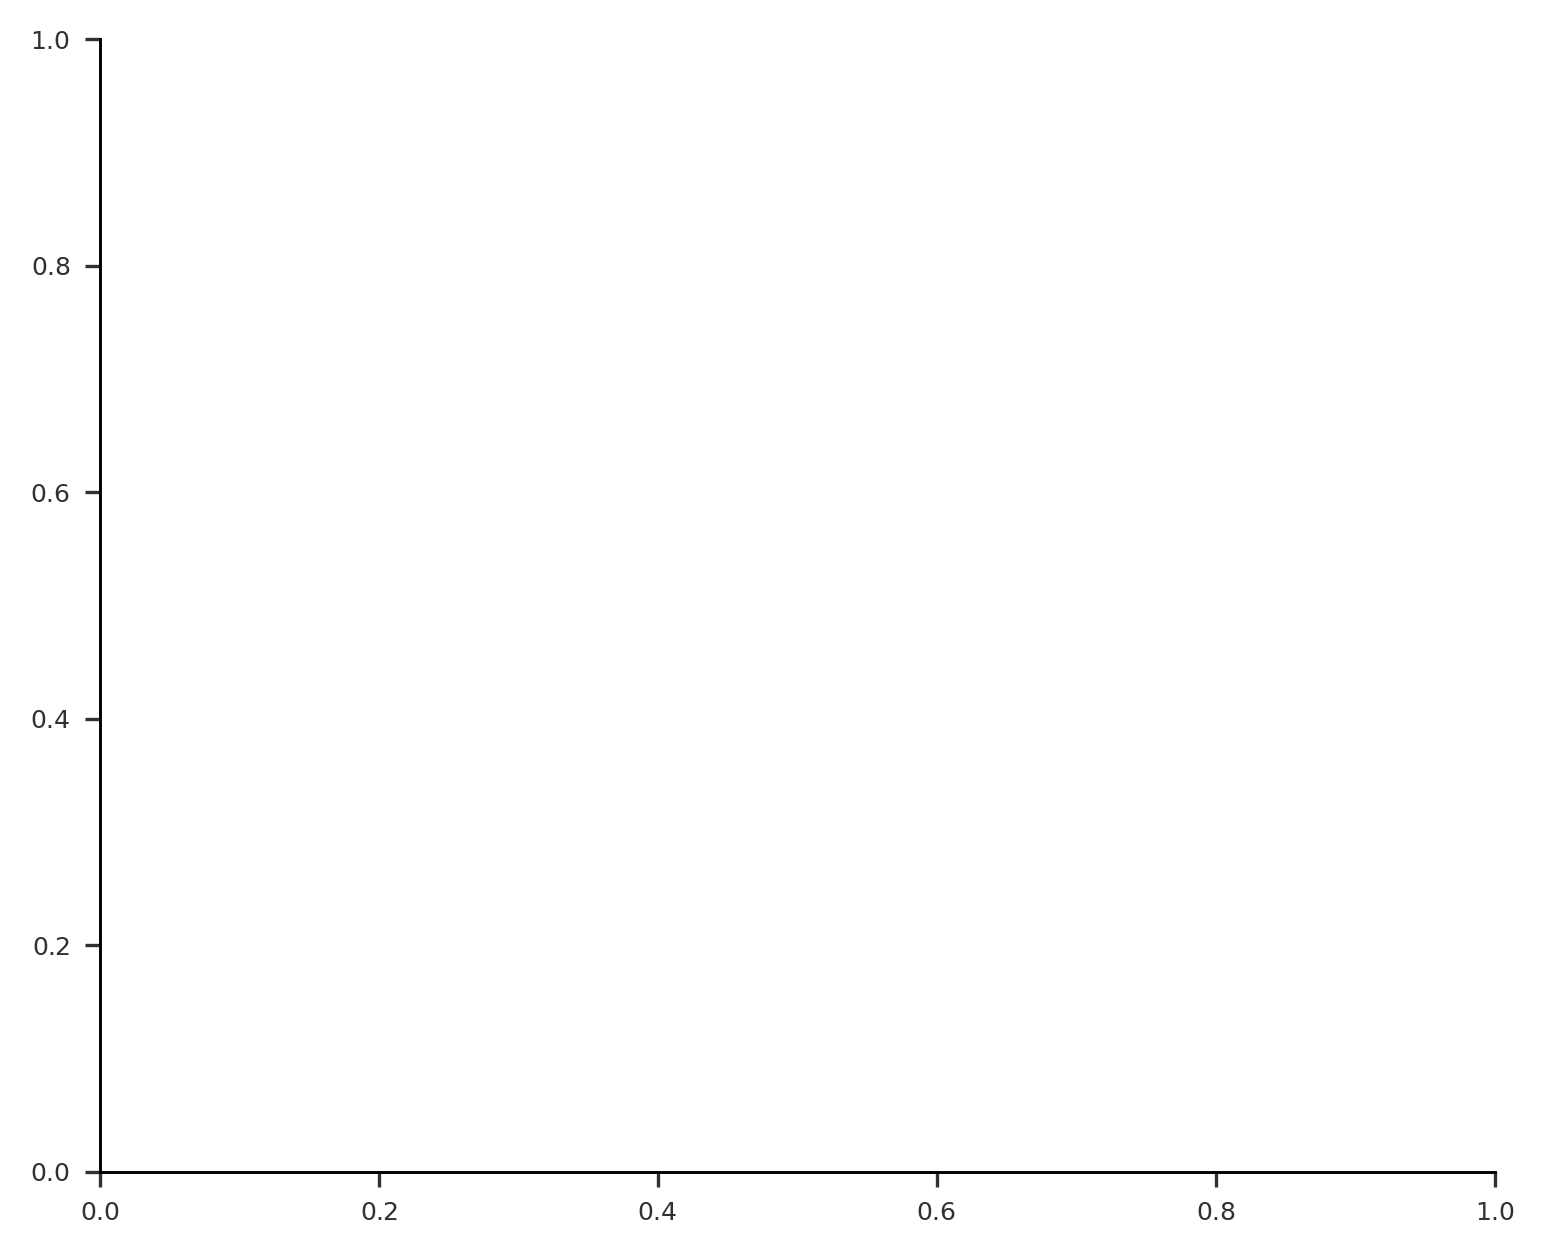

In [49]:
fig, ax = plt.subplots(figsize = (6,5))
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    if df['abs_error95%_dvar_k_532'][i] == 0:
        continue
    markersize1 = 10
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] == 'x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['abs_error95%_dvar_k_532'][i],marker = marker1, color = color1, label = legend1, markersize = markersize1)
    
plt.ylabel('abs. error k_532 - inverse', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)


# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.ylim(0,12)
plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

In [ ]:
fig, ax = plt.subplots(figsize = (6,5))
color1 = 'black'
marker1 = '.'
for i in range(len(df)):
    if df['abs_error95%_dvar_k_450'][i] == 0:
        continue
    markersize1 = 10
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] == 'x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['abs_error95%_dvar_k_450'][i],marker = marker1, color = color1, label = legend1, markersize = markersize1)
    
plt.ylabel('abs. error k_450 - inverse', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)


# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.ylim(0,12)
plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()

KeyError: 'abs_error95%_dvar_k_630'

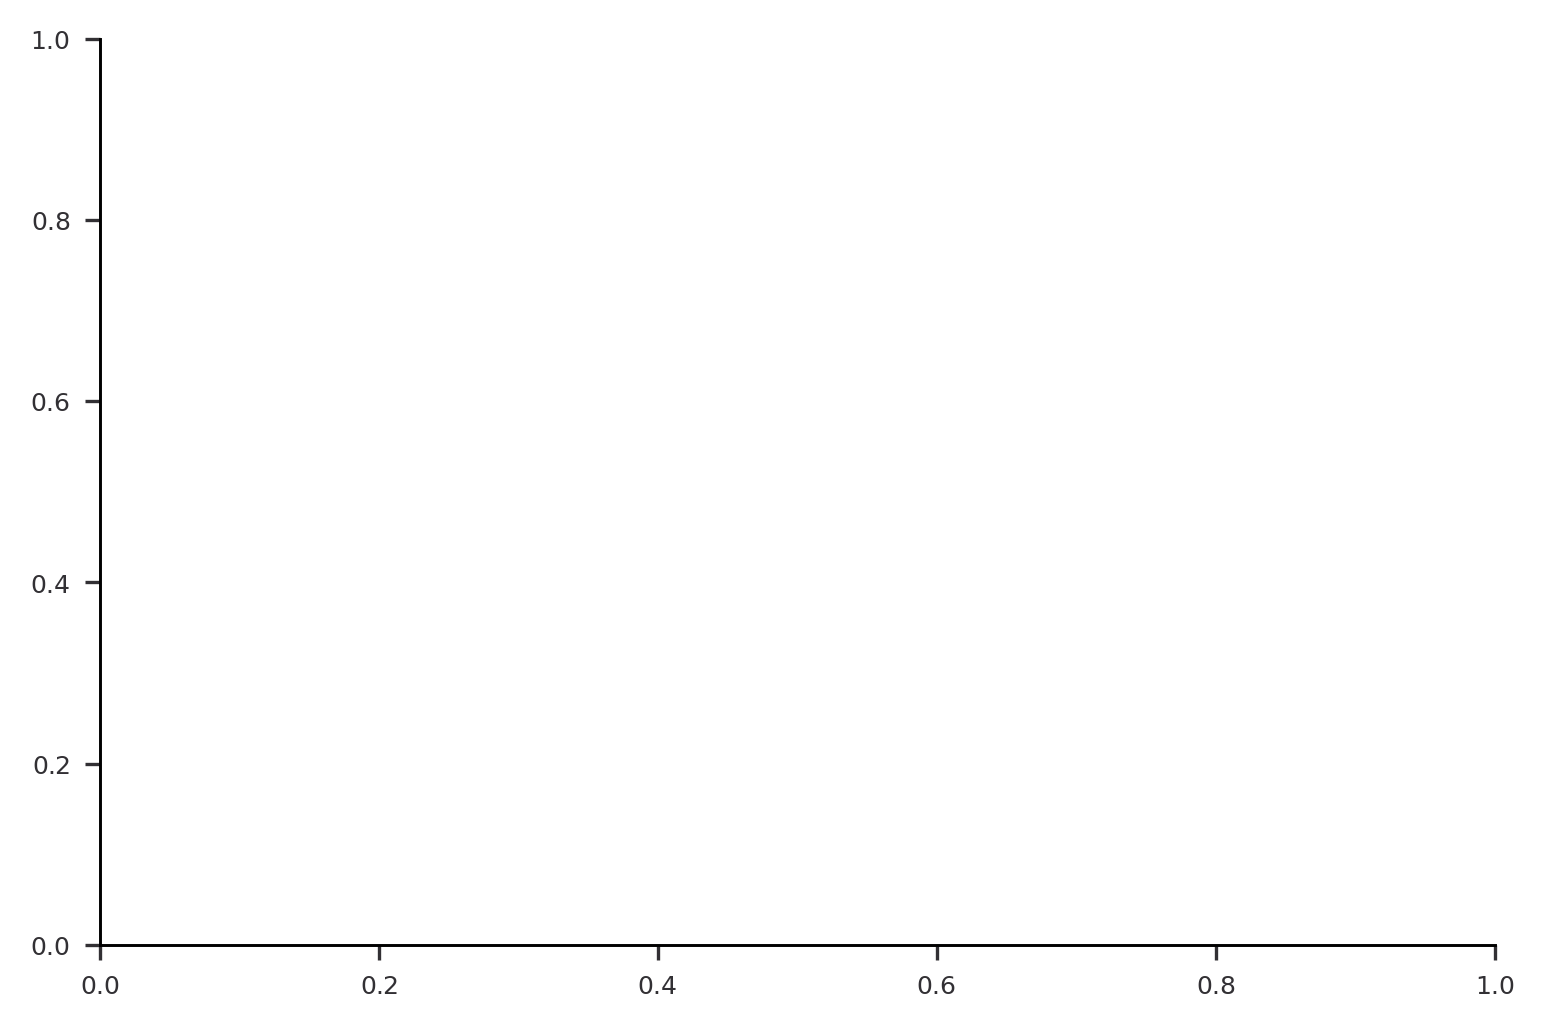

In [50]:
fig, ax = plt.subplots()
color1 = 'black'
marker1 = '.'

for i in range(len(df)):
    if df['abs_error95%_dvar_k_630'][i] == 0:
        continue
    markersize1 = 10
    if df['P11'][i] == 'x':
        if df['P12'][i] == 'x':
            if df['Wo0'][i] == 'x':
                color1 = 'brown'
            else:
                color1 = 'green'
        else:
            color1 = 'blue'
    else:
        color1 = 'red'
        
    if df['450'][i] == 'x' and df['532'][i] == 'x' and df['630'][i]== 'x':
        marker1 = 'o'
        legend1 = '450, 532, 630'
    elif df['450'][i] == 'x' and df['532'][i] == 'x':
        marker1 = '*'
        legend1 = '450, 532'
    elif df['450'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 's'
        legend1 = '450, 630'
    elif df['532'][i] == 'x' and df['630'][i] == 'x':
        marker1 = 'P'
        legend1 = ' 532, 630'
    elif df['450'][i] == 'x':
        marker1 = '_'
        legend1 = '450'
        markersize1 = 20
    elif df['532'][i] == 'x':
        marker1 = 'x'
        legend1 = '532'
    elif df['630'][i] == 'x':
        marker1 = '|'
        legend1 = '630'
    plt.plot(df['Numbers'][i], df['abs_error95%_dvar_k_630'][i],marker = marker1, color = color1, label = legend1, markersize = markersize1)
    
plt.ylabel('abs. error k_630 - inverse', fontsize = 20)
xlabel = ('1wl', '2wl', '3wl')
x_pos = np.arange(len(xlabel))+1
ax.set_xticks(x_pos)
ax.set_xticklabels(xlabel, fontsize = 20)


# Create the figure

ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.ylim(0,12)
plt.show()

    #plt.show()
#plt.savefig('plot')
#plt.clf()